#                   COVID19 WEB SCRAPING PROJECT

# IMPORT LIBRARIES

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time

# Get Data of Covid19 from website

In [2]:
URL="https://www.grainmart.in/news/covid-19-coronavirus-india-state-and-district-wise-tally/"
page=requests.get(URL)
pagecontent=page.text
soup=BeautifulSoup(pagecontent)

# Extract data of covid district 

In [3]:
District_names=soup.find_all('div',attrs={'class':'skgm-tr'})
District_Names=str(District_names)

In [4]:
Districts=re.findall('<div class="skgm-td">[A-Za-z0-9-.\s]+</div>',District_Names)
len(Districts)

771

In [5]:
j=['<div class="skgm-td">Districts</div>','<div class="skgm-td">Total</div>','<div class="skgm-td">Cases</div>','<div class="skgm-td">Cured</div>','<div class="skgm-td">Active</div>','<div class="skgm-td">Deaths</div>']
District_covid=[]
for i in Districts:
    if i not in j:
        District_covid.append(i)

# use regex to extract text of covid districts

In [6]:
a=re.findall(">[A-Za-z0-9-.\s]+",str(District_covid))
District_Covid= [sub.replace('>', '') for sub in a]

In [7]:
len(District_covid)

771

# Extraction of covid states 

In [8]:

covid_states=soup.find_all('span',attrs={'class':'show-district'})
covid_State=[]
for i in covid_states:
    covid_State.append(i.text)

In [9]:
len(covid_State)

36

# Extract Covid values of each district

In [10]:
covid_confirmed_cases=soup.find_all('div',attrs={'class':'td-dc'})
covid_cured_cases=soup.find_all('div',attrs={'class':'td-dr'})
covid_active_cases=soup.find_all('div',attrs={'class':'td-da'})
covid_death_cases=soup.find_all('div',attrs={'class':'td-dd'})

In [11]:
print(len(covid_confirmed_cases))
print(len(covid_cured_cases))
print(len(covid_active_cases))
print(len(covid_death_cases))

771
771
771
771


In [12]:
data=soup.find_all('div', attrs={'col-lg-8 content-area'})

In [13]:
#covid confirmed cases district wise
covid_confirmed_cases=soup.find_all('div',attrs={'class':'td-dc'})
covid_confirmed= []
for i in covid_confirmed_cases:
    covid_confirmed.append(i.text)

In [14]:
#covid active cases district wise
covid_cured_cases=soup.find_all('div',attrs={'class':'td-dr'})
covid_cured=[]
for i in covid_cured_cases:
    covid_cured.append(i.text)

In [15]:
#covid active cases district wise
covid_active_cases=soup.find_all('div',attrs={'class':'td-da'})
covid_active=[]
for i in covid_active_cases:
    covid_active.append(i.text)

In [16]:
#covid death cases district wise
covid_death_cases=soup.find_all('div',attrs={'class':'td-dd'})
covid_death=[]
for i in covid_death_cases:
    covid_death.append(i.text)

In [17]:
#covid new conirmed cases
covid_new_confirmed_cases=soup.find_all('div',attrs={'class':'td-ddc'})
covid_newConfirmed=[]
for i in covid_new_confirmed_cases:
    covid_newConfirmed.append(i.text)

In [18]:
#covid new cured cases
covid_new_cured_cases=soup.find_all('div',attrs={'class':'td-ddr'})
covid_newCured=[]
for i in covid_new_cured_cases:
    covid_newCured.append(i.text)

In [19]:
# covid new death cases
covid_new_deaths=soup.find_all('div',attrs={'class':'td-ddd'})
covid_newDeaths=[]
for i in covid_new_deaths:
    covid_newDeaths.append(i.text)

# Create dataframe of  covid19

In [20]:
Covid_CurrentData=pd.DataFrame({'District_Covid':District_Covid,'covid_confirmed':covid_confirmed,'covid_newConfirmed':covid_newConfirmed,'covid_cured_cases':covid_cured_cases,'covid_newCured':covid_newCured,'covid_active':covid_active,'covid_death':covid_death,'covid_newDeaths':covid_newDeaths})

In [21]:
Covid_CurrentData

District_Covid covid_confirmed covid_newConfirmed  \
0                        Pune          833243              11886   
1                      Mumbai          644583               4174   
2                       Thane          508028               4049   
3                      Nagpur          413981               7775   
4                      Nashik          308118               4430   
..                        ...             ...                ...   
766                   Unknown            5823                      
767             South Andaman              51                      
768  North and Middle Andaman               1                      
769                  Nicobars               0                      
770               Lakshadweep            2662                158   

    covid_cured_cases covid_newCured covid_active covid_death covid_newDeaths  
0            [719221]           7608       104529        9438             146  
1            [562738]           4790        67255       13036              82  
2            [444211]          21152        56973        6813              47  
3            [328817]           3027        80028        5090              65  
4            [252129]           4051        52954        3034              35  
..                ...            ...          ...         ...             ...  
766            [5610]                         146          67                  
767              [32]                          19           0                  
768               [1]                           0           0                  
769               [0]                           0           0                  
770            [1374]             45         1276           4               3  

[771 rows x 8 columns]

# Find the spaces and fill the values with Zeros

In [22]:
covid_Cured_Cases=[]
for i in Covid_CurrentData["covid_cured_cases"]:
    a=i.text
    covid_Cured_Cases.append(a)
Covid_CurrentData["covid_cured_cases"]=covid_Cured_Cases

In [23]:
covid_NewDeaths=[]
for i in Covid_CurrentData["covid_newDeaths"]:
    if i=='':
        covid_NewDeaths.append("0")
    else:
        covid_NewDeaths.append(i)
Covid_CurrentData["covid_newDeaths"]=covid_NewDeaths

In [24]:
covid_Confirmed=[]
for i in Covid_CurrentData["covid_confirmed"]:
    if i=='':
        covid_Confirmed.append("0")
    else:
        covid_Confirmed.append(i)
Covid_CurrentData["covid_confirmed"]=covid_Confirmed

In [25]:
covid_Newconfirmed=[]
for i in Covid_CurrentData["covid_newConfirmed"]:
    if i=='':
        covid_Newconfirmed.append("0")
    else:
        covid_Newconfirmed.append(i)
Covid_CurrentData["covid_newConfirmed"]=covid_Newconfirmed

In [26]:
covid_Curedcases=[]
for i in Covid_CurrentData["covid_cured_cases"]:
    if i=='':
        covid_Curedcases.append("0")
    else:
        covid_Curedcases.append(i)
Covid_CurrentData["covid_cured_cases"]=covid_Curedcases

In [27]:
covid_NewCured=[]
for i in Covid_CurrentData["covid_newCured"]:
    if i=='':
        covid_NewCured.append("0")
    else:
        covid_NewCured.append(i)
Covid_CurrentData["covid_newCured"]=covid_NewCured

In [28]:
covid_NewCured=[]
for i in Covid_CurrentData["covid_newCured"]:
    if i=='':
        covid_NewCured.append("0")
    else:
        covid_NewCured.append(i)
Covid_CurrentData["covid_newCured"]=covid_NewCured

In [29]:
covid_Active=[]
for i in Covid_CurrentData["covid_active"]:
    if i=='':
        covid_Active.append("0")
    else:
        covid_Active.append(i)
Covid_CurrentData["covid_active"]=covid_Active

In [30]:
covid_Death=[]
for i in Covid_CurrentData["covid_death"]:
    if  i==0:
        covid_Death.append('0')
    else:
        covid_Death.append(i)
Covid_CurrentData["covid_death"]=covid_Death

In [31]:
Covid_CurrentData

District_Covid covid_confirmed covid_newConfirmed  \
0                        Pune          833243              11886   
1                      Mumbai          644583               4174   
2                       Thane          508028               4049   
3                      Nagpur          413981               7775   
4                      Nashik          308118               4430   
..                        ...             ...                ...   
766                   Unknown            5823                  0   
767             South Andaman              51                  0   
768  North and Middle Andaman               1                  0   
769                  Nicobars               0                  0   
770               Lakshadweep            2662                158   

    covid_cured_cases covid_newCured covid_active covid_death covid_newDeaths  
0              719221           7608       104529        9438             146  
1              562738           4790        67255       13036              82  
2              444211          21152        56973        6813              47  
3              328817           3027        80028        5090              65  
4              252129           4051        52954        3034              35  
..                ...            ...          ...         ...             ...  
766              5610              0          146          67               0  
767                32              0           19           0               0  
768                 1              0            0           0               0  
769                 0              0            0           0               0  
770              1374             45         1276           4               3  

[771 rows x 8 columns]

In [32]:
Covid_CurrentData.isnull().sum()

District_Covid        0
covid_confirmed       0
covid_newConfirmed    0
covid_cured_cases     0
covid_newCured        0
covid_active          0
covid_death           0
covid_newDeaths       0
dtype: int64

In [33]:
Covid_CurrentData.count()

District_Covid        771
covid_confirmed       771
covid_newConfirmed    771
covid_cured_cases     771
covid_newCured        771
covid_active          771
covid_death           771
covid_newDeaths       771
dtype: int64

In [34]:
Covid_CurrentData["covid_confirmed"].astype(int)
Covid_CurrentData["covid_newConfirmed"].astype(int)
Covid_CurrentData["covid_cured_cases"].astype(int)
print(Covid_CurrentData["covid_newCured"].astype(int))
Covid_CurrentData["covid_active"].astype(int)
Covid_CurrentData["covid_death"].astype(int)
Covid_CurrentData["covid_newDeaths"].astype(int)

0       7608
1       4790
2      21152
3       3027
4       4051
       ...  
766        0
767        0
768        0
769        0
770       45
Name: covid_newCured, Length: 771, dtype: int32


0      146
1       82
2       47
3       65
4       35
      ... 
766      0
767      0
768      0
769      0
770      3
Name: covid_newDeaths, Length: 771, dtype: int32

# save to .csv and add sates to Dataframe

In [35]:
Covid_CurrentData.to_csv("E:\\innomatics\\covid_data_districts.csv")

# New DataFrame with covid19 states

In [36]:
df=pd.read_csv("E:\\innomatics\\covid_data_states.csv")

In [37]:
df.head()

Covid_States            District_Covid  covid_confirmed  \
0  Andaman and Nicobar Islands                   Unknown             5613   
1  Andaman and Nicobar Islands             South Andaman               51   
2  Andaman and Nicobar Islands  North and Middle Andaman                1   
3  Andaman and Nicobar Islands                  Nicobars                0   
4               Andhra Pradesh             East Godavari           135268   

   covid_newConfirmed  covid_cured_cases  covid_newCured  covid_active  \
0                   0               5434               0           113   
1                   0                 32               0            19   
2                   0                  1               0             0   
3                   0                  0               0             0   
4                 952             125213             126          9394   

   covid_death  covid_newDeaths  
0           66                0  
1            0                0  
2            0                0  
3            0                0  
4          661                6

# Correlation b\w Confirmed vs Cured (Heatmap)

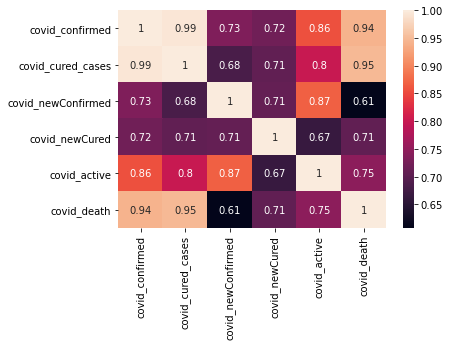

In [38]:
sns.heatmap(df[['covid_confirmed','covid_cured_cases',"covid_newConfirmed","covid_newCured","covid_active","covid_death"]].corr(), annot=True)
plt.show()

# Linear relation b\w Confirmed vs Cured (Pairplot)

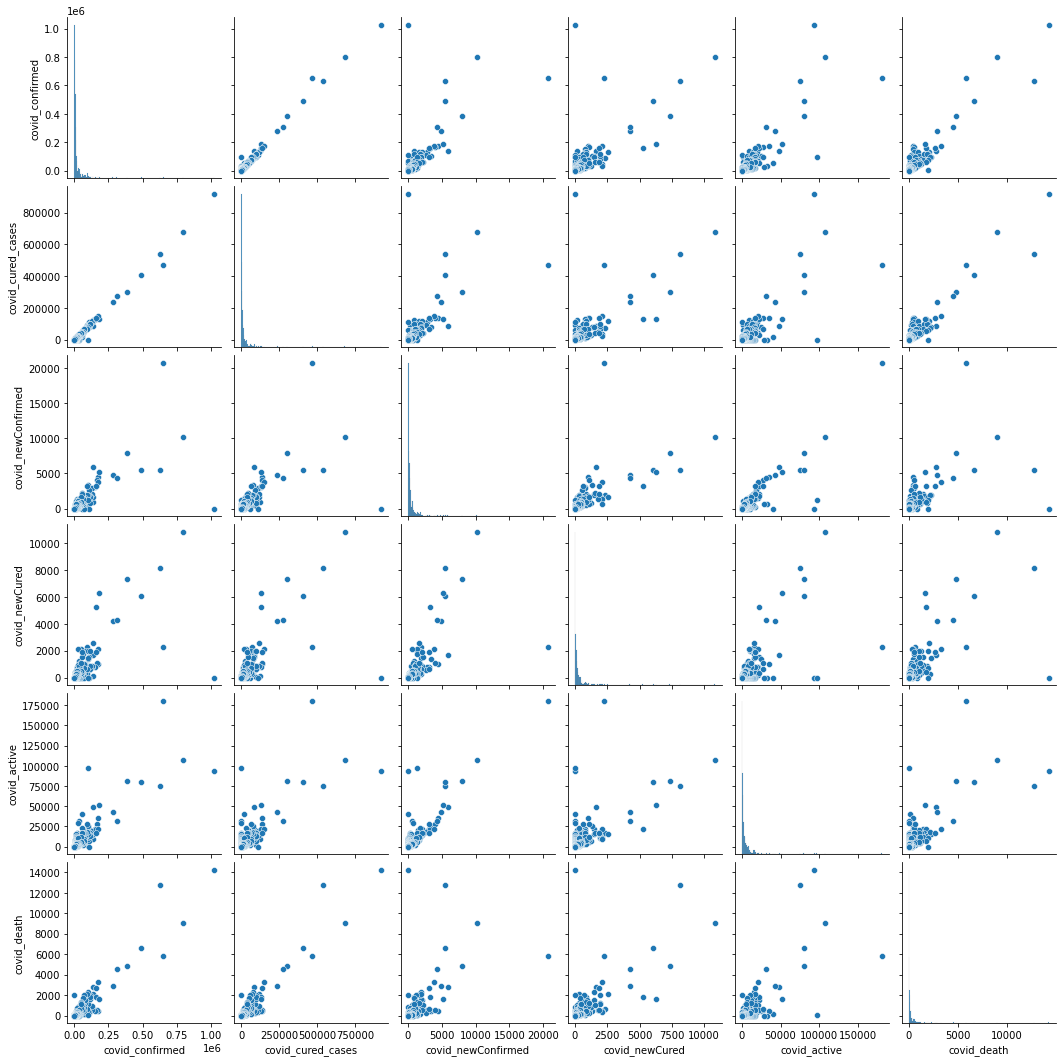

In [39]:
sns.pairplot(data =df, vars=['covid_confirmed','covid_cured_cases',"covid_newConfirmed","covid_newCured","covid_active","covid_death"])
plt.show()

In [40]:
a_covidcases_state=df.groupby(by=['Covid_States'])["covid_confirmed"].mean()
b_covidcases_state=df.groupby(by=['Covid_States'])["covid_cured_cases"].mean()
c_covidcases_state=df.groupby(by=['Covid_States'])["covid_active"].mean()
d_covidcases_state=df.groupby(by=['Covid_States'])["covid_death"].mean()


In [41]:
Covid_Confirmed=list(a_covidcases_state)
Covid_Cured_Cases=list(b_covidcases_state)
Covid_Active=list(c_covidcases_state)
Covid_Death=list(d_covidcases_state)


In [42]:
Covid_State=sorted(covid_State)


In [43]:
df1=pd.DataFrame(zip(Covid_State,Covid_Confirmed,Covid_Cured_Cases,Covid_Active,Covid_Death),columns=['Covid_State','Covid_Confirmed',"Covid_Cured_Cases","Covid_Active","Covid_Death"])

In [44]:
df1

Covid_State  Covid_Confirmed  \
0                Andaman and Nicobar Islands      1416.250000   
1                             Andhra Pradesh     68904.000000   
2                          Arunachal Pradesh       704.280000   
3                                      Assam      6598.138889   
4                                      Bihar     10620.947368   
5                                 Chandigarh     38692.000000   
6                               Chhattisgarh     22495.241379   
7   Dadra and Nagar Haveli and Daman and Diu      1627.500000   
8                                      Delhi     85642.916667   
9                                        Goa     19369.250000   
10                                   Gujarat     14589.205882   
11                                   Haryana     17679.958333   
12                          Himachal Pradesh      7291.750000   
13                         Jammu and Kashmir      7307.045455   
14                                 Jharkhand      8406.125000   
15                                 Karnataka     43200.032258   
16                                    Kerala     93710.400000   
17                                    Ladakh      6618.500000   
18                               Lakshadweep      2126.000000   
19                            Madhya Pradesh      9420.830189   
20                               Maharashtra    116081.810811   
21                                   Manipur      1690.055556   
22                                 Meghalaya      1454.000000   
23                                   Mizoram       489.818182   
24                                  Nagaland      1014.076923   
25                                    Odisha     12733.031250   
26                                Puducherry     13319.750000   
27                                    Punjab     15413.181818   
28                                 Rajasthan     13903.702703   
29                                    Sikkim      1616.600000   
30                                Tamil Nadu     27049.700000   
31                                 Telangana     10978.666667   
32                                   Tripura      4315.750000   
33                             Uttar Pradesh     14488.333333   
34                               Uttarakhand     11677.000000   
35                               West Bengal     30997.916667   

    Covid_Cured_Cases  Covid_Active  Covid_Death  
0         1366.750000     33.000000    16.500000  
1        62409.533333   5982.133333   512.333333  
2          678.720000     23.240000     2.320000  
3         4312.888889   2255.166667    33.333333  
4         8270.684211   2293.526316    56.710526  
5        33021.000000   5236.000000   435.000000  
6        17973.000000   4270.172414   252.068966  
7         1114.000000    504.750000     1.000000  
8        76572.916667   7882.666667  1187.333333  
9        15692.750000   3422.250000   254.250000  
10       11020.558824   3382.529412   186.117647  
11       14429.333333   3093.666667   156.958333  
12        6046.416667   1131.416667   110.250000  
13        6320.454545    889.000000    97.590909  
14        6318.791667   2004.375000    82.958333  
15       34277.225806   8456.838710   465.354839  
16       78754.933333  14592.600000   340.733333  
17        5564.500000    986.000000    68.000000  
18         941.000000   1178.000000     1.000000  
19        7596.660377   1727.320755    96.849057  
20       95407.027027  18874.432432  1750.270270  
21         186.888889   1485.333333    21.388889  
22        1313.272727    126.181818    14.545455  
23         424.636364     64.000000     1.181818  
24         933.230769     52.230769     7.538462  
25       11341.593750   1327.656250    63.781250  
26       11310.750000   1822.000000   187.000000  
27       12841.090909   2188.818182   383.272727  
28       10111.729730   3694.648649    97.324324  
29        1059.200000    614.600000    27.600000  
30       24081.275000   2629.575000   338.8500

In [45]:
df1.to_csv("E:\\innomatics\\covid_statewise.csv")

# Data visualization of covid cases of Each state

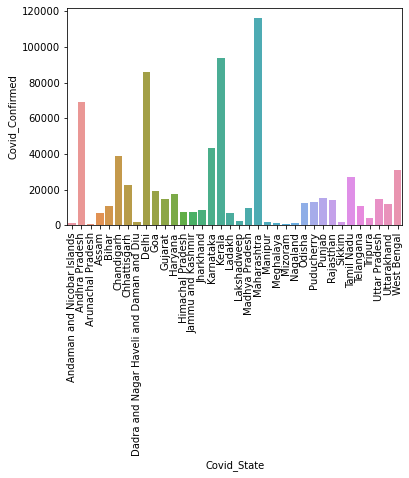

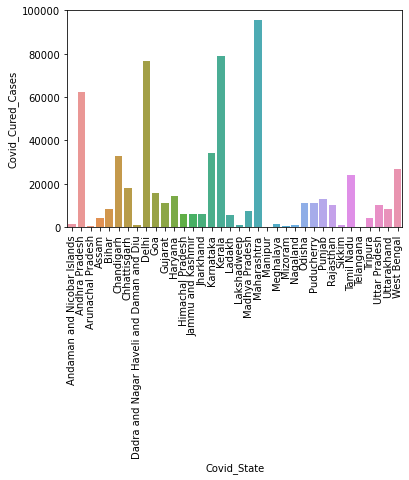

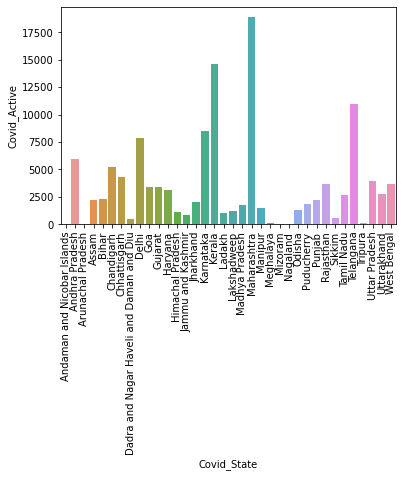

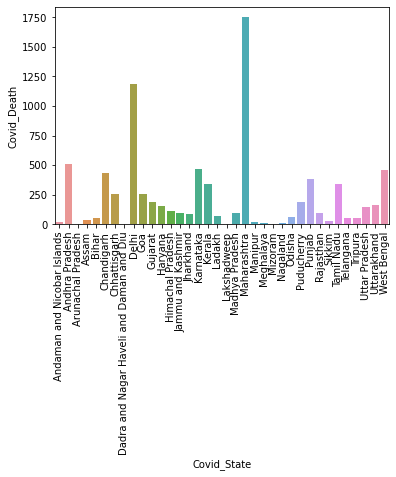

In [46]:
sns.barplot(x='Covid_State',y='Covid_Confirmed',data=df1)
plt.xticks(rotation=90)
plt.show()
sns.barplot(x='Covid_State',y='Covid_Cured_Cases',data=df1)
plt.xticks(rotation=90)
plt.show()
sns.barplot(x='Covid_State',y='Covid_Active',data=df1)
plt.xticks(rotation=90)
plt.show()
sns.barplot(x='Covid_State',y='Covid_Death',data=df1)
plt.xticks(rotation=90)
plt.show()

In [47]:
#lowest numberof covid cases of the state
print(df1.loc[df1["Covid_Confirmed"]==df1["Covid_Confirmed"].min()])
#highest number of covid cases of the state
print(df1.loc[df1["Covid_Confirmed"]==df1["Covid_Confirmed"].max()])

   Covid_State  Covid_Confirmed  Covid_Cured_Cases  Covid_Active  Covid_Death
23     Mizoram       489.818182         424.636364          64.0     1.181818
    Covid_State  Covid_Confirmed  Covid_Cured_Cases  Covid_Active  Covid_Death
20  Maharashtra    116081.810811       95407.027027  18874.432432   1750.27027


# Andaman_and_Nicobar_Islands covid19 data

In [48]:
Andaman_and_Nicobar_Islands=df.iloc[0:4]
Andaman_and_Nicobar_Islands

Covid_States            District_Covid  covid_confirmed  \
0  Andaman and Nicobar Islands                   Unknown             5613   
1  Andaman and Nicobar Islands             South Andaman               51   
2  Andaman and Nicobar Islands  North and Middle Andaman                1   
3  Andaman and Nicobar Islands                  Nicobars                0   

   covid_newConfirmed  covid_cured_cases  covid_newCured  covid_active  \
0                   0               5434               0           113   
1                   0                 32               0            19   
2                   0                  1               0             0   
3                   0                  0               0             0   

   covid_death  covid_newDeaths  
0           66                0  
1            0                0  
2            0                0  
3            0                0

In [49]:
Andaman_and_Nicobar_Islands.to_csv("E:\\innomatics\\Andaman.csv")

# Data Visualization of Andaman_and_Nicobar_Islands

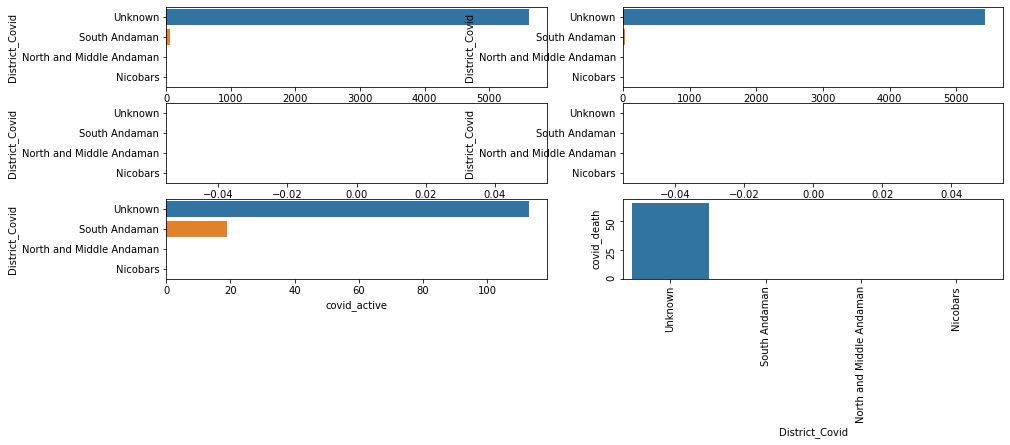

In [50]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Andaman_and_Nicobar_Islands,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Andaman_and_Nicobar_Islands,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Andaman_and_Nicobar_Islands,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Andaman_and_Nicobar_Islands,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Andaman_and_Nicobar_Islands,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Andaman_and_Nicobar_Islands,ax=ax6)
plt.xticks(rotation=90)

plt.show()

#  Andhra_Pradesh Covid19 Data

In [51]:
Andhra_Pradesh=df.iloc[4:19]
Andhra_Pradesh

Covid_States    District_Covid  covid_confirmed  covid_newConfirmed  \
4   Andhra Pradesh     East Godavari           135268                 952   
5   Andhra Pradesh          Chittoor           109972                1628   
6   Andhra Pradesh     West Godavari            96266                 331   
7   Andhra Pradesh            Guntur            95882                1576   
8   Andhra Pradesh         Anantapur            76884                1095   
9   Andhra Pradesh  S.P.S.R. Nellore            74297                1258   
10  Andhra Pradesh     Visakhapatnam            73737                1051   
11  Andhra Pradesh           Kurnool            72800                1158   
12  Andhra Pradesh          Prakasam            68394                 353   
13  Andhra Pradesh        Srikakulam            61178                1680   
14  Andhra Pradesh     Y.S.R. Kadapa            60423                 219   
15  Andhra Pradesh           Krishna            58819                 641   
16  Andhra Pradesh      Vizianagaram            46745                 692   
17  Andhra Pradesh       Other State             2461                   0   
18  Andhra Pradesh  Foreign Evacuees              434                   0   

    covid_cured_cases  covid_newCured  covid_active  covid_death  \
4              125213             126          9394          661   
5               96064             835         12960          948   
6               94180              32          1535          551   
7               86867             884          8308          707   
8               70521             416          5731          632   
9               65964             208          7754          579   
10              65990             414          7133          614   
11              64373             464          7898          529   
12              63239             248          4545          610   
13              48942             180         11860          376   
14              57831             198          2110          482   
15              51401             216          6672          746   
16              42663              83          3832          250   
17               2461               0             0            0   
18                434               0             0            0   

    covid_newDeaths  
4                 6  
5                 4  
6                 6  
7                 4  
8                 5  
9                 7  
10                6  
11                2  
12                3  
13                6  
14                5  
15               12  
16                3  
17                0  
18                0

In [52]:
Andhra_Pradesh.to_csv("E:\\innomatics\\Andhrapradesh.csv")

In [53]:
Andhra_Pradesh[["covid_confirmed","covid_newConfirmed","covid_cured_cases","covid_newCured","covid_active","covid_newDeaths","covid_death"]].sum()

covid_confirmed       1033560
covid_newConfirmed      12634
covid_cured_cases      936143
covid_newCured           4304
covid_active            89732
covid_newDeaths            69
covid_death              7685
dtype: int64

# Data visualization of Andhra_Pradesh

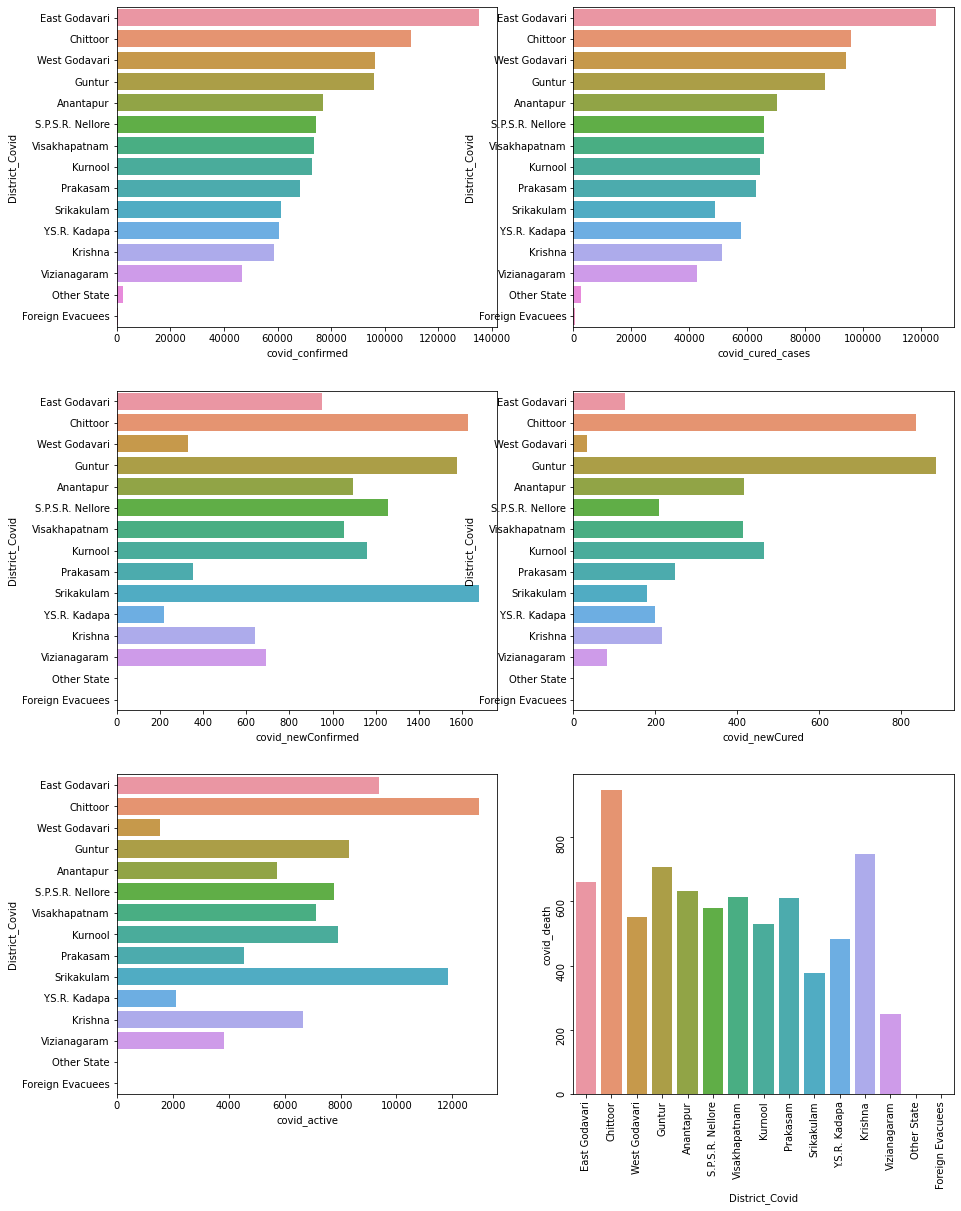

In [54]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Andhra_Pradesh,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Andhra_Pradesh,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Andhra_Pradesh,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Andhra_Pradesh,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Andhra_Pradesh,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Andhra_Pradesh,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Arunachal_Pradesh Covid19 Data

In [55]:
Arunachal_Pradesh=df.iloc[19:44]
Arunachal_Pradesh

Covid_States       District_Covid  covid_confirmed  \
19  Arunachal Pradesh           Papum Pare             7074   
20  Arunachal Pradesh            Changlang             1306   
21  Arunachal Pradesh           East Siang             1189   
22  Arunachal Pradesh          West Kameng             1054   
23  Arunachal Pradesh           West Siang             1037   
24  Arunachal Pradesh  Lower Dibang Valley              645   
25  Arunachal Pradesh                Tirap              600   
26  Arunachal Pradesh                Lohit              588   
27  Arunachal Pradesh               Tawang              516   
28  Arunachal Pradesh               Namsai              459   
29  Arunachal Pradesh      Upper Subansiri              447   
30  Arunachal Pradesh      Lower Subansiri              402   
31  Arunachal Pradesh          Upper Siang              362   
32  Arunachal Pradesh          East Kameng              307   
33  Arunachal Pradesh            Lepa Rada              295   
34  Arunachal Pradesh          Lower Siang              289   
35  Arunachal Pradesh             Longding              250   
36  Arunachal Pradesh                Anjaw              207   
37  Arunachal Pradesh        Pakke Kessang              136   
38  Arunachal Pradesh                Siang              133   
39  Arunachal Pradesh         Kurung Kumey              117   
40  Arunachal Pradesh             Shi Yomi              104   
41  Arunachal Pradesh            Kra Daadi               37   
42  Arunachal Pradesh                Kamle               30   
43  Arunachal Pradesh  Upper Dibang Valley               23   

    covid_newConfirmed  covid_cured_cases  covid_newCured  covid_active  \
19                  12               6847              14           198   
20                   5               1281               0            21   
21                   0               1142               0            43   
22                  12                987              11            63   
23                   0               1027               0             7   
24                  20                502               2           141   
25                   0                589               0             9   
26                   0                576               1            12   
27                   7                493               0            21   
28                   2                433               0            22   
29                   1                441               0             4   
30                   0                380               0            21   
31                   0                361               0             1   
32                   0                304               0             3   
33                   0                289               0             6   
34                   1                287               0             2   
35                   0                250               0             0   
36                   0                204               0             3   
37                   1                132               0             4   
38                   0                132               0             0   
39                   0                117               0             0   
40                   0                104               0             0   
41                   0                 37               0             0   
42                   0                 30               0             0   
43                   0                 23               0             0   

    covid_death  covid_newDeaths  
19           29                0  
20            4                0  
21            4                0  
22            4                0  
23            3                0  
24            2                2  
25            2                0  
26            0                0  
27            2                0  
28            4                0  
29            2                0  

In [56]:
Arunachal_Pradesh.to_csv("E:\\innomatics\\ArunachalPradesh.csv") 

# Data Visualiaztion of Arunachal_Pradesh

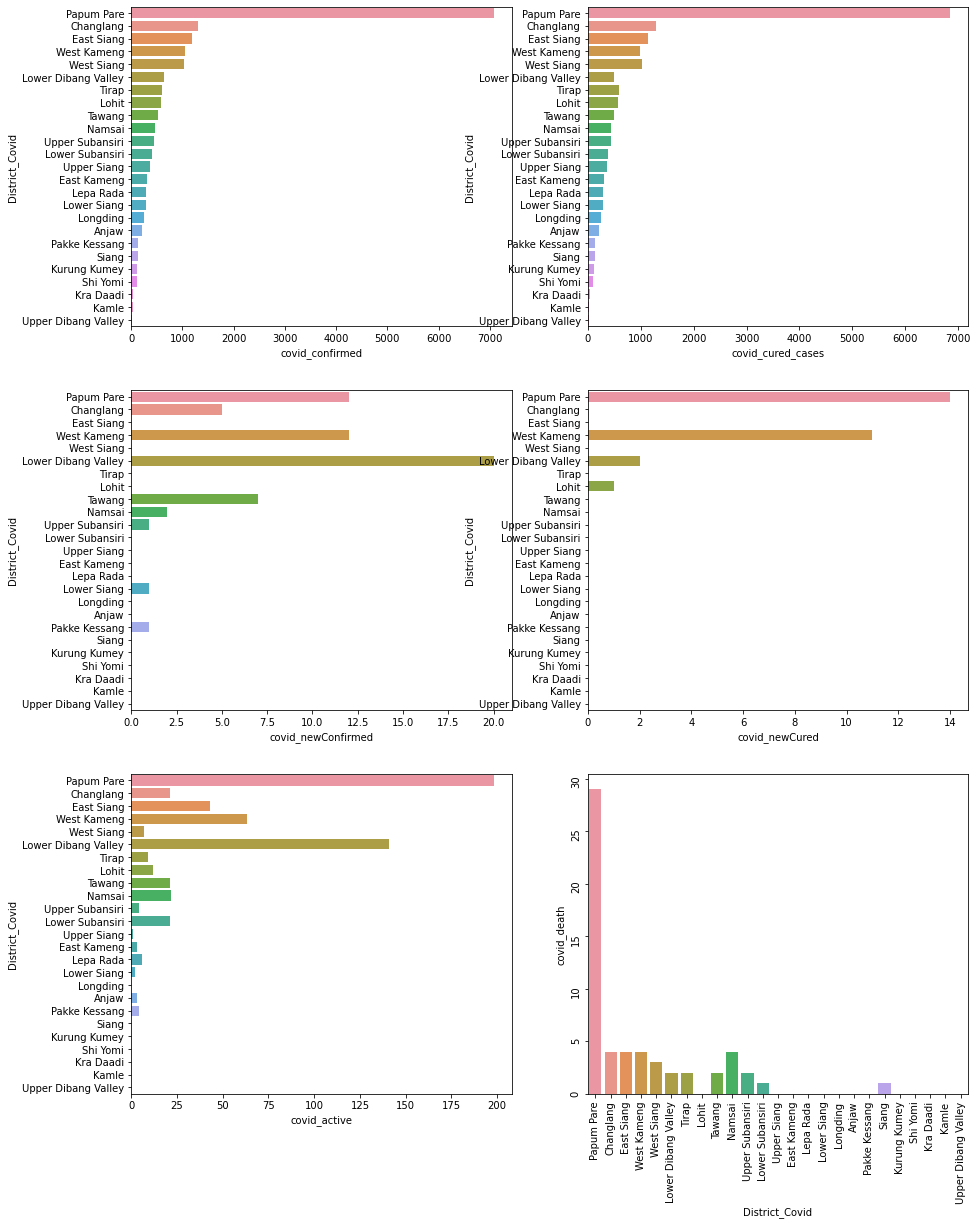

In [57]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Arunachal_Pradesh,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Arunachal_Pradesh,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Arunachal_Pradesh,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Arunachal_Pradesh,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Arunachal_Pradesh,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Arunachal_Pradesh,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Assam Covid19 Data

In [58]:
Assam=df.iloc[44:80]
Assam

Covid_States           District_Covid  covid_confirmed  covid_newConfirmed  \
44        Assam                  Unknown           109341                   0   
45        Assam      Kamrup Metropolitan            56185                   0   
46        Assam                Dibrugarh            10437                   0   
47        Assam                   Jorhat             9176                   0   
48        Assam                   Cachar             6601                   0   
49        Assam                   Kamrup             5466                   0   
50        Assam                   Nagaon             5096                   0   
51        Assam                 Golaghat             4074                   0   
52        Assam                 Tinsukia             3869                   0   
53        Assam                Lakhimpur             3128                   0   
54        Assam                 Sonitpur             3053                   0   
55        Assam                  Darrang             2221                   0   
56        Assam                    Hojai             1852                   0   
57        Assam                   Dhubri             1806                   0   
58        Assam               Hailakandi             1661                   0   
59        Assam               Bongaigaon             1530                   0   
60        Assam                  Barpeta             1454                   0   
61        Assam                Karimganj             1364                   0   
62        Assam                  Nalbari             1194                   0   
63        Assam                  Dhemaji              882                   0   
64        Assam                 Goalpara              882                   0   
65        Assam            Karbi Anglong              869                   0   
66        Assam                 Udalguri              843                   0   
67        Assam                 Morigaon              826                   0   
68        Assam                    Baksa              760                   0   
69        Assam                Sivasagar              738                   0   
70        Assam                Kokrajhar              559                   0   
71        Assam                Biswanath              547                   0   
72        Assam                  Chirang              370                   0   
73        Assam               Dima Hasao              274                   0   
74        Assam                   Majuli              175                   0   
75        Assam                Charaideo              148                   0   
76        Assam  South Salmara Mankachar               73                   0   
77        Assam       West Karbi Anglong               47                   0   
78        Assam              Other State               19                   0   
79        Assam       Airport Quarantine               13                   0   

    covid_cured_cases  covid_newCured  covid_active  covid_death  \
44             109341               0             0          383   
45              15370               0         40655          160   
46               2409               0          7924          104   
47               1752               0          7368           56   
48               1498               0          5059           44   
49               2074               0          3354           38   
50               2506               0          2564           26   
51               1656               0          2372           46   
52               1798               0          2027           44   
53               1135               0          1969           24   
54               1727               0          1306           20   
55               1730               0           473           18   
56               1160               0           676           16   
57               1215               0           579  

In [59]:
Assam.to_csv("E:\\innomatics\\Assam.csv")

# Data Visualization of Assam

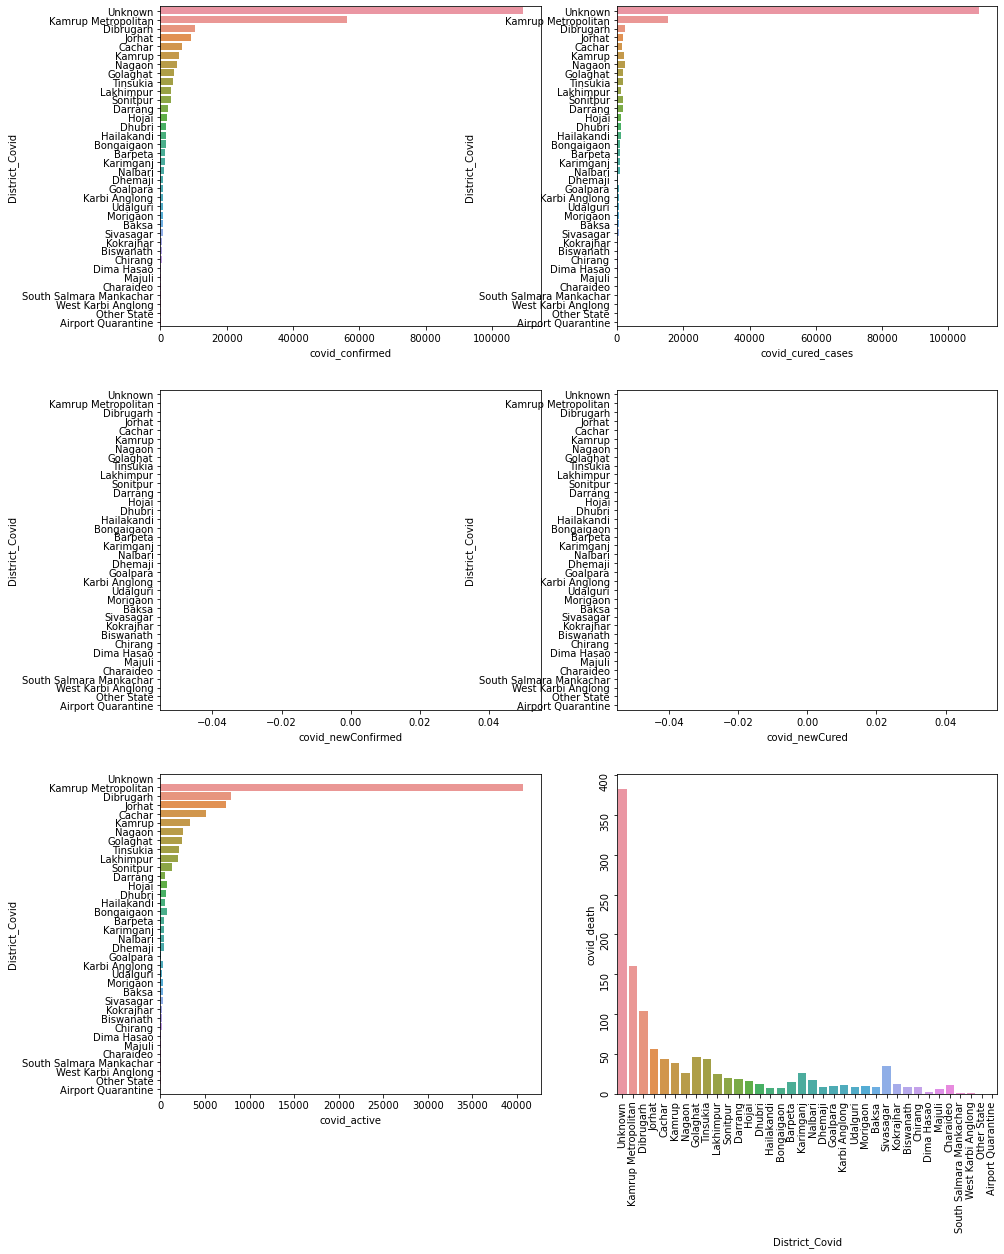

In [60]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Assam,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Assam,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Assam,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Assam,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Assam,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Assam,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Bihar Covid19 Data

In [61]:
Bihar=df.iloc[80:118]
Bihar

Covid_States  District_Covid  covid_confirmed  covid_newConfirmed  \
80         Bihar           Patna            90207                1866   
81         Bihar            Gaya            18762                1340   
82         Bihar     Muzaffarpur            18537                 473   
83         Bihar       Bhagalpur            16810                 684   
84         Bihar       Begusarai            13279                 525   
85         Bihar           Saran            12969                 707   
86         Bihar          Purnia            12888                 398   
87         Bihar         Nalanda            11540                 226   
88         Bihar  East Champaran            11099                 266   
89         Bihar      Aurangabad            10745                 682   
90         Bihar  West Champaran             9780                 347   
91         Bihar       Madhubani             9661                 314   
92         Bihar         Saharsa             9562                 252   
93         Bihar          Rohtas             9498                 229   
94         Bihar         Katihar             9237                 146   
95         Bihar          Araria             8617                 111   
96         Bihar        Vaishali             8568                 385   
97         Bihar      Samastipur             8061                 438   
98         Bihar           Siwan             7969                 275   
99         Bihar          Munger             7950                 250   
100        Bihar       Jehanabad             7868                 375   
101        Bihar       Gopalganj             7648                  63   
102        Bihar          Supaul             7468                 286   
103        Bihar         Bhojpur             7255                 140   
104        Bihar       Madhepura             6553                 207   
105        Bihar          Nawada             6273                 222   
106        Bihar           Buxar             6058                 177   
107        Bihar       Darbhanga             5569                 150   
108        Bihar       Sitamarhi             5568                 134   
109        Bihar      Kishanganj             5346                 115   
110        Bihar      Lakhisarai             5145                 150   
111        Bihar           Banka             4671                 126   
112        Bihar           Jamui             4640                 177   
113        Bihar        Khagaria             4619                 221   
114        Bihar           Arwal             3970                 132   
115        Bihar      Sheikhpura             3958                  35   
116        Bihar          Kaimur             3185                 109   
117        Bihar         Sheohar             2063                  62   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
80               73149            2305         16441          617   
81               11731             809          6931          100   
82               13363             258          5078           96   
83               13548             680          3116          146   
84                9445             174          3794           40   
85                8548             174          4348           73   
86               10405             242          2454           29   
87                9367              94          2089           84   
88                8962              97          2077           60   
89                6694             340          4029           22   
90                7037             177          2698           45   
91                8233              99          1385           43   
92                7869             378          1675           18   
93                7524              91          1926           48   
94                7738              58          1479           20   
95                7786              65           805

In [62]:
Bihar.to_csv("E:\\innomatics\\Bihar.csv")

# Data Visualization of Bihar



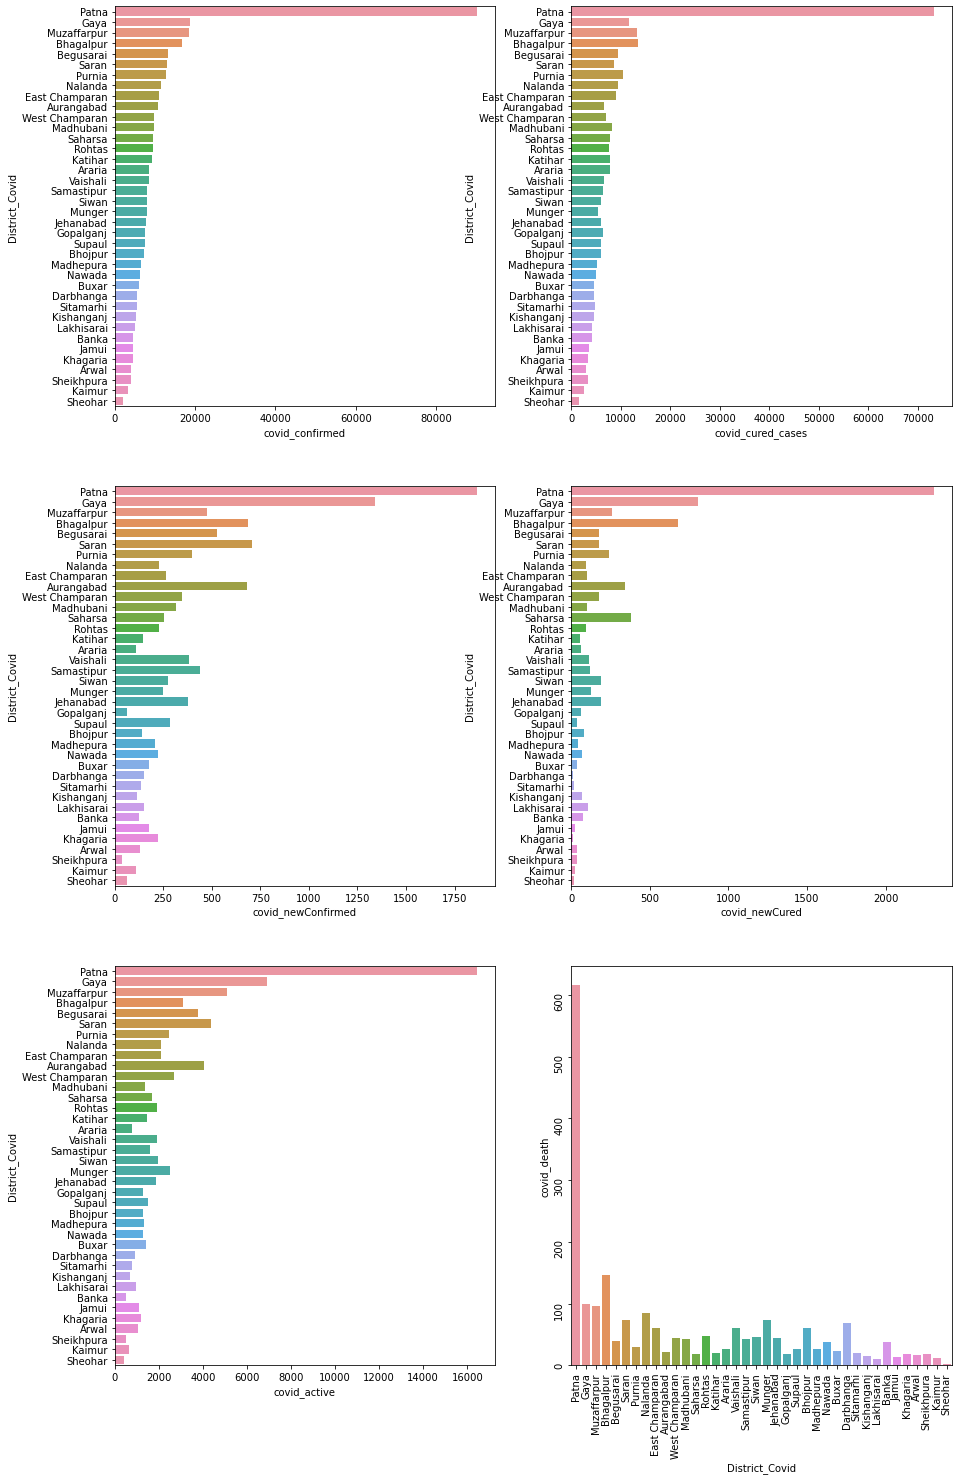

In [63]:
fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Bihar,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Bihar,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Bihar,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Bihar,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Bihar,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Bihar,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Chandigarh Covid19 Data

In [64]:
Chandigarh=df.iloc[118:119]
Chandigarh

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
118   Chandigarh     Chandigarh            38692                 749   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
118              33021             413          5236          435   

     covid_newDeaths  
118                2

# Chhattisgarh Covid19 Data

In [65]:
Chhattisgarh=df.iloc[119:148]
Chhattisgarh

Covid_States            District_Covid  covid_confirmed  \
119  Chhattisgarh                    Raipur           133970   
120  Chhattisgarh                      Durg            79185   
121  Chhattisgarh                  Bilaspur            45209   
122  Chhattisgarh               Rajnandgaon            44042   
123  Chhattisgarh                   Raigarh            37147   
124  Chhattisgarh            Janjgir Champa            33051   
125  Chhattisgarh                     Korba            32600   
126  Chhattisgarh              Baloda Bazar            24709   
127  Chhattisgarh                Mahasamund            19908   
128  Chhattisgarh                     Balod            17738   
129  Chhattisgarh                   Surguja            17287   
130  Chhattisgarh                  Dhamtari            17175   
131  Chhattisgarh                  Bametara            14248   
132  Chhattisgarh                Kabeerdham            13913   
133  Chhattisgarh                    Bastar            12983   
134  Chhattisgarh       Uttar Bastar Kanker            12798   
135  Chhattisgarh                  Surajpur            12688   
136  Chhattisgarh                 Gariaband            12447   
137  Chhattisgarh                   Jashpur            11535   
138  Chhattisgarh                   Mungeli            10700   
139  Chhattisgarh                    Koriya            10675   
140  Chhattisgarh                 Balrampur             7460   
141  Chhattisgarh                 Kondagaon             7212   
142  Chhattisgarh  Dakshin Bastar Dantewada             7188   
143  Chhattisgarh    Gaurela Pendra Marwahi             4678   
144  Chhattisgarh                   Bijapur             4530   
145  Chhattisgarh                     Sukma             4381   
146  Chhattisgarh                Narayanpur             2299   
147  Chhattisgarh               Other State              606   

     covid_newConfirmed  covid_cured_cases  covid_newCured  covid_active  \
119                1639             116693            2538         15209   
120                1355              66713            1981         11231   
121                 988              36117             810          8542   
122                 661              36466             819          7273   
123                 761              28466             560          8248   
124                 680              25601             411          7090   
125                 791              25805             968          6535   
126                 706              15826             217          8668   
127                 402              14730             229          4958   
128                 364              14409             369          3148   
129                 319              13881             217          3266   
130                 290              12529             146          4352   
131                 476               9996             127          4132   
132                 299               8612             249          5173   
133                 256              11408             167          1468   
134                 447               9202             108          3487   
135                 264              10280             414          2346   
136                 324               9196             408          3148   
137                 352               8386             273          3068   
138                 402               6353             159          4307   
139                 261               8639               1          1971   
140                 227               5500             250          1931   
141                 128               6285              63           879   
142                  65               6803              44           367   
143                 141               2315               0          2348   
144                  20               4259               7           243   
145                  26         

In [66]:
Chhattisgarh.to_csv("E:\\innomatics\\Chhattisgarh_DATA.csv")

# Data Visualization of Chhattisgarh

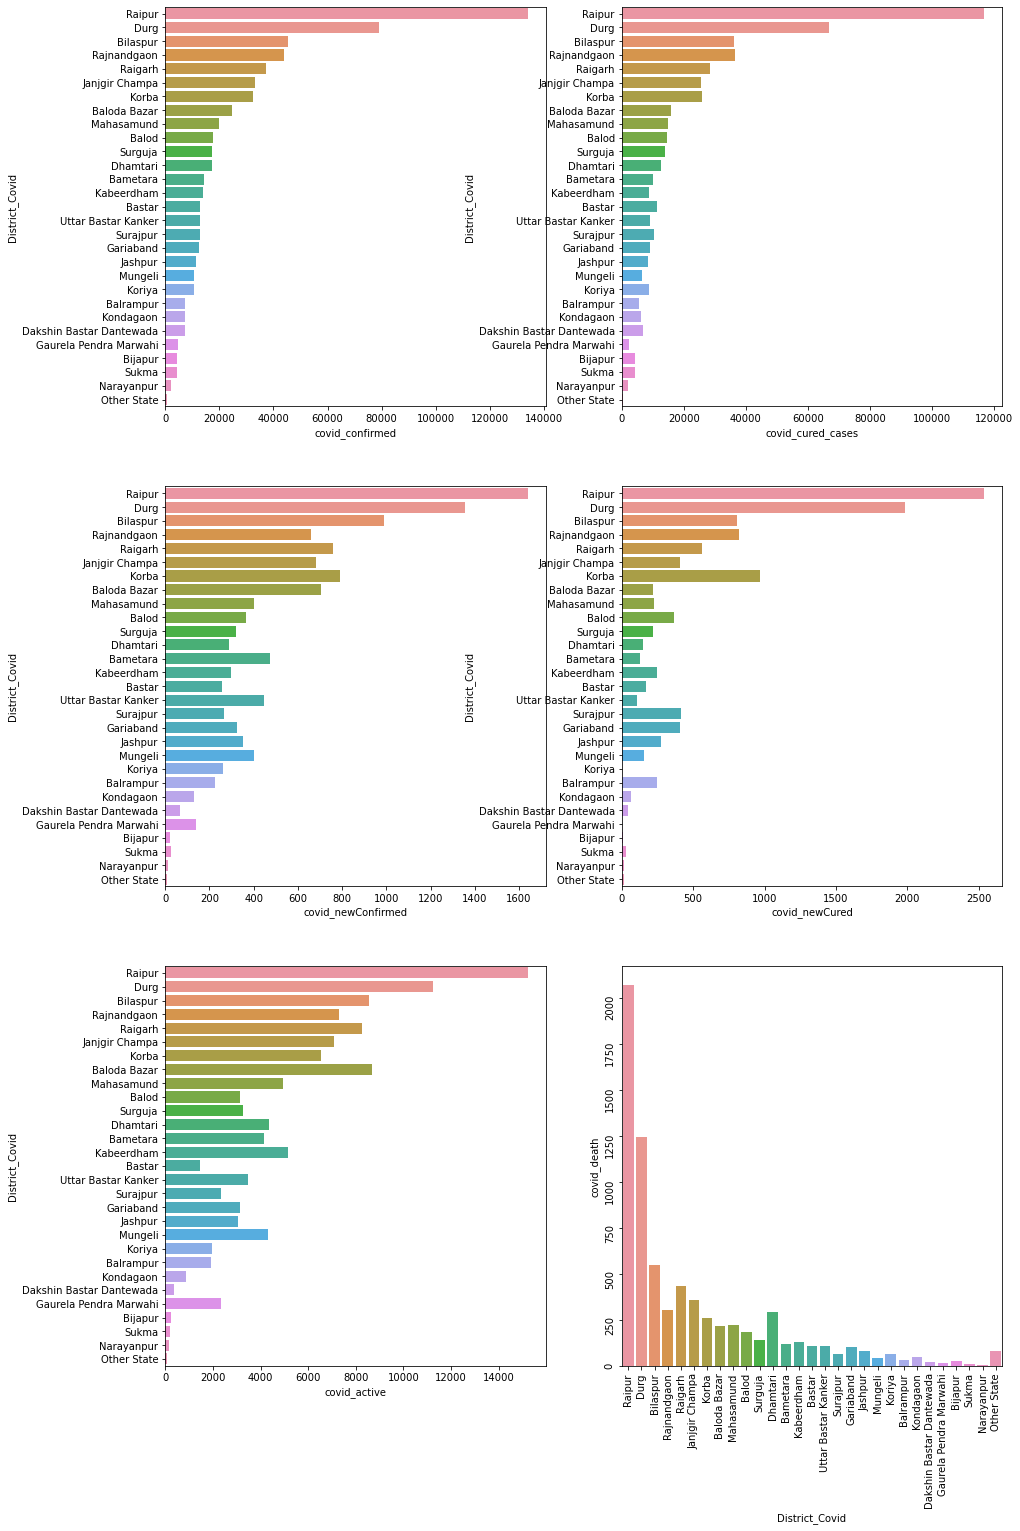

In [67]:
fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Chhattisgarh,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Chhattisgarh,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Chhattisgarh,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Chhattisgarh,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Chhattisgarh,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Chhattisgarh,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Dadra_and_Nagar_Haveli  Covid19 Data

In [68]:
Dadra_and_Nagar_Haveli=df.iloc[148:152]
Dadra_and_Nagar_Haveli

Covid_States          District_Covid  covid_confirmed  \
148  Dadra and Nagar Haveli  Dadra and Nagar Haveli             3902   
149  Dadra and Nagar Haveli                   Daman             2296   
150  Dadra and Nagar Haveli                     Diu              312   
151  Dadra and Nagar Haveli             Other State                0   

     covid_newConfirmed  covid_cured_cases  covid_newCured  covid_active  \
148                 156               2321              74          1573   
149                  47               1823              30           446   
150                   0                312               0             0   
151                   0                  0               0             0   

     covid_death  covid_newDeaths  
148            3                0  
149            1                0  
150            0                0  
151            0                0

# Data visualization of Dadra_and_Nagar_Haveli

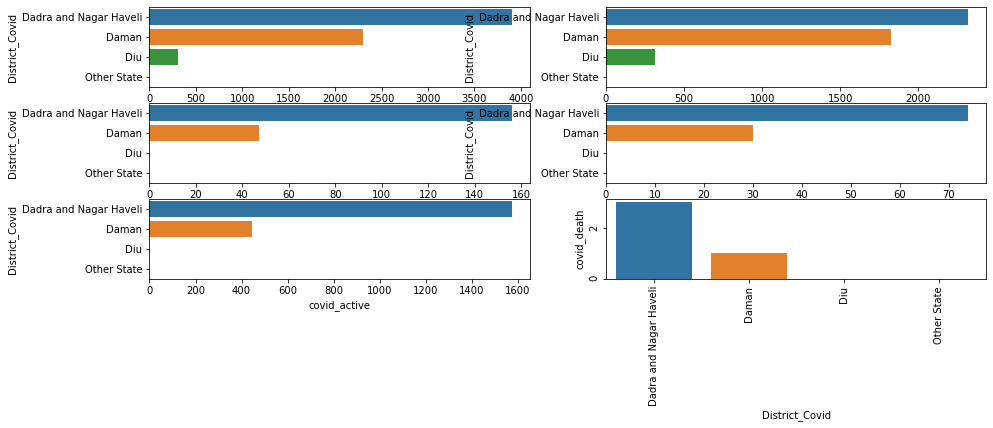

In [69]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Dadra_and_Nagar_Haveli,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Dadra_and_Nagar_Haveli,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Dadra_and_Nagar_Haveli,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Dadra_and_Nagar_Haveli,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Dadra_and_Nagar_Haveli,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Dadra_and_Nagar_Haveli,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Delhi Covid19 Data

In [70]:
Delhi=df.iloc[152:164]
Delhi

Covid_States    District_Covid  covid_confirmed  covid_newConfirmed  \
152        Delhi           Unknown          1026927                   0   
153        Delhi     Central Delhi              184                   0   
154        Delhi  South East Delhi              130                   0   
155        Delhi        West Delhi              122                   0   
156        Delhi       South Delhi               70                   0   
157        Delhi       North Delhi               60                   0   
158        Delhi          Shahdara               48                   0   
159        Delhi  South West Delhi               42                   0   
160        Delhi        East Delhi               38                   0   
161        Delhi         New Delhi               37                   0   
162        Delhi  North West Delhi               32                   0   
163        Delhi  North East Delhi               25                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
152             918875               0         93805        14247   
153                  0               0           184            0   
154                  0               0           130            0   
155                  0               0           122            0   
156                  0               0            70            0   
157                  0               0            60            0   
158                  0               0            48            0   
159                  0               0            42            0   
160                  0               0            38            0   
161                  0               0            37            0   
162                  0               0            31            1   
163                  0               0            25            0   

     covid_newDeaths  
152                0  
153                0  
154                0  
155                0  
156                0  
157                0  
158                0  
159                0  
160                0  
161                0  
162                0  
163                0

In [71]:
Delhi.to_csv("E:\\innomatics\\Delhi.csv")

# Data visualization of Delhi

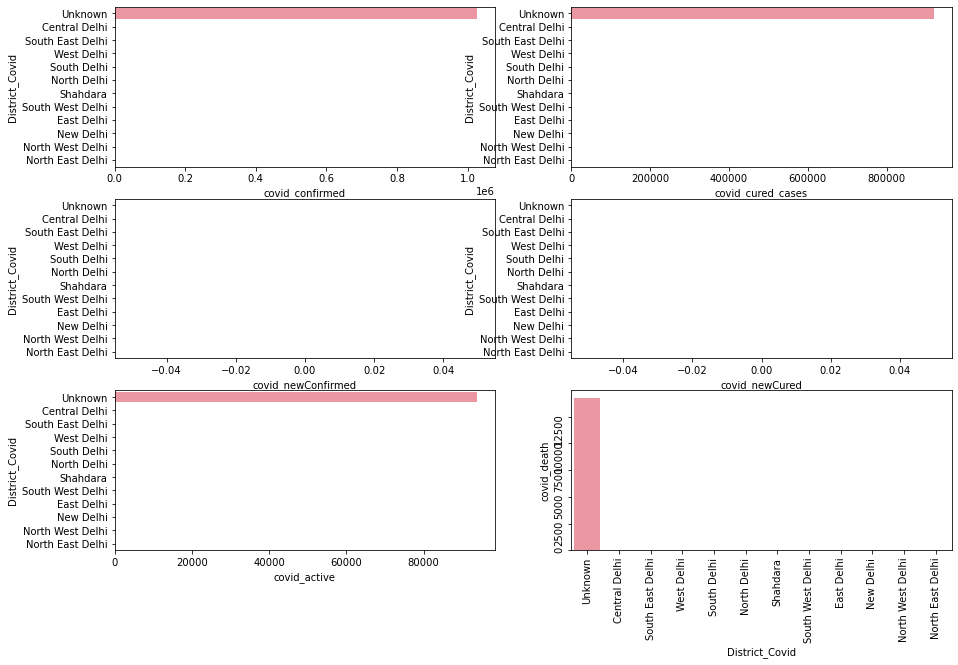

In [72]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Delhi,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Delhi,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Delhi,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Delhi,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Delhi,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Delhi,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Goa Covid19 Data

In [73]:
Goa=df.iloc[164:168]
Goa

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
164          Goa        Unknown            71098                   0   
165          Goa      South Goa             3511                   0   
166          Goa      North Goa             2668                   0   
167          Goa    Other State              200                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
164              60210               0         10063          825   
165               1407               0          1978          126   
166                964               0          1639           65   
167                190               0             9            1   

     covid_newDeaths  
164                0  
165                0  
166                0  
167                0

# Data Visualization of Goa

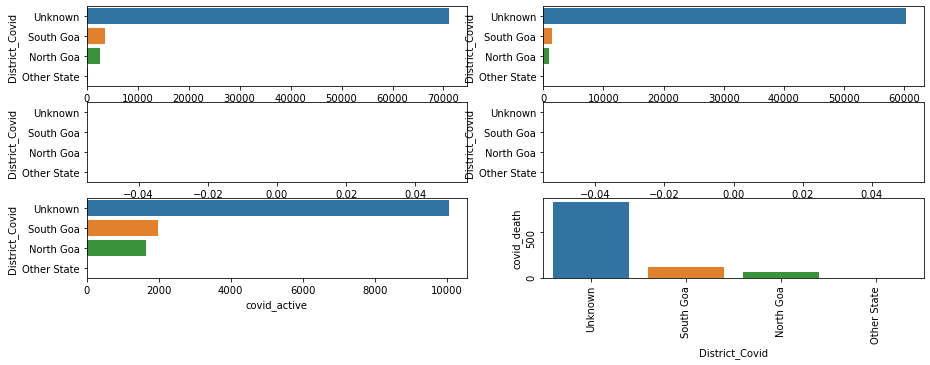

In [74]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Goa,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Goa,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Goa,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Goa,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Goa,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Goa,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Gujarat Covid19 Data

In [75]:
Gujarat=df.iloc[168:202]
Gujarat

Covid_States   District_Covid  covid_confirmed  covid_newConfirmed  \
168      Gujarat        Ahmedabad           138305                5864   
169      Gujarat            Surat           104584                2103   
170      Gujarat         Vadodara            47090                 760   
171      Gujarat           Rajkot            40557                 676   
172      Gujarat         Jamnagar            19216                 674   
173      Gujarat          Mehsana            13419                 598   
174      Gujarat      Gandhinagar            13261                 289   
175      Gujarat        Bhavnagar            10962                 379   
176      Gujarat         Junagadh             8475                 251   
177      Gujarat      Banaskantha             7811                 282   
178      Gujarat            Patan             7459                 163   
179      Gujarat            Kutch             7233                 180   
180      Gujarat          Bharuch             6880                 117   
181      Gujarat       Panchmahal             6316                  87   
182      Gujarat           Amreli             5732                  82   
183      Gujarat            Kheda             5481                 143   
184      Gujarat            Dahod             5390                 182   
185      Gujarat    Surendranagar             5110                 196   
186      Gujarat      Sabarkantha             4896                 173   
187      Gujarat            Morbi             4788                  41   
188      Gujarat            Anand             4344                 119   
189      Gujarat        Mahisagar             3857                 156   
190      Gujarat          Narmada             3647                  32   
191      Gujarat      Gir Somnath             3639                 115   
192      Gujarat          Navsari             3417                 121   
193      Gujarat           Valsad             2740                 109   
194      Gujarat             Tapi             2483                 130   
195      Gujarat         Aravalli             1993                  84   
196      Gujarat  Devbhumi Dwarka             1974                  39   
197      Gujarat            Botad             1596                  30   
198      Gujarat   Chhota Udaipur             1584                  60   
199      Gujarat        Porbandar             1147                  45   
200      Gujarat             Dang              485                  16   
201      Gujarat      Other State              162                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
168              86959            1644         48555         2791   
169              80973            1516         22127         1484   
170              40427             545          6238          425   
171              35291             796          4879          387   
172              15377             429          3713          126   
173               9311             255          4041           67   
174              11172             118          1942          147   
175               8136             146          2706          120   
176               7233             169          1184           58   
177               6572             140          1164           75   
178               5966              82          1428           65   
179               5442              53          1755           36   
180               5118              42          1716           46   
181               5446             106           838           32   
182               5117             104           572           43   
183               4593              42           866           22   
184               4696              28           682           12   
185               4063              51           985           62   
186               3770              15          1073           53   
187               4044           

# Data Visualization of Gujarat

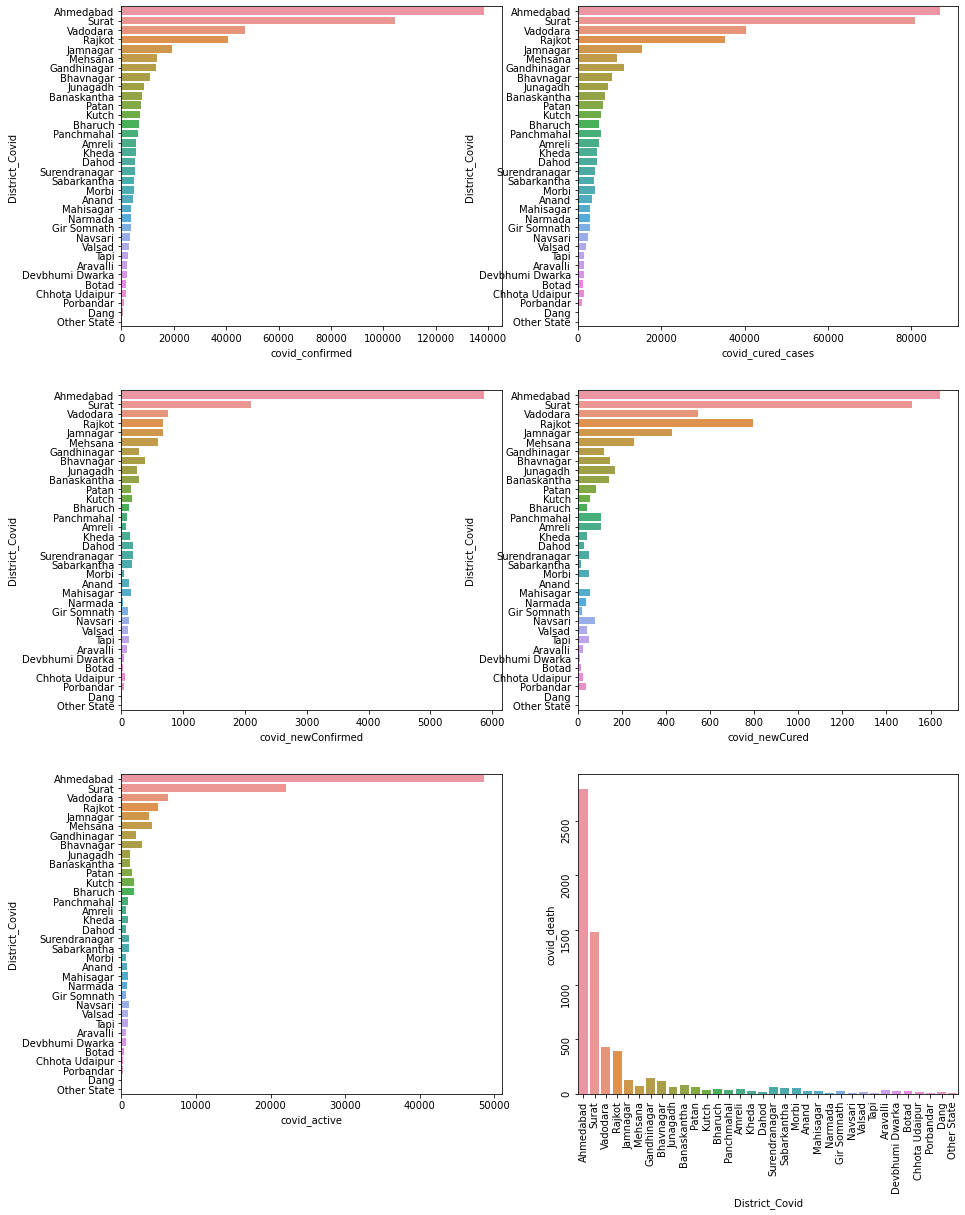

In [76]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Gujarat,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Gujarat,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Gujarat,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Gujarat,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Gujarat,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Gujarat,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Haryana Covid 19 Data

In [77]:
Haryana=df.iloc[202:226]
Haryana

Covid_States    District_Covid  covid_confirmed  covid_newConfirmed  \
202      Haryana          Gurugram           103298                3410   
203      Haryana         Faridabad            65294                1560   
204      Haryana             Hisar            25481                 940   
205      Haryana           Sonipat            24795                 610   
206      Haryana            Karnal            23460                 570   
207      Haryana         Panchkula            19105                 368   
208      Haryana            Ambala            18934                 340   
209      Haryana           Panipat            17040                 491   
210      Haryana       Kurukshetra            15545                 276   
211      Haryana            Rohtak            15069                 150   
212      Haryana       Yamunanagar            13083                 298   
213      Haryana            Rewari            12645                 115   
214      Haryana             Sirsa            11981                 469   
215      Haryana              Jind             9746                 289   
216      Haryana           Bhiwani             8711                 172   
217      Haryana           Jhajjar             8687                 217   
218      Haryana         Fatehabad             8041                 149   
219      Haryana      Mahendragarh             7648                 292   
220      Haryana           Kaithal             6469                  94   
221      Haryana            Palwal             5083                  58   
222      Haryana               Nuh             2103                  51   
223      Haryana     Charkhi Dadri             2101                  66   
224      Haryana          Italians                0                   0   
225      Haryana  Foreign Evacuees                0                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
202              77784            1359         25085          429   
203              55155             522          9653          486   
204              19728             426          5367          386   
205              19376             573          5302          117   
206              18868             545          4375          217   
207              16297             388          2625          183   
208              15947             282          2784          203   
209              13280             134          3565          195   
210              13142             201          2231          172   
211              13738             131          1168          163   
212              11644             318          1242          197   
213              12065             162           500           80   
214               9815             219          2028          138   
215               7788               4          1816          142   
216               7191             199          1341          179   
217               7483             146          1096          108   
218               5997             177          1882          162   
219               6969              90           657           22   
220               5851             101           530           88   
221               4745              36           298           40   
222               1850              31           219           34   
223               1591              13           484           26   
224                  0               0             0            0   
225                  0               0             0            0   

     covid_newDeaths  
202               11  
203               10  
204                7  
205                5  
206                6  
207                3  
208                5  
209                0  
210                2  
211                0  
212                0  
213                3  
214                4  
215                1  
216                2  
217                2  
218        

# Data Visualization of Haryana

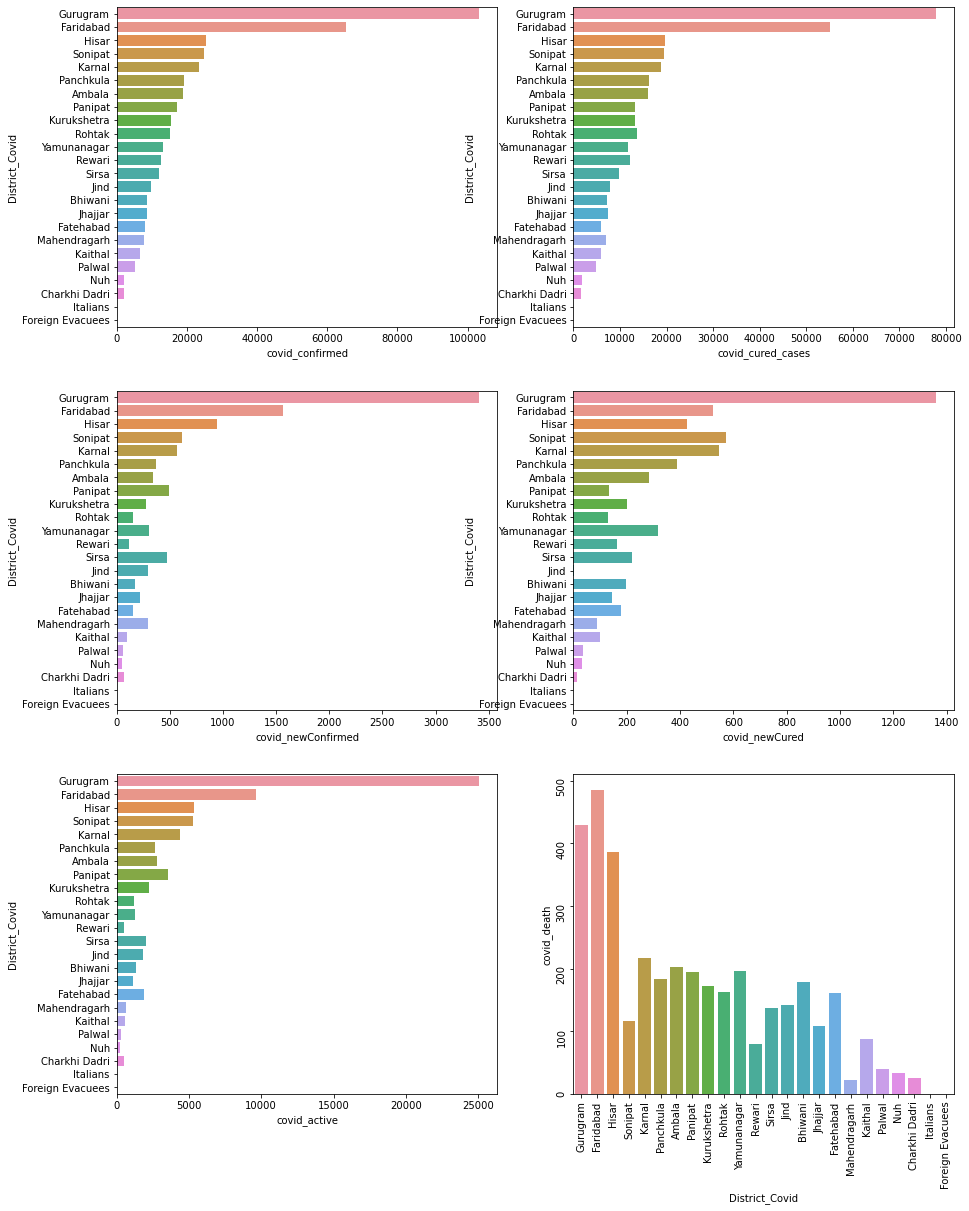

In [78]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Haryana,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Haryana,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Haryana,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Haryana,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Haryana,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Haryana,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Himachal_Pradesh Coid19 Data

In [79]:
Himachal_Pradesh=df.iloc[226:238]
Himachal_Pradesh

Covid_States    District_Covid  covid_confirmed  covid_newConfirmed  \
226  Himachal Pradesh            Kangra            14848                 423   
227  Himachal Pradesh            Shimla            13579                 224   
228  Himachal Pradesh             Mandi            12823                  83   
229  Himachal Pradesh             Solan            11354                 149   
230  Himachal Pradesh               Una             6163                  38   
231  Himachal Pradesh           Sirmaur             6040                 229   
232  Himachal Pradesh          Hamirpur             5514                 104   
233  Himachal Pradesh             Kullu             5433                  27   
234  Himachal Pradesh          Bilaspur             4642                  64   
235  Himachal Pradesh            Chamba             3799                   9   
236  Himachal Pradesh  Lahaul and Spiti             1702                   3   
237  Himachal Pradesh           Kinnaur             1604                  10   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
226              11369             325          3162          315   
227              11685              71          1569          321   
228              11482             114          1180          161   
229               8857             179          2408           89   
230               5025              70          1039           98   
231               4654              84          1332           54   
232               4379              59          1057           77   
233               4824              35           491           91   
234               3853              42           758           30   
235               3455              63           279           57   
236               1510              59           179           13   
237               1464              60           123           17   

     covid_newDeaths  
226               12  
227                4  
228                4  
229                2  
230                3  
231                2  
232                3  
233                1  
234                1  
235                0  
236                0  
237                0

# Data Visualization of Himachal Pradesh

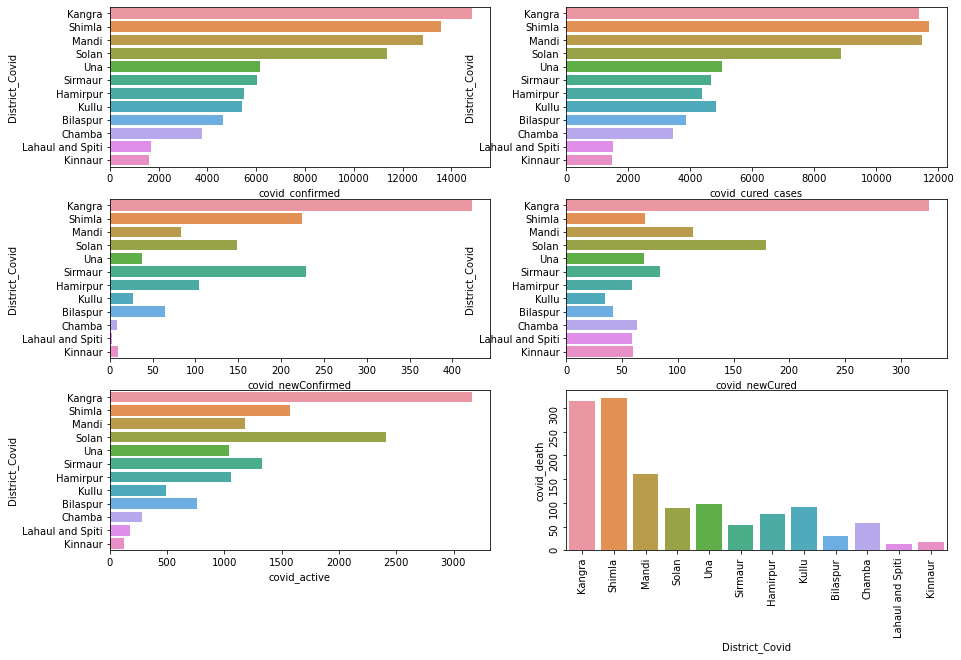

In [80]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Himachal_Pradesh,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Himachal_Pradesh,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Himachal_Pradesh,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Himachal_Pradesh,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Himachal_Pradesh,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Himachal_Pradesh,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Jammu_and_Kashmir Covid19 Data

In [81]:
Jammu_and_Kashmir=df.iloc[238:260]
Jammu_and_Kashmir

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
238  Jammu and Kashmir       Srinagar            38762                 748   
239  Jammu and Kashmir          Jammu            32175                 449   
240  Jammu and Kashmir      Baramulla            11635                 200   
241  Jammu and Kashmir         Budgam             9687                 137   
242  Jammu and Kashmir        Pulwama             6738                  72   
243  Jammu and Kashmir        Kupwara             6533                 114   
244  Jammu and Kashmir       Anantnag             6136                 108   
245  Jammu and Kashmir       Udhampur             5653                  57   
246  Jammu and Kashmir      Ganderbal             5145                  35   
247  Jammu and Kashmir      Bandipora             5118                  24   
248  Jammu and Kashmir        Rajouri             4429                  98   
249  Jammu and Kashmir         Kathua             4159                  50   
250  Jammu and Kashmir         Kulgam             3636                  78   
251  Jammu and Kashmir           Doda             3618                  14   
252  Jammu and Kashmir          Samba             3321                  39   
253  Jammu and Kashmir          Reasi             3088                  49   
254  Jammu and Kashmir       Kishtwar             2860                   5   
255  Jammu and Kashmir       Shopiyan             2847                  17   
256  Jammu and Kashmir          Punch             2795                  37   
257  Jammu and Kashmir         Ramban             2420                  50   
258  Jammu and Kashmir   Muzaffarabad                0                   0   
259  Jammu and Kashmir         Mirpur                0                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
238              32404             379          5850          508   
239              26906             120          4838          431   
240               9852             129          1593          190   
241               8689              71           872          126   
242               6053              19           589           96   
243               5918              10           516           99   
244               5388              24           646          102   
245               5110              28           482           61   
246               4770               0           326           49   
247               4861               0           194           63   
248               3894               6           476           59   
249               3661              30           439           59   
250               2942               7           635           59   
251               3441               4           112           65   
252               2854               0           421           46   
253               2092               0           979           17   
254               2770               0            68           22   
255               2658               0           148           41   
256               2556              11           208           31   
257               2231              28           166           23   
258                  0               0             0            0   
259                  0               0             0            0   

     covid_newDeaths  
238                8  
239               10  
240                0  
241                0  
242                0  
243                0  
244                1  
245                0  
246                0  
247                0  
248                0  
249                1  
250                1  
251                0  
252                0  
253                0  
254                0  
255                0  
256                0  
257                0  
258                0  
259                0

In [82]:
Jammu_and_Kashmir.to_csv("E:\\innomatics\\Jammu_and_Kashmir.csv")

# Data Visualization of Jammu_and_Kashmir

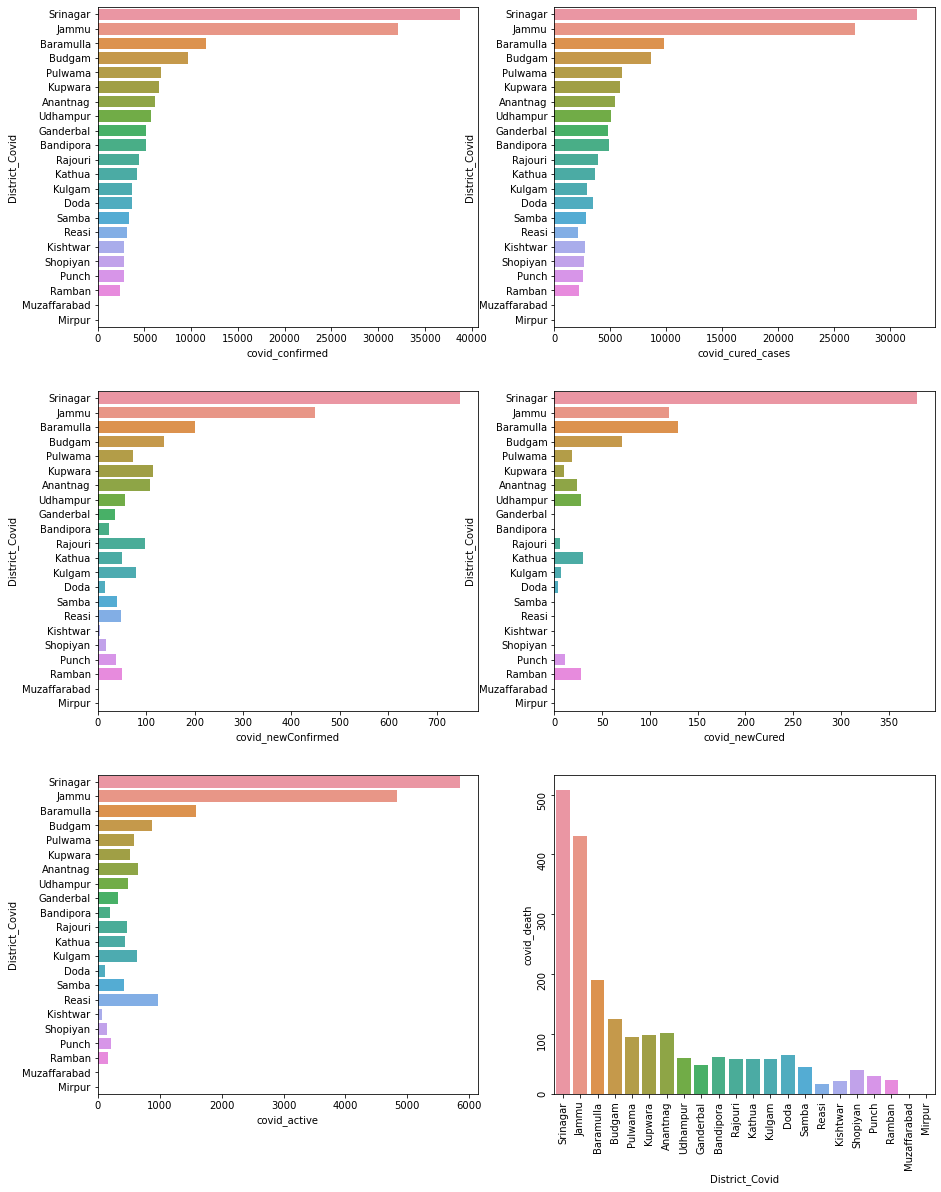

In [83]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Jammu_and_Kashmir,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Jammu_and_Kashmir,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Jammu_and_Kashmir,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Jammu_and_Kashmir,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Jammu_and_Kashmir,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Jammu_and_Kashmir,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Jharkand Covid19 Data

In [84]:
Jharkand=df.iloc[260:284]
Jharkand

Covid_States       District_Covid  covid_confirmed  covid_newConfirmed  \
260     Jharkand               Ranchi            61146                1494   
261     Jharkand       East Singhbhum            29548                 702   
262     Jharkand              Dhanbad            11009                 326   
263     Jharkand               Bokaro            10257                 316   
264     Jharkand           Hazaribagh             8506                 341   
265     Jharkand              Ramgarh             7861                 309   
266     Jharkand              Koderma             7238                 425   
267     Jharkand       West Singhbhum             6666                 134   
268     Jharkand              Deoghar             6313                 244   
269     Jharkand               Palamu             5338                 138   
270     Jharkand  Saraikela-Kharsawan             4603                  40   
271     Jharkand                Gumla             4429                 163   
272     Jharkand              Giridih             4338                 148   
273     Jharkand               Khunti             4108                 203   
274     Jharkand               Garhwa             3838                  75   
275     Jharkand            Sahibganj             3415                  51   
276     Jharkand                Godda             3393                  84   
277     Jharkand              Latehar             3378                  86   
278     Jharkand              Simdega             3371                  69   
279     Jharkand                Dumka             3151                 111   
280     Jharkand            Lohardaga             3026                 165   
281     Jharkand               Chatra             2755                 237   
282     Jharkand              Jamtara             2741                  38   
283     Jharkand                Pakur             1319                   4   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
260              45100             723         15457          589   
261              22546             361          6482          520   
262               9121             142          1702          186   
263               8370             101          1794           93   
264               5421             315          3031           54   
265               5396              60          2399           66   
266               4795             421          2382           61   
267               5640             115           967           59   
268               4980              84          1300           33   
269               4022              75          1277           39   
270               3844              42           741           18   
271               3023              94          1390           16   
272               3887              78           426           25   
273               2947              93          1143           18   
274               3227              33           587           24   
275               2942              65           447           26   
276               2835             120           525           33   
277               2079               0          1279           20   
278               2553              64           795           23   
279               2080              16          1042           29   
280               2103              36           902           21   
281               1732             227          1002           21   
282               1819              22           909           13   
283               1189               0           126            4   

     covid_newDeaths  
260               43  
261               16  
262                4  
263                1  
264                3  
265                5  
266                7  
267                2  
268                1  
269                3  
270                3  
271                1  
272                3  
273  

# Data Visualization of Jharkand


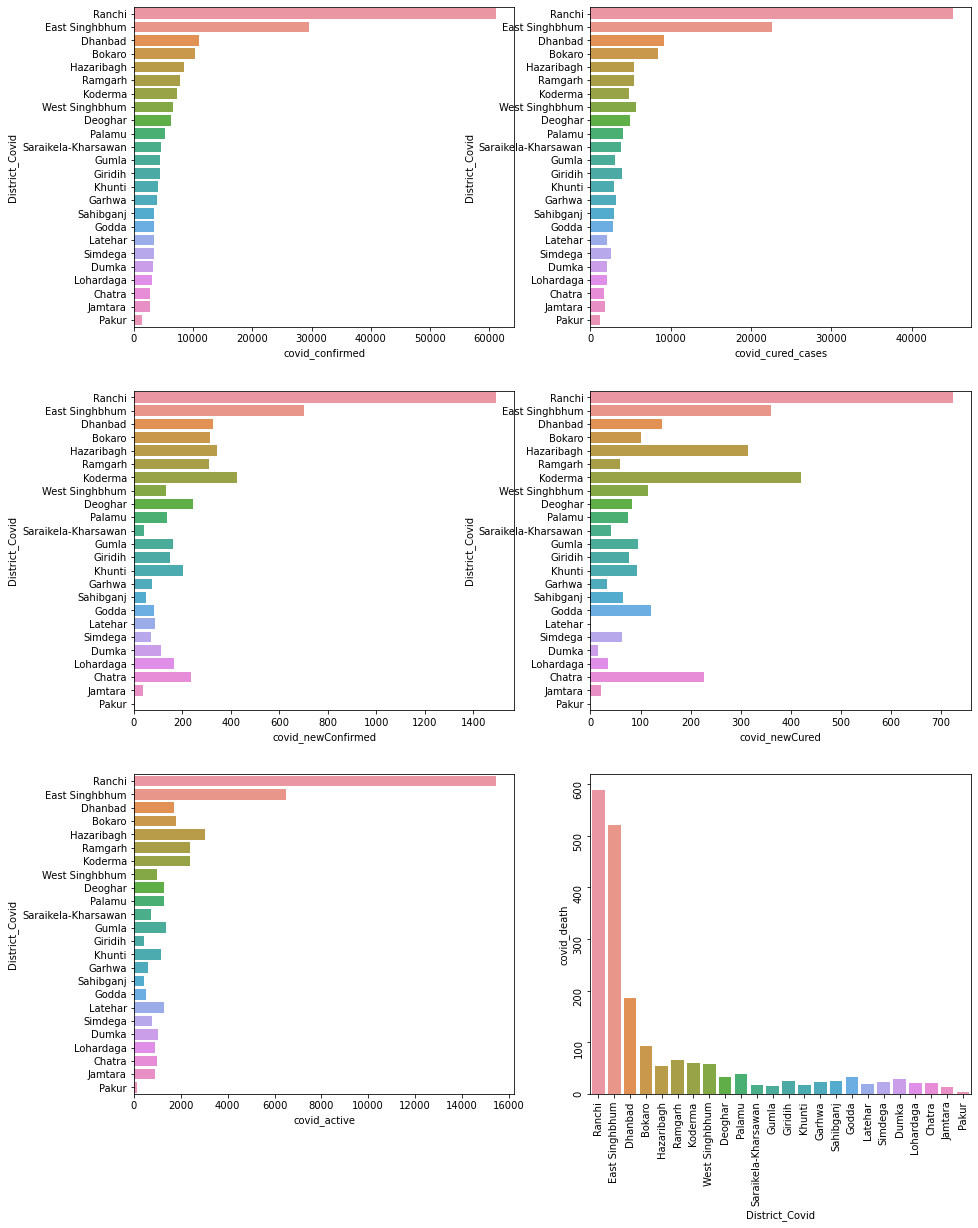

In [85]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Jharkand,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Jharkand,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Jharkand,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Jharkand,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Jharkand,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Jharkand,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Karnataka Covid19 Data

In [86]:
Karnataka=df.iloc[284:315]
Karnataka

Covid_States    District_Covid  covid_confirmed  covid_newConfirmed  \
284    Karnataka   Bengaluru Urban           653656               20733   
285    Karnataka            Mysuru            66692                 700   
286    Karnataka           Ballari            46635                 732   
287    Karnataka  Dakshina Kannada            41284                 564   
288    Karnataka          Tumakuru            39166                1153   
289    Karnataka            Hassan            35708                 768   
290    Karnataka        Kalaburagi            34454                 626   
291    Karnataka          Belagavi            30545                 336   
292    Karnataka             Udupi            28761                 319   
293    Karnataka           Dharwad            27799                 546   
294    Karnataka            Mandya            25767                 814   
295    Karnataka   Bengaluru Rural            25720                 864   
296    Karnataka        Shivamogga            25629                 418   
297    Karnataka        Davanagere            24855                 242   
298    Karnataka        Vijayapura            19357                 468   
299    Karnataka           Raichur            18133                 643   
300    Karnataka   Chikkaballapura            17735                 434   
301    Karnataka    Uttara Kannada            17338                 243   
302    Karnataka       Chitradurga            16631                 100   
303    Karnataka    Chikkamagaluru            16311                 247   
304    Karnataka             Bidar            15905                 406   
305    Karnataka            Koppal            15839                 152   
306    Karnataka         Bagalkote            15715                 390   
307    Karnataka             Kolar            15007                 782   
308    Karnataka            Yadgir            12733                 363   
309    Karnataka             Gadag            12103                  76   
310    Karnataka            Haveri            11823                  99   
311    Karnataka        Ramanagara             9650                 225   
312    Karnataka   Chamarajanagara             9373                 284   
313    Karnataka            Kodagu             8841                1077   
314    Karnataka       Other State               36                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
284             467313            2285        180542         5800   
285              60499             573          5040         1153   
286              40443             227          5536          656   
287              36561             165          3975          746   
288              29737             347          8988          441   
289              30718             149          4537          453   
290              26935             252          7087          432   
291              28117             125          2069          359   
292              27001             245          1566          194   
293              24311             275          2811          677   
294              22002             408          3581          184   
295              20829             149          4682          209   
296              23125              62          2141          363   
297              23046              96          1542          267   
298              16206             199          2926          225   
299              14899              50          3071          163   
300              14922             113          2681          131   
301              15938              70          1205          195   
302              15699              49           861           71   
303              14660              72          1506          145   
304              12322             268          3353          226   
305              14329              98          1228          282   
306             

# Data Visualization of Karnataka

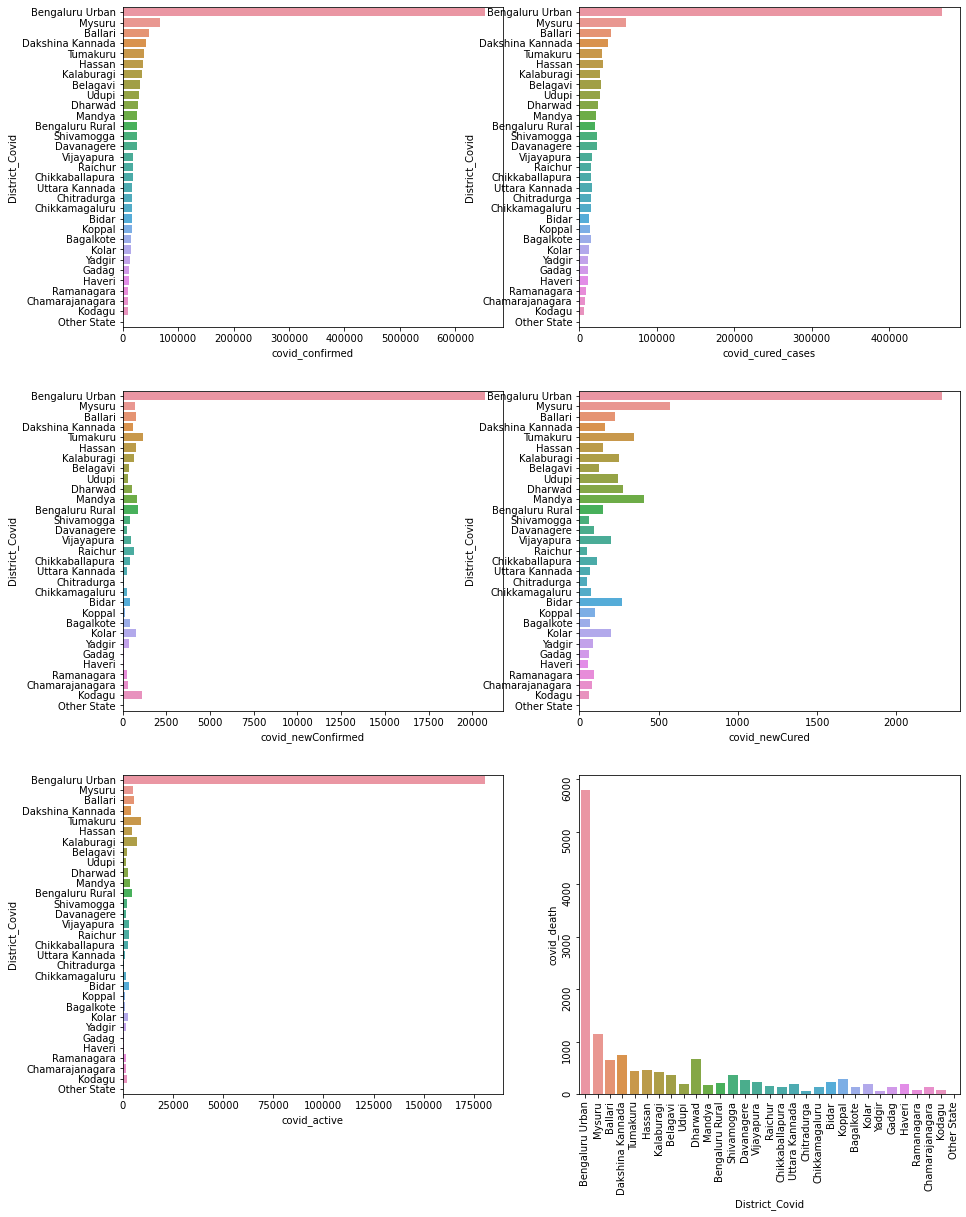

In [87]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Karnataka,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Karnataka,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Karnataka,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Karnataka,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Karnataka,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Karnataka,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Kerala Covid19 Data


In [88]:
Kerala=df.iloc[315:330]
Kerala

Covid_States      District_Covid  covid_confirmed  covid_newConfirmed  \
315       Kerala           Ernakulam           172612                4468   
316       Kerala           Kozhikode           166637                3998   
317       Kerala          Malappuram           150409                3123   
318       Kerala            Thrissur           130127                2871   
319       Kerala  Thiruvananthapuram           129802                2020   
320       Kerala            Kottayam           107773                2666   
321       Kerala              Kollam           104966                1209   
322       Kerala           Alappuzha            96721                1302   
323       Kerala              Kannur            80615                1843   
324       Kerala            Palakkad            77150                1820   
325       Kerala      Pathanamthitta            70642                 871   
326       Kerala           Kasaragod            42905                 771   
327       Kerala              Idukki            38890                 848   
328       Kerala             Wayanad            36407                 659   
329       Kerala         Other State                0                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
315             136306            1002         35782          492   
316             138365            1099         27655          586   
317             128449             754         21462          477   
318             110070             769         19489          550   
319             114032             861         14728          949   
320              89553             538         17954          255   
321              97783             674          6790          369   
322              86391             675          9857          447   
323              63287             356         16915          378   
324              62986             375         13961          191   
325              61542             303          8951          141   
326              33700             270          9073          123   
327              29663             247          9169           52   
328              29197             199          7103          101   
329                  0               0             0            0   

     covid_newDeaths  
315                1  
316                4  
317                4  
318                5  
319                6  
320                3  
321                2  
322                4  
323                0  
324                0  
325                1  
326                0  
327                0  
328                0  
329                0

# Data Visualization of Kerala

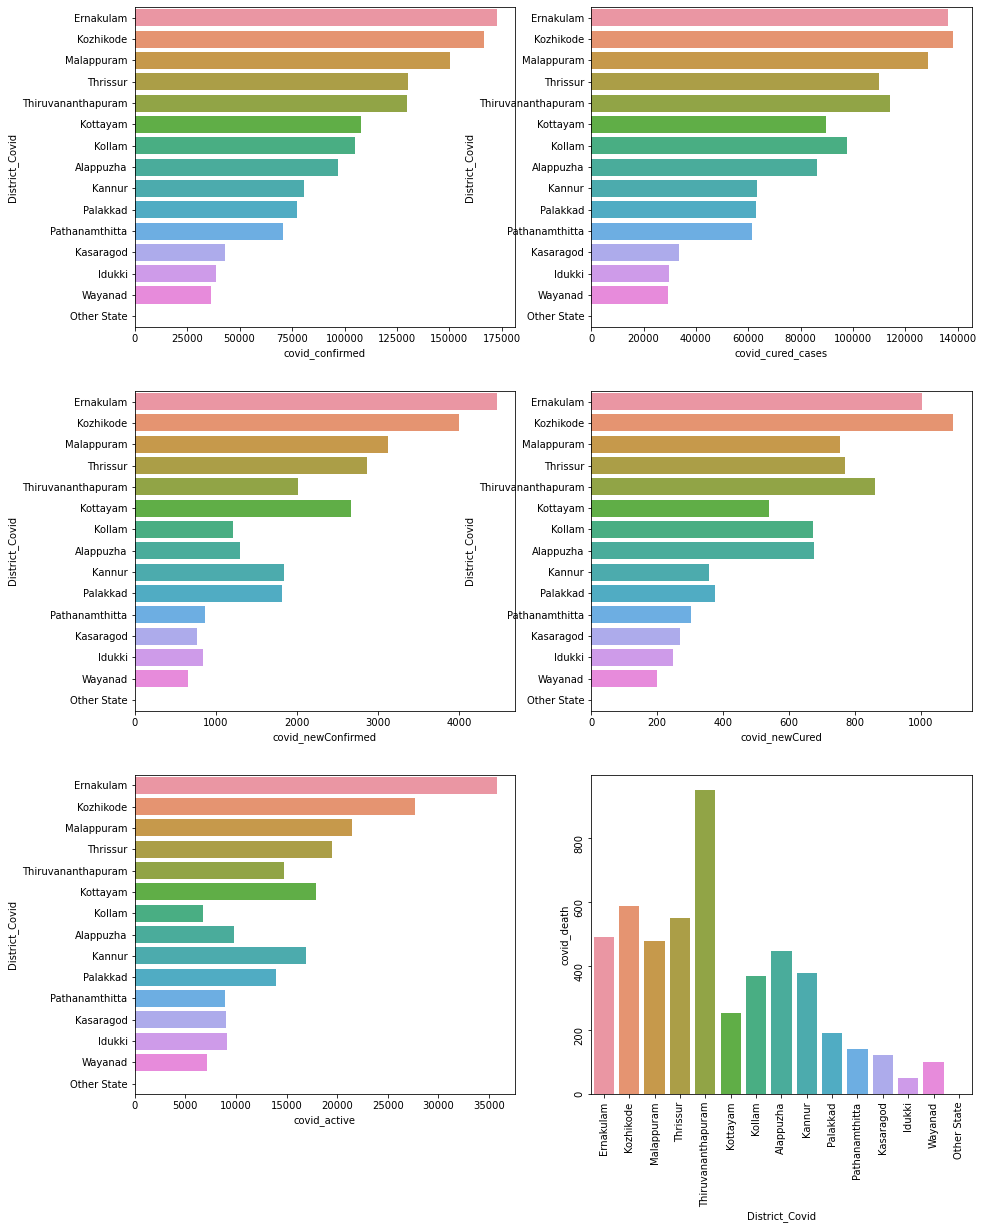

In [89]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Kerala,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Kerala,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Kerala,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Kerala,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Kerala,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Kerala,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Ladakh Covid19 Data

In [90]:
Ladakh=df.iloc[330:332]
Ladakh

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
330       Ladakh            Leh            10922                   0   
331       Ladakh         Kargil             2315                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
330               8963               0          1867           92   
331               2166               0           105           44   

     covid_newDeaths  
330                0  
331                0

# Data visualization of Ladakh

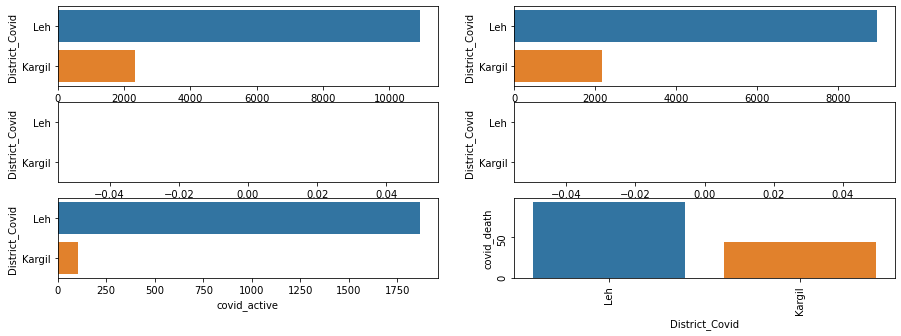

In [91]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Ladakh,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Ladakh,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Ladakh,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Ladakh,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Ladakh,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Ladakh,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Lakshadweep Covid19 Data

In [92]:
Lakshadweep=df.iloc[332:333]
Lakshadweep

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
332  Lakshadweep    Lakshadweep             2126                 164   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
332                941              29          1178            1   

     covid_newDeaths  
332                0

# MadyaPradesh Covid19 Data 

In [93]:
MadyaPradesh=df.iloc[333:386]
MadyaPradesh

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
333  MadyaPradesh         Indore           101751                1826   
334  MadyaPradesh         Bhopal            80736                1802   
335  MadyaPradesh        Gwalior            33052                1220   
336  MadyaPradesh       Jabalpur            32333                 820   
337  MadyaPradesh         Ujjain            11112                 304   
338  MadyaPradesh          Sagar            10147                 413   
339  MadyaPradesh       Khargone             9760                 235   
340  MadyaPradesh         Ratlam             9513                 260   
341  MadyaPradesh           Rewa             8724                 342   
342  MadyaPradesh          Betul             8259                 199   
343  MadyaPradesh        Vidisha             7853                 247   
344  MadyaPradesh           Dhar             7485                 249   
345  MadyaPradesh          Satna             6992                 252   
346  MadyaPradesh    Narsinghpur             6789                 195   
347  MadyaPradesh    Hoshangabad             6641                 176   
348  MadyaPradesh        Barwani             6538                 195   
349  MadyaPradesh       Shivpuri             6501                 239   
350  MadyaPradesh          Katni             6214                 172   
351  MadyaPradesh        Shahdol             6023                 183   
352  MadyaPradesh       Balaghat             5895                  86   
353  MadyaPradesh         Sehore             5686                 230   
354  MadyaPradesh         Jhabua             5651                  84   
355  MadyaPradesh     Chhindwara             5487                  58   
356  MadyaPradesh         Raisen             5444                 165   
357  MadyaPradesh        Rajgarh             5441                 120   
358  MadyaPradesh         Morena             5330                 203   
359  MadyaPradesh        Neemuch             5216                 142   
360  MadyaPradesh       Mandsaur             5102                 135   
361  MadyaPradesh          Dewas             4909                  98   
362  MadyaPradesh     Chhatarpur             4855                 367   
363  MadyaPradesh          Damoh             4790                 145   
364  MadyaPradesh       Shajapur             4705                  91   
365  MadyaPradesh        Anuppur             4584                 172   
366  MadyaPradesh      Singrauli             4567                 247   
367  MadyaPradesh          Sidhi             4457                 336   
368  MadyaPradesh          Seoni             4389                 146   
369  MadyaPradesh      Tikamgarh             3966                 192   
370  MadyaPradesh          Datia             3898                 175   
371  MadyaPradesh          Panna             3633                 195   
372  MadyaPradesh           Guna             3531                  67   
373  MadyaPradesh        Khandwa             3476                  29   
374  MadyaPradesh         Umaria             3398                  80   
375  MadyaPradesh          Harda             3347                  63   
376  MadyaPradesh         Mandla             3226                 186   
377  MadyaPradesh      Alirajpur             2653                  43   
378  MadyaPradesh        Dindori             2511                  59   
379  MadyaPradesh     Ashoknagar             2434                  97   
380  MadyaPradesh        Sheopur             2362                  28   
381  MadyaPradesh          Bhind             2084                  44   
382  MadyaPradesh      Burhanpur             2036                  28   
383  MadyaPradesh     Agar Malwa             1963                  43   
384  MadyaPradesh         Niwari             1855                 118   
385  MadyaPradesh   Other Region                0                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_de

# Data Visualization of MadyaPradesh

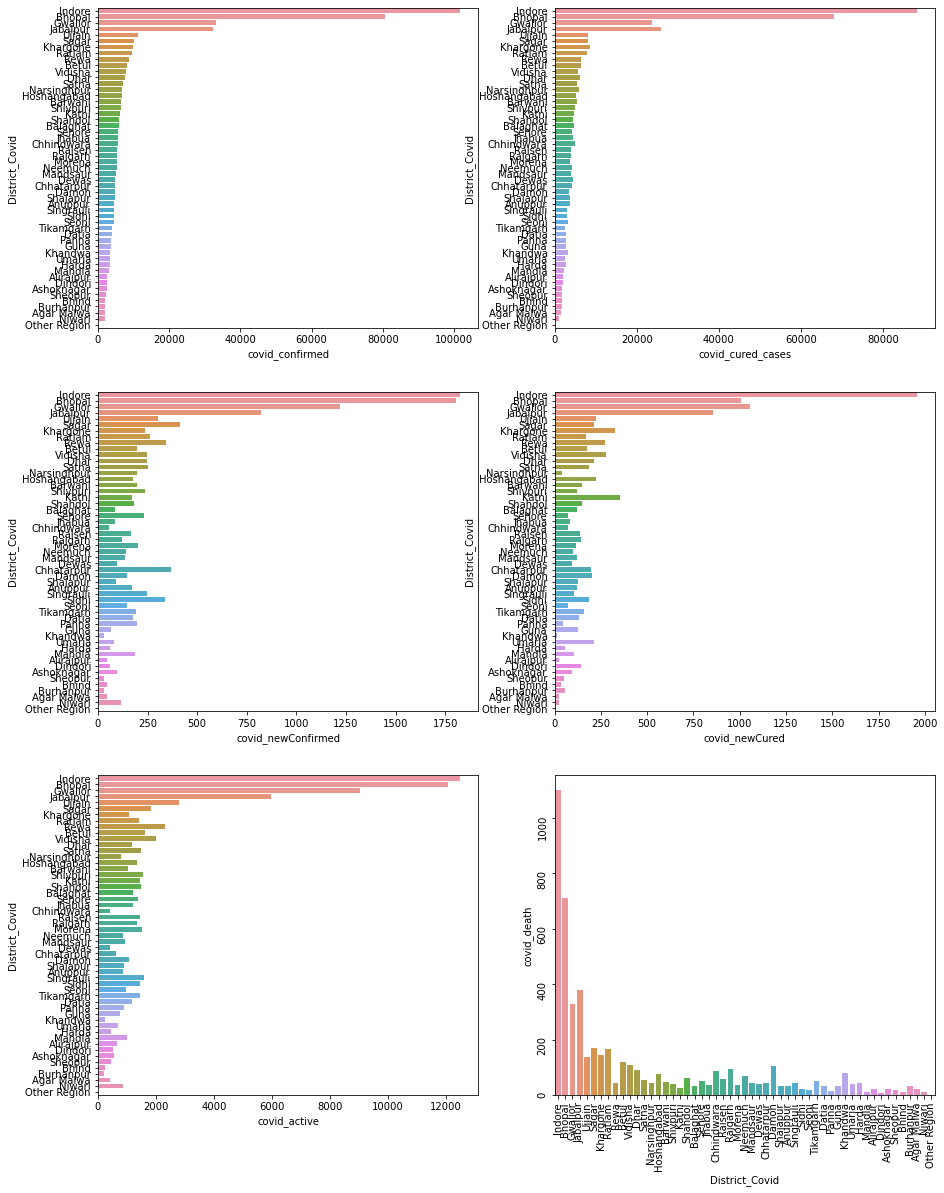

In [94]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=MadyaPradesh,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=MadyaPradesh,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=MadyaPradesh,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=MadyaPradesh,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=MadyaPradesh,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=MadyaPradesh,ax=ax6)
plt.xticks(rotation=90)

plt.show()

In [95]:
Maharastra=df.iloc[386:423]
Maharastra

Covid_States   District_Covid  covid_confirmed  covid_newConfirmed  \
386   Maharastra             Pune           796645               10174   
387   Maharastra           Mumbai           627644                5498   
388   Maharastra            Thane           492308                5521   
389   Maharastra           Nagpur           385448                7948   
390   Maharastra           Nashik           282066                4808   
391   Maharastra       Ahmednagar           156100                3275   
392   Maharastra       Aurangabad           118295                1853   
393   Maharastra           Raigad           114415                1712   
394   Maharastra          Jalgaon           113497                 860   
395   Maharastra          Solapur            96490                1975   
396   Maharastra           Satara            93266                1879   
397   Maharastra          Palghar            81532                1565   
398   Maharastra           Nanded            77283                1091   
399   Maharastra           Sangli            72543                1216   
400   Maharastra            Latur            65807                1467   
401   Maharastra         Kolhapur            61484                 949   
402   Maharastra         Amravati            60679                 705   
403   Maharastra       Chandrapur            54252                1823   
404   Maharastra             Beed            48193                1254   
405   Maharastra         Bhandara            45425                1364   
406   Maharastra         Yavatmal            43883                1539   
407   Maharastra            Jalna            40499                 688   
408   Maharastra         Buldhana            40249                 392   
409   Maharastra            Akola            38468                 409   
410   Maharastra           Wardha            37870                 960   
411   Maharastra            Dhule            36266                 279   
412   Maharastra        Osmanabad            35356                 832   
413   Maharastra         Parbhani            31580                 844   
414   Maharastra        Nandurbar            31308                 715   
415   Maharastra           Gondia            29880                 627   
416   Maharastra           Washim            25213                 369   
417   Maharastra        Ratnagiri            19664                 648   
418   Maharastra       Gadchiroli            17306                 467   
419   Maharastra          Hingoli            12405                 251   
420   Maharastra       Sindhudurg            11562                 234   
421   Maharastra      Other State              146                   0   
422   Maharastra  Mumbai Suburban                0                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
386             680067           10833        107503         9020   
387             537944            8127         75498        12790   
388             405750            6080         79888         6639   
389             299947            7342         80624         4831   
390             236302            4234         42898         2865   
391             131998            5257         22317         1784   
392             100339             660         16324         1618   
393              97944            1966         14491         1978   
394              98131             833         13499         1839   
395              78652            1464         15451         2328   
396              73625             299         17493         2139   
397              63193             305         17111         1218   
398              64242             924         11542         1491   
399              59384             692         11178         1979   
400              44321             196         20468         1014   
401              53407             430          6321         1753   
402              5

In [96]:
Maharastra.to_csv("E:\\innomatics\\Maharastra.csv")

# Maharastra Covid19 Data

# Data visualization of Maharastra

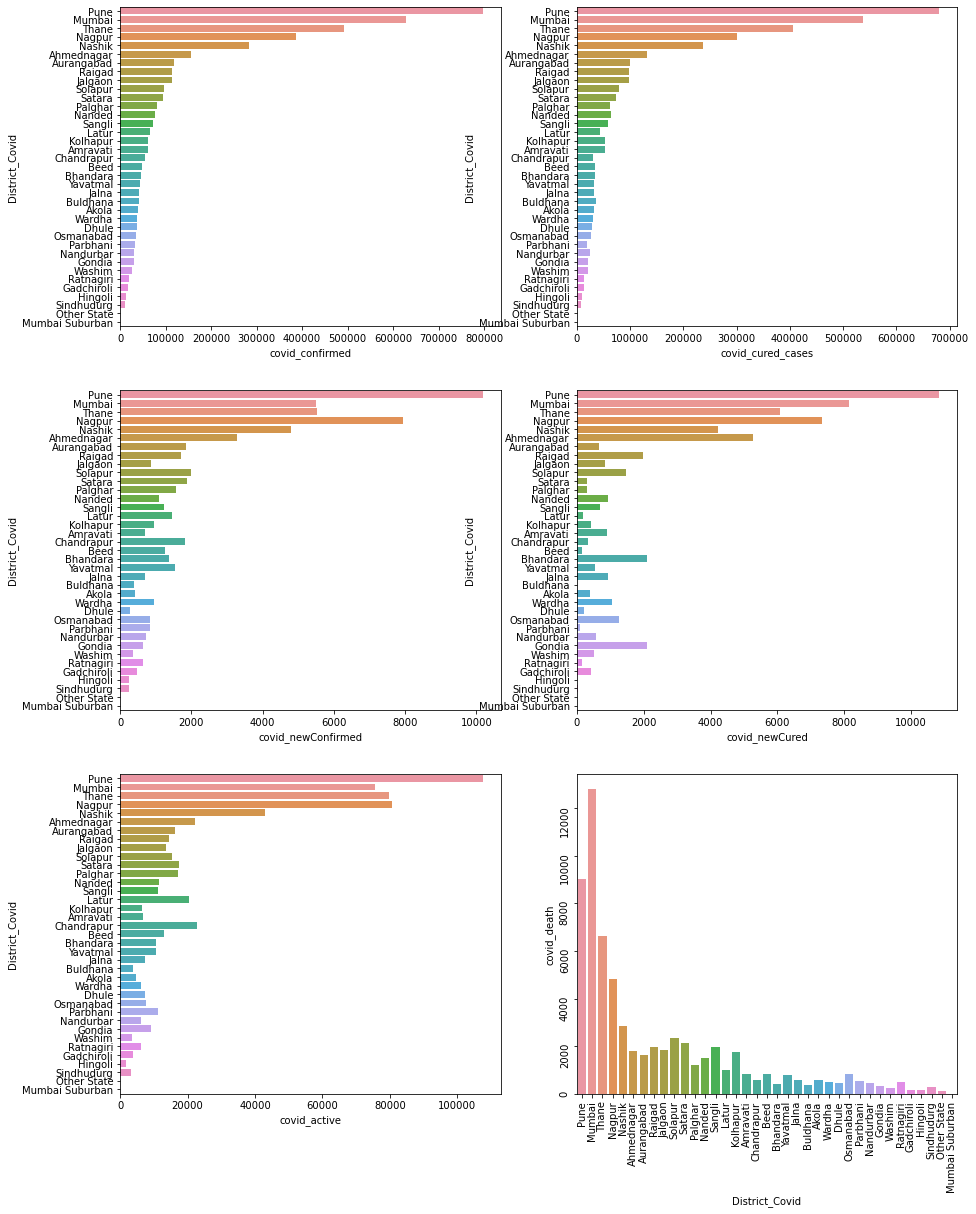

In [97]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Maharastra,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Maharastra,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Maharastra,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Maharastra,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Maharastra,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Maharastra,ax=ax6)
plt.xticks(rotation=90)

plt.show()

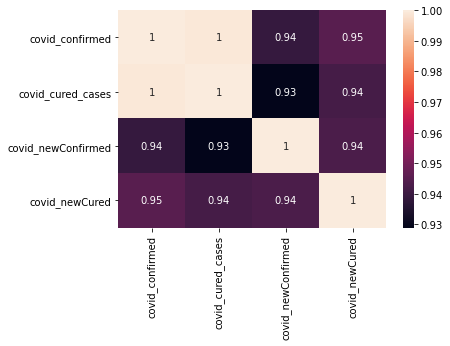

In [98]:
sns.heatmap(Maharastra[['covid_confirmed','covid_cured_cases',"covid_newConfirmed","covid_newCured"]].corr(), annot=True)
plt.show()

# Manipur Covid19 Data

In [99]:
Manipur=df.iloc[423:441]
Manipur

Covid_States  District_Covid  covid_confirmed  covid_newConfirmed  \
423      Manipur     Imphal West             9317                  59   
424      Manipur     Imphal East             5947                  44   
425      Manipur  CAPF Personnel             2743                   8   
426      Manipur         Thoubal             2388                   4   
427      Manipur   Churachandpur             1579                   5   
428      Manipur         Unknown             1416                   0   
429      Manipur       Bishnupur             1406                   8   
430      Manipur      Tamenglong             1402                   0   
431      Manipur        Kakching              893                   1   
432      Manipur       Kangpokpi              641                   1   
433      Manipur          Ukhrul              558                   5   
434      Manipur        Senapati              531                   3   
435      Manipur         Chandel              403                   1   
436      Manipur           Noney              336                   0   
437      Manipur      Tengnoupal              296                   1   
438      Manipur         Jiribam              274                   0   
439      Manipur         Kamjong              254                   0   
440      Manipur        Pherzawl               37                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
423                 52               0          9159          106   
424                150               0          5718           79   
425               1421               3          1320            2   
426                 23               0          2324           41   
427                 58               0          1492           29   
428               1416               0             0           64   
429                 58               0          1323           25   
430                 32               0          1364            6   
431                 27               0           858            8   
432                 19               0           612           10   
433                 18               0           537            3   
434                 21               0           509            1   
435                  4               0           390            9   
436                 18               0           317            1   
437                 13               0           282            1   
438                  2               0           272            0   
439                 17               0           237            0   
440                 15               0            22            0   

     covid_newDeaths  
423                2  
424                0  
425                0  
426                0  
427                0  
428                0  
429                0  
430                0  
431                0  
432                0  
433                0  
434                0  
435                0  
436                0  
437                0  
438                0  
439                0  
440                0

# Data Visualization of Manipur

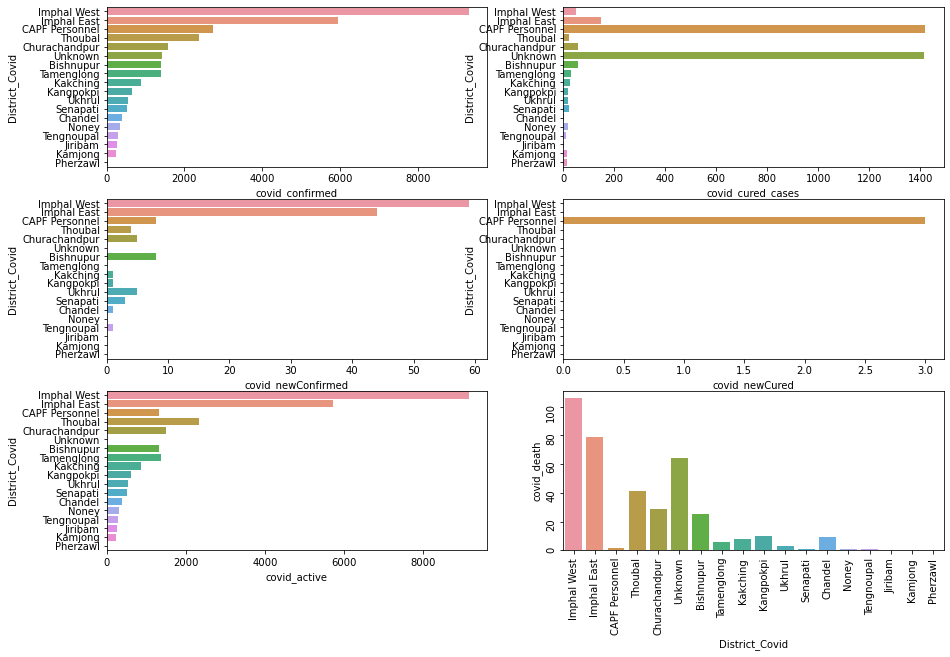

In [100]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Manipur,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Manipur,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Manipur,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Manipur,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Manipur,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Manipur,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Meghalaya Covid19 Data

In [101]:
Meghalaya=df.iloc[441:452]
Meghalaya

Covid_States          District_Covid  covid_confirmed  covid_newConfirmed  \
441    Meghalaya        East Khasi Hills            10184                 161   
442    Meghalaya         West Garo Hills             1779                   4   
443    Meghalaya                  Ribhoi             1552                  13   
444    Meghalaya      West Jaintia Hills              716                   9   
445    Meghalaya      East Jaintia Hills              614                  14   
446    Meghalaya         East Garo Hills              344                   4   
447    Meghalaya        West Khasi Hills              212                   0   
448    Meghalaya   South West Garo Hills              201                   0   
449    Meghalaya        South Garo Hills              199                   0   
450    Meghalaya        North Garo Hills              121                   0   
451    Meghalaya  South West Khasi Hills               72                   3   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
441               9042              46          1008          134   
442               1730               1            32           17   
443               1419               6           131            2   
444                593               2           122            1   
445                566               5            48            0   
446                338               0             5            1   
447                185               0            26            1   
448                198               0             1            2   
449                198               0             1            0   
450                118               0             1            2   
451                 59               2            13            0   

     covid_newDeaths  
441                2  
442                0  
443                0  
444                0  
445                0  
446                0  
447                0  
448                0  
449                0  
450                0  
451                0

# Data Visualization of Meghalaya

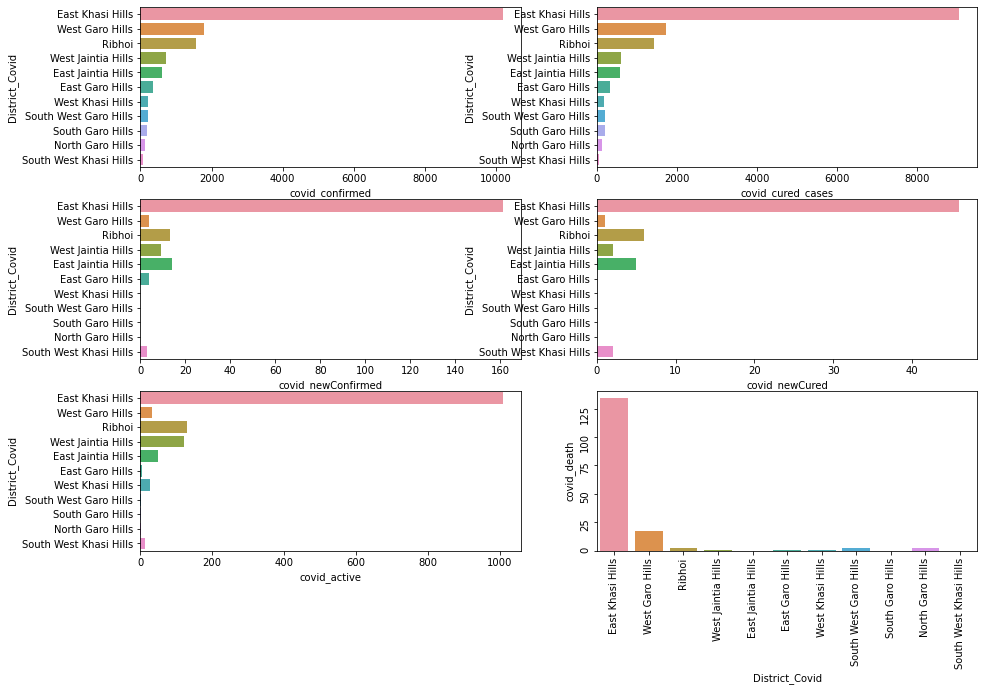

In [102]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Meghalaya,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Meghalaya,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Meghalaya,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Meghalaya,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Meghalaya,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Meghalaya,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Mizoram Covid19 Data

In [103]:
Mizoram=df.iloc[452:463]
Mizoram

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
452      Mizoram         Aizawl             3653                  99   
453      Mizoram        Lunglei              456                   0   
454      Mizoram      Lawngtlai              412                   2   
455      Mizoram        Kolasib              337                   4   
456      Mizoram       Serchhip              199                   0   
457      Mizoram       Champhai              117                   0   
458      Mizoram          Mamit               92                   0   
459      Mizoram          Saiha               41                   0   
460      Mizoram        Saitual               35                   0   
461      Mizoram      Hnahthial               23                   0   
462      Mizoram       Khawzawl               23                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
452               3087              28           554           12   
453                422               0            34            0   
454                345               0            67            0   
455                316               1            21            0   
456                185               4            13            1   
457                110               1             7            0   
458                 88               0             4            0   
459                 39               0             2            0   
460                 33               0             2            0   
461                 23               0             0            0   
462                 23               0             0            0   

     covid_newDeaths  
452                1  
453                0  
454                0  
455                0  
456                0  
457                0  
458                0  
459                0  
460                0  
461                0  
462                0

In [104]:
Mizoram.to_csv("E:\\innomatics\\Mizoram.csv")

# Data visualization of Mizoram

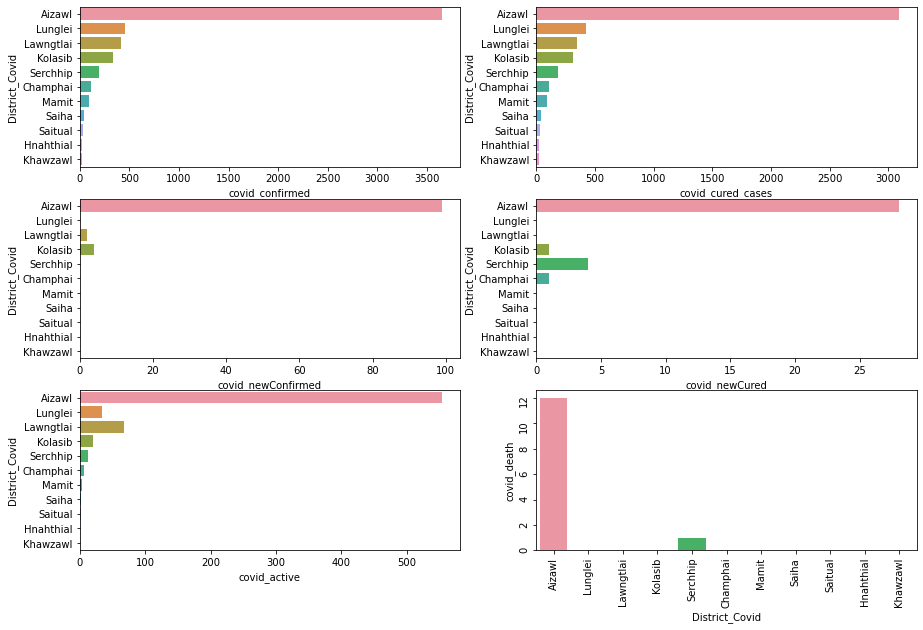

In [105]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Mizoram,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Mizoram,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Mizoram,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Mizoram,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Mizoram,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Mizoram,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Nagaland Covid19 Data

In [106]:
Nagaland=df.iloc[463:476]
Nagaland

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
463     Nagaland        Dimapur             6966                   0   
464     Nagaland         Kohima             4155                   0   
465     Nagaland            Mon              605                   0   
466     Nagaland          Peren              508                   0   
467     Nagaland       Tuensang              252                   0   
468     Nagaland     Mokokchung              210                   0   
469     Nagaland        Unknown              180                   0   
470     Nagaland      Zunheboto              142                   0   
471     Nagaland           Phek               61                   0   
472     Nagaland        Kiphire               41                   0   
473     Nagaland          Wokha               40                   0   
474     Nagaland       Longleng               23                   0   
475     Nagaland         Others                0                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
463               6351               0           362           67   
464               3959               0           122           21   
465                594               0             0            2   
466                506               0             1            0   
467                248               0             1            2   
468                184               0            12            4   
469                 15               0           165            0   
470                139               0             0            0   
471                 51               0            10            0   
472                 40               0             0            1   
473                 35               0             2            1   
474                 10               0             4            0   
475                  0               0             0            0   

     covid_newDeaths  
463                3  
464                0  
465                0  
466                0  
467                0  
468                0  
469                0  
470                0  
471                0  
472                0  
473                0  
474                0  
475                0

# Data Visualization of Nagaland

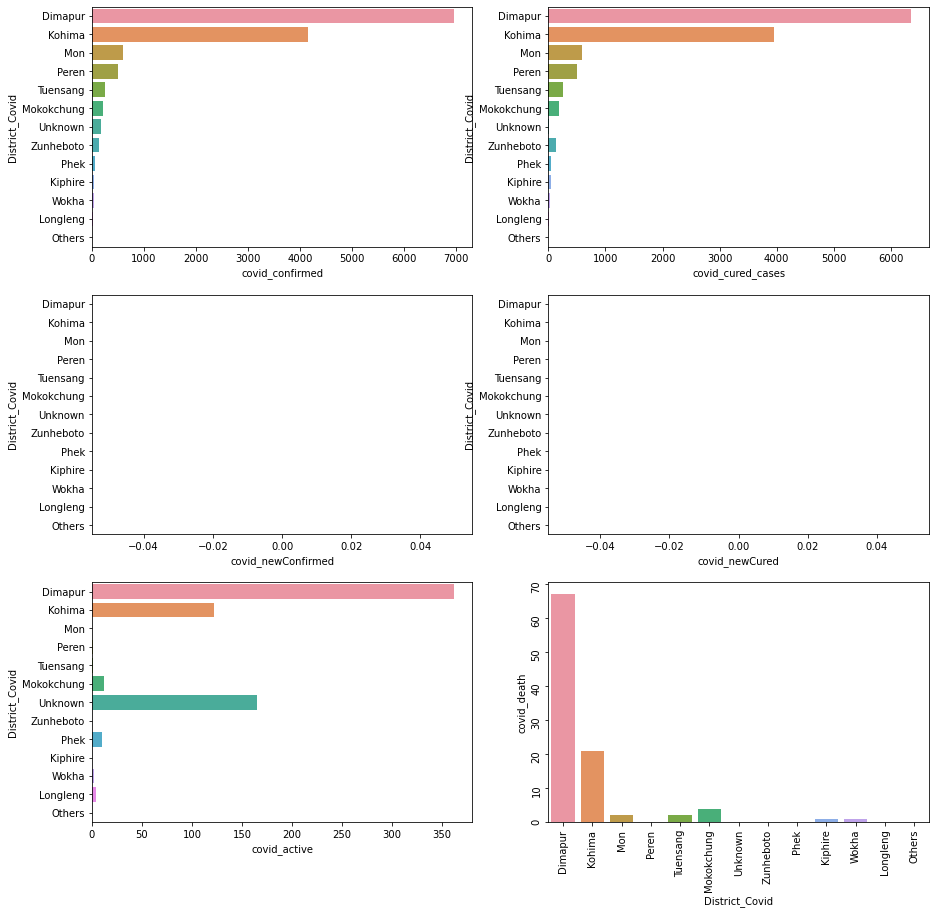

In [107]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Nagaland,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Nagaland,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Nagaland,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Nagaland,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Nagaland,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Nagaland,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Odisha Covid19 Data

In [108]:
Odisha=df.iloc[476:508]
Odisha

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
476       Odisha        Khordha            64186                 875   
477       Odisha        Cuttack            33044                 343   
478       Odisha     Sundargarh            25312                 785   
479       Odisha         Ganjam            23308                 134   
480       Odisha           Puri            17330                 180   
481       Odisha     Mayurbhanj            15893                 158   
482       Odisha        Bargarh            14024                 262   
483       Odisha         Jajpur            13894                 324   
484       Odisha       Balasore            13883                 102   
485       Odisha        Nuapada            13385                 430   
486       Odisha      Sambalpur            13269                 280   
487       Odisha          Angul            13054                 151   
488       Odisha       Balangir            11483                 189   
489       Odisha     Jharsuguda            10871                 254   
490       Odisha     State Pool            10776                 179   
491       Odisha      Kalahandi            10313                 321   
492       Odisha  Jagatsinghpur             9785                  73   
493       Odisha      Kendujhar             9745                 118   
494       Odisha     Kendrapara             9646                  46   
495       Odisha       Rayagada             9507                 104   
496       Odisha        Koraput             8471                  71   
497       Odisha        Bhadrak             8394                  87   
498       Odisha   Nabarangapur             8182                 318   
499       Odisha       Nayagarh             7262                  99   
500       Odisha      Kandhamal             6280                  36   
501       Odisha      Dhenkanal             5992                   8   
502       Odisha     Malkangiri             5405                  32   
503       Odisha     Subarnapur             5216                   8   
504       Odisha       Gajapati             4687                  78   
505       Odisha          Boudh             3069                  32   
506       Odisha        Deogarh             1791                  39   
507       Odisha         Others                0                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
476              56404             541          7428          354   
477              30387             152          2509          148   
478              19672             526          5455          185   
479              22318              58           726          264   
480              15259             128          1948          123   
481              14886              69           913           94   
482              11863             140          2117           44   
483              12832              41          1035           27   
484              12992              84           788          103   
485              11106             340          2244           35   
486              11302             153          1887           80   
487              12078              49           939           37   
488               9770              87          1664           49   
489               8953             238          1890           28   
490               9192             118          1584            0   
491               7559              54          2715           39   
492               9316              30           431           38   
493               9010             199           694           41   
494               9247              22           369           30   
495               8845              62           612           50   
496               8056              24           399           16   
497               7813              53           550           31   
498               6595              97  

# Data Visualization of Odisha

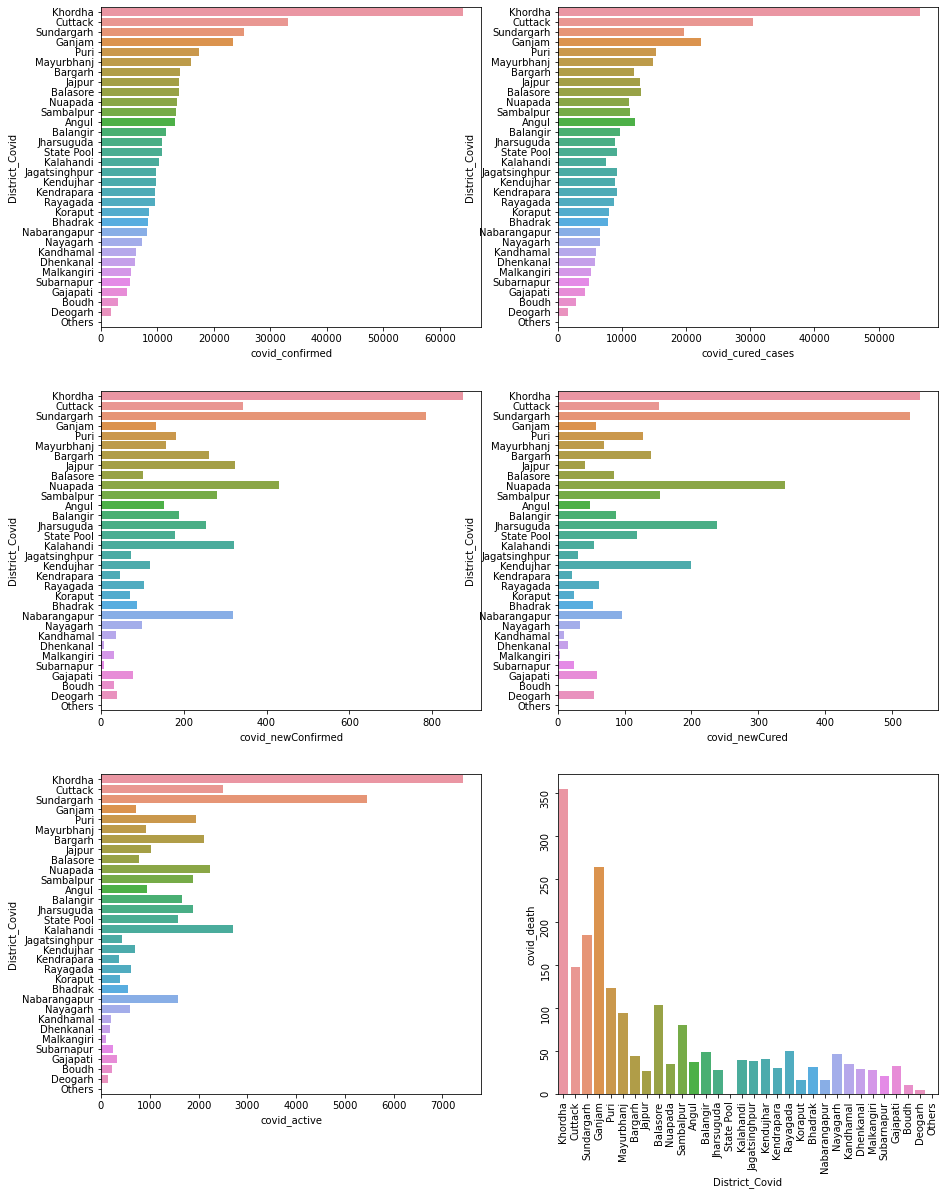

In [109]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Odisha,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Odisha,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Odisha,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Odisha,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Odisha,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Odisha,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Puducherry Covid19 Data

In [110]:
Puducherry=df.iloc[508:512]
Puducherry

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
508   Puducherry     Puducherry            41504                 815   
509   Puducherry       Karaikal             6241                 101   
510   Puducherry           Mahe             2828                  52   
511   Puducherry          Yanam             2706                  40   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
508              35113             331          5794          597   
509               5308              43           845           88   
510               2529              58           284           15   
511               2293              44           365           48   

     covid_newDeaths  
508               10  
509                0  
510                0  
511                1

# Data Visualization of Puducherry

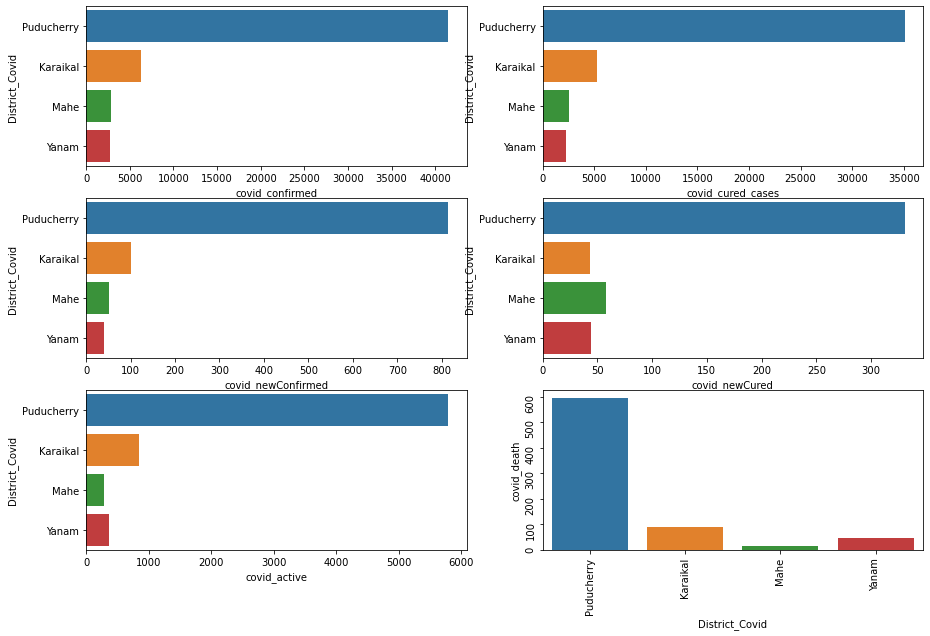

In [111]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Puducherry,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Puducherry,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Puducherry,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Puducherry,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Puducherry,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Puducherry,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Punjab Covid19 Data

In [112]:
Punjab=df.iloc[512:534]
Punjab

Covid_States             District_Covid  covid_confirmed  \
512       Punjab                   Ludhiana            49603   
513       Punjab               S.A.S. Nagar            41862   
514       Punjab                  Jalandhar            40057   
515       Punjab                    Patiala            30493   
516       Punjab                   Amritsar            30165   
517       Punjab                 Hoshiarpur            19217   
518       Punjab                   Bathinda            17926   
519       Punjab                  Gurdaspur            14672   
520       Punjab                 Kapurthala            11726   
521       Punjab                  Pathankot             8979   
522       Punjab  Shahid Bhagat Singh Nagar             8466   
523       Punjab                    Sangrur             7739   
524       Punjab                   Rupnagar             7565   
525       Punjab                  Ferozepur             7045   
526       Punjab                   Faridkot             6906   
527       Punjab          Sri Muktsar Sahib             6704   
528       Punjab                    Fazilka             6493   
529       Punjab                 Tarn Taran             5200   
530       Punjab                      Mansa             5126   
531       Punjab                       Moga             4935   
532       Punjab            Fatehgarh Sahib             4771   
533       Punjab                    Barnala             3440   

     covid_newConfirmed  covid_cured_cases  covid_newCured  covid_active  \
512                1389              41187             883          7117   
513                 893              33319             932          7998   
514                 648              35085             403          3924   
515                 477              26715             849          3057   
516                 569              24196             357          5084   
517                 229              16816             281          1704   
518                 464              13897             317          3715   
519                 301              12579             329          1630   
520                 202              10480             166           921   
521                 164               7575             135          1203   
522                  69               7760              28           479   
523                 133               6273              71          1173   
524                  76               6237              60          1076   
525                  87               5863               6           982   
526                 122               5705              66          1087   
527                 300               5086              57          1492   
528                 241               5060             128          1319   
529                  84               4076             118           922   
530                 250               3618              71          1444   
531                  95               3797               0          1021   
532                  60               4251              24           385   
533                 127               2929              34           421   

     covid_death  covid_newDeaths  
512         1299                9  
513          545                5  
514         1048                3  
515          721               14  
516          885                9  
517          697                6  
518          314                4  
519          463                5  
520          325                2  
521          201                2  
522          227                0  
523          293                1  
524          252                3  
525          200                1  
526          114                2  
527          126                0  
528          114                4  
529          202                2  
530           64                2  
531          117                0  
532          135          

# Data Visualization of Punjab

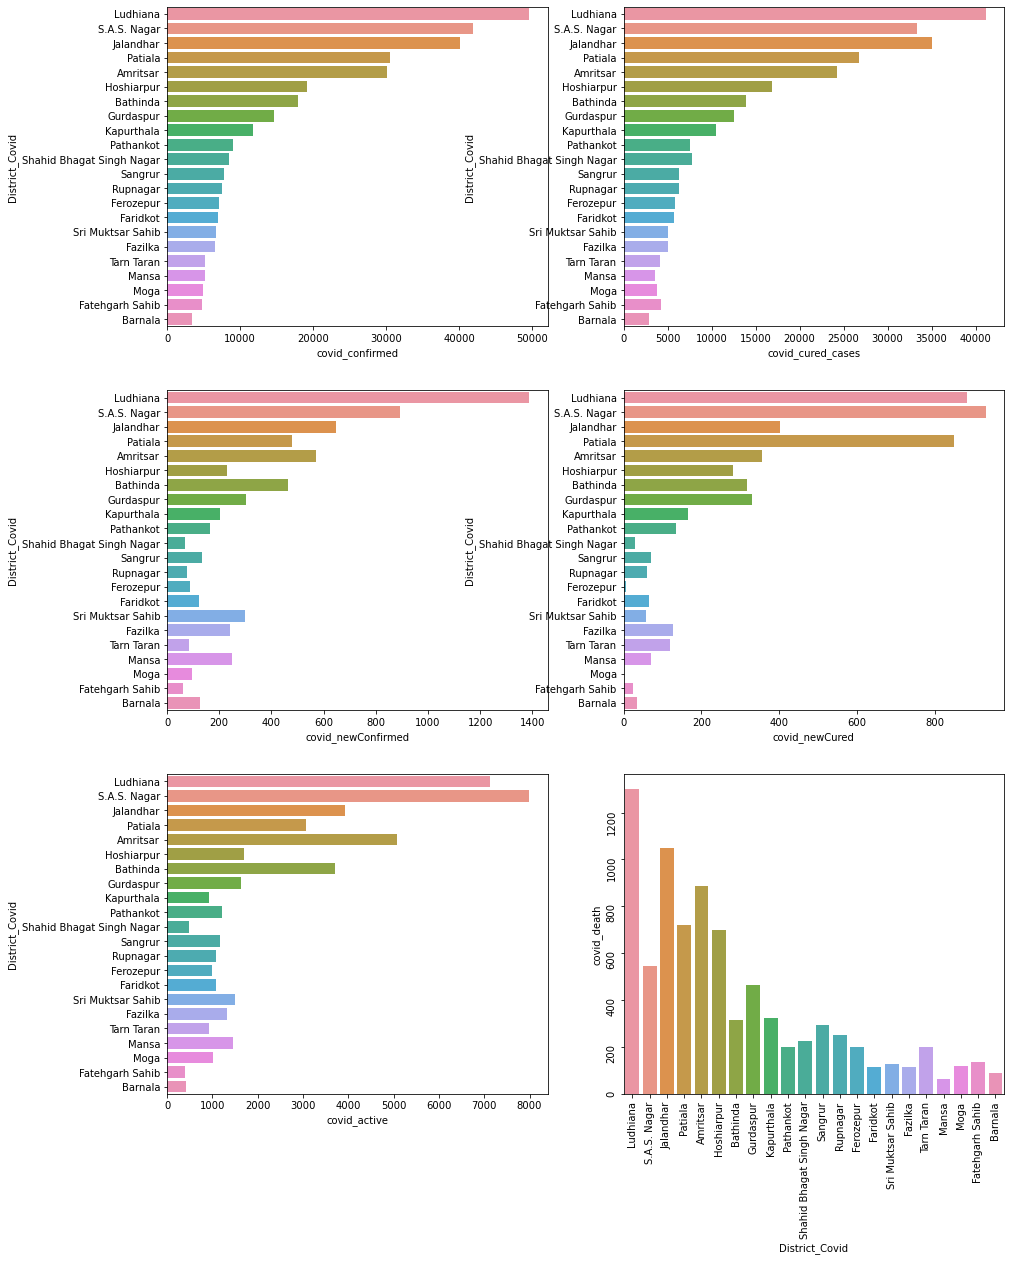

In [113]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Punjab,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Punjab,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Punjab,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Punjab,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Punjab,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Punjab,ax=ax6)
plt.xticks(rotation=90)

plt.show()

# Rajasthan Covid19 Data

In [114]:
Rajasthan=df.iloc[534:571]
Rajasthan

Covid_States  District_Covid  covid_confirmed  covid_newConfirmed  \
534    Rajasthan          Jaipur            94484                3145   
535    Rajasthan         Jodhpur            69172                1411   
536    Rajasthan            Kota            37944                 701   
537    Rajasthan           Alwar            31678                1324   
538    Rajasthan         Udaipur            29753                1103   
539    Rajasthan         Bikaner            25148                 514   
540    Rajasthan           Ajmer            24719                 706   
541    Rajasthan        Bhilwara            18843                 555   
542    Rajasthan            Pali            15296                 667   
543    Rajasthan           Sikar            13508                 595   
544    Rajasthan          Nagaur            12368                  95   
545    Rajasthan       Dungarpur            11150                 234   
546    Rajasthan       Bharatpur            10739                  99   
547    Rajasthan      Ganganagar             8742                  98   
548    Rajasthan       Rajsamand             8661                 111   
549    Rajasthan     Chittorgarh             8225                 301   
550    Rajasthan          Sirohi             8195                 195   
551    Rajasthan          Jalore             7138                 115   
552    Rajasthan          Barmer             7133                 226   
553    Rajasthan         Dholpur             6979                 371   
554    Rajasthan           Churu             6599                 244   
555    Rajasthan        Jhalawar             5988                 121   
556    Rajasthan     Hanumangarh             5804                 517   
557    Rajasthan       Jhunjhunu             5743                  88   
558    Rajasthan           Baran             5554                 189   
559    Rajasthan  Sawai Madhopur             5293                 609   
560    Rajasthan            Tonk             5286                  95   
561    Rajasthan        Banswara             5107                 438   
562    Rajasthan           Dausa             4796                 214   
563    Rajasthan           Bundi             4481                 115   
564    Rajasthan       Jaisalmer             3378                 286   
565    Rajasthan      Pratapgarh             3145                 192   
566    Rajasthan         Karauli             3051                 135   
567    Rajasthan     Other State              189                   0   
568    Rajasthan        BSF Camp               85                   0   
569    Rajasthan        Evacuees               61                   0   
570    Rajasthan        Italians                2                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
534              66375             648         27482          627   
535              52199             820         16513          460   
536              28958            1102          8733          253   
537              24277             361          7305           96   
538              18207             918         11320          226   
539              19859             156          5087          202   
540              19634             258          4833          252   
541              11630             355          7162           51   
542              12251              62          2908          137   
543               9508             114          3875          125   
544              11180              84          1072          116   
545               9377             365          1726           47   
546               9675              72           935          129   
547               7217               0          1480           45   
548               5513             137          3082           66   
549               5889             157          2274           62   
550               4555             223          3604    

# Data Visualization of Rajasthan

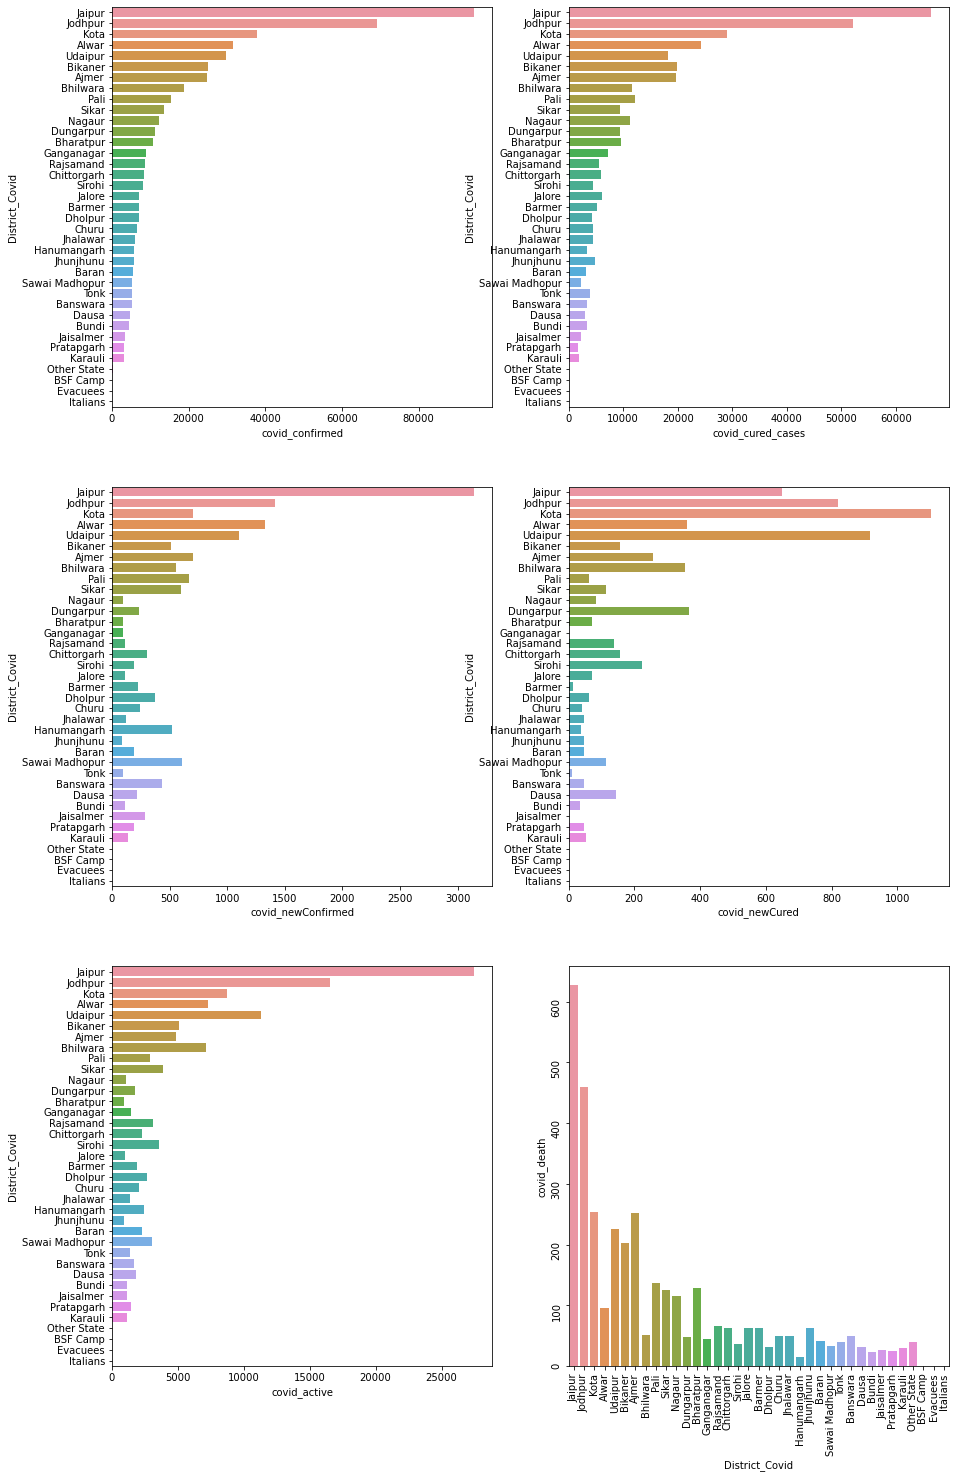

In [115]:
fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Rajasthan,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Rajasthan,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Rajasthan,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Rajasthan,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Rajasthan,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Rajasthan,ax=ax6)
plt.xticks(rotation=90)

plt.show()


# Sikkim Covid19 Data

In [116]:
Sikkim=df.iloc[571:576]
Sikkim

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
571       Sikkim        Unknown             4878                   0   
572       Sikkim    East Sikkim             2389                   0   
573       Sikkim   South Sikkim              626                   0   
574       Sikkim    West Sikkim              149                   0   
575       Sikkim   North Sikkim               41                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
571               4101               0          1066          135   
572               1106               0          1280            3   
573                 73               0           553            0   
574                 15               0           134            0   
575                  1               0            40            0   

     covid_newDeaths  
571                0  
572                0  
573                0  
574                0  
575                0

# Data Visualization of Sikkim

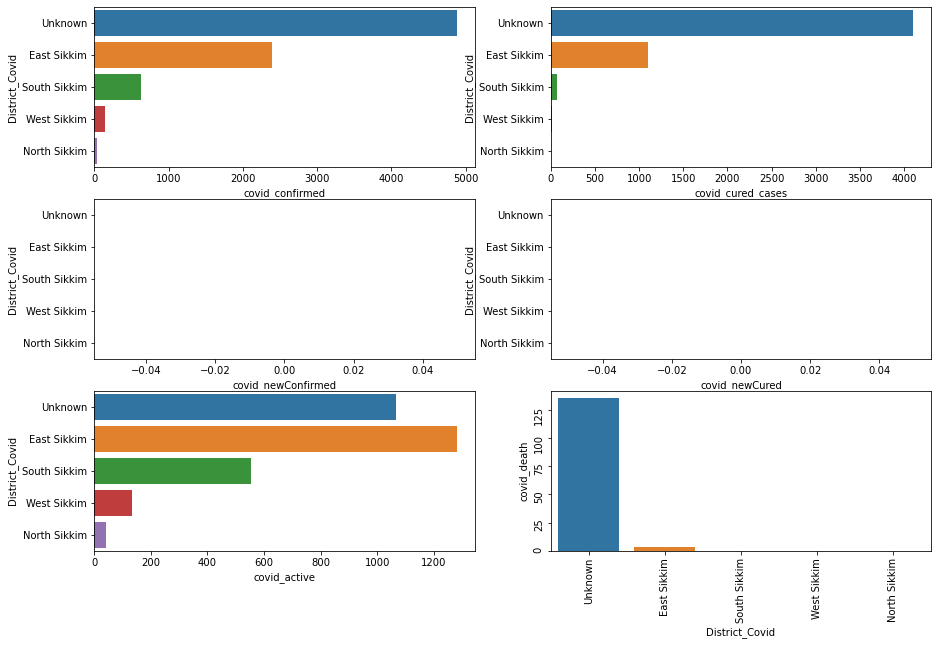

In [117]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Sikkim,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Sikkim,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Sikkim,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Sikkim,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Sikkim,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Sikkim,ax=ax6)
plt.xticks(rotation=90)

plt.show()


# Tamil Nadu Covid19 Data

In [118]:
TamilNadu=df.iloc[576:616]
TamilNadu

Covid_States      District_Covid  covid_confirmed  covid_newConfirmed  \
576   Tamil Nadu             Chennai           309899                4329   
577   Tamil Nadu        Chengalpattu            73861                1155   
578   Tamil Nadu          Coimbatore            73219                1045   
579   Tamil Nadu         Thiruvallur            55646                 856   
580   Tamil Nadu               Salem            38985                 511   
581   Tamil Nadu        Kancheepuram            36058                 558   
582   Tamil Nadu           Cuddalore            28932                 211   
583   Tamil Nadu             Madurai            27936                 604   
584   Tamil Nadu             Vellore            25100                 345   
585   Tamil Nadu            Tiruppur            24174                 376   
586   Tamil Nadu           Thanjavur            24068                 303   
587   Tamil Nadu      Tiruvannamalai            22518                 369   
588   Tamil Nadu         Tirunelveli            21299                 549   
589   Tamil Nadu     Tiruchirappalli            21168                 345   
590   Tamil Nadu        Thoothukkudi            20879                 435   
591   Tamil Nadu         Kanyakumari            20406                 301   
592   Tamil Nadu             Ranipet            19180                 287   
593   Tamil Nadu               Theni            18997                 180   
594   Tamil Nadu               Erode            18900                 313   
595   Tamil Nadu        Virudhunagar            18758                 193   
596   Tamil Nadu          Viluppuram            17480                 203   
597   Tamil Nadu            Dindigul            14653                 223   
598   Tamil Nadu            Namakkal            14588                 209   
599   Tamil Nadu          Thiruvarur            14455                 150   
600   Tamil Nadu         Pudukkottai            13167                 116   
601   Tamil Nadu         Krishnagiri            12261                 271   
602   Tamil Nadu        Nagapattinam            12171                 184   
603   Tamil Nadu        Kallakurichi            11970                 129   
604   Tamil Nadu             Tenkasi            10912                 261   
605   Tamil Nadu            Nilgiris             9604                  79   
606   Tamil Nadu          Tirupathur             9244                  99   
607   Tamil Nadu          Dharmapuri             8568                 106   
608   Tamil Nadu           Sivaganga             8089                  70   
609   Tamil Nadu      Ramanathapuram             7595                 119   
610   Tamil Nadu               Karur             6910                 113   
611   Tamil Nadu            Ariyalur             5357                  46   
612   Tamil Nadu          Perambalur             2484                  16   
613   Tamil Nadu  Airport Quarantine             2069                   0   
614   Tamil Nadu  Railway Quarantine              428                   0   
615   Tamil Nadu         Other State                0                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
576             273797            4271         31538         4564   
577              64124            1028          8826          911   
578              65748             724          6757          714   
579              49907             433          4978          761   
580              35094             288          3401          490   
581              32655             292          2904          499   
582              27104             190          1513          315   
583              23720             304          3720          496   
584              22536             109          2190          374   
585              21536             265          2404          234   
586              21832             119          1944          292   
587              2

# Data Visualization of TamilNadu

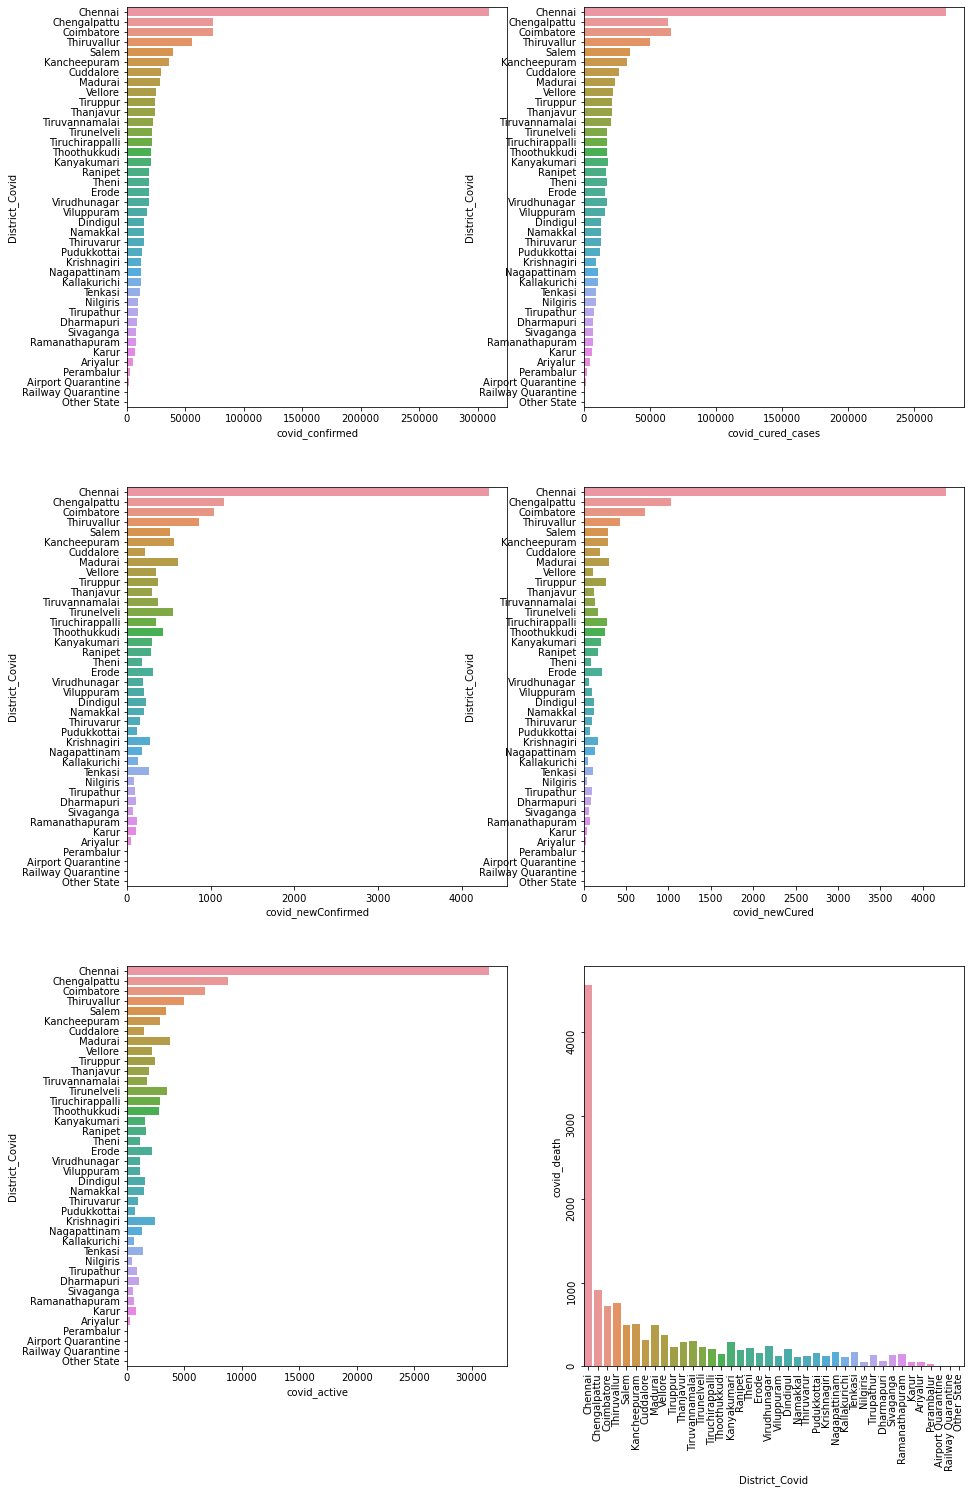

In [119]:
fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=TamilNadu,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=TamilNadu,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=TamilNadu,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=TamilNadu,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=TamilNadu,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=TamilNadu,ax=ax6)
plt.xticks(rotation=90)

plt.show()


# Telanagana Covid19 Data

In [120]:
Telangana=df.iloc[616:652]
Telangana

Covid_States            District_Covid  covid_confirmed  \
616    Telangana                 Hyderabad            97067   
617    Telangana               Ranga Reddy            32112   
618    Telangana        Medchal Malkajgiri            28754   
619    Telangana                Karimnagar            17111   
620    Telangana                  Nalgonda            15248   
621    Telangana            Warangal Urban            15104   
622    Telangana                 Nizamabad            15088   
623    Telangana                   Khammam            13640   
624    Telangana                Sangareddy            11904   
625    Telangana      Bhadradri Kothagudem            10672   
626    Telangana                  Siddipet            10557   
627    Telangana                   Jagtial             9957   
628    Telangana                  Suryapet             8808   
629    Telangana                 Kamareddy             8715   
630    Telangana              Mahabubnagar             8307   
631    Telangana                Mancherial             8249   
632    Telangana                Peddapalli             7282   
633    Telangana          Rajanna Sircilla             7106   
634    Telangana               Mahabubabad             6469   
635    Telangana              Nagarkurnool             5992   
636    Telangana       Yadadri Bhuvanagiri             5770   
637    Telangana                    Nirmal             5527   
638    Telangana                     Medak             5393   
639    Telangana            Warangal Rural             5050   
640    Telangana                  Adilabad             4994   
641    Telangana                Wanaparthy             4926   
642    Telangana                   Jangaon             4793   
643    Telangana                 Vikarabad             4583   
644    Telangana          Jogulamba Gadwal             3972   
645    Telangana                    Mulugu             3487   
646    Telangana  Jayashankar Bhupalapally             3121   
647    Telangana             Komaram Bheem             2487   
648    Telangana                Narayanpet             1656   
649    Telangana                   Unknown             1048   
650    Telangana               Other State              250   
651    Telangana          Foreign Evacuees               33   

     covid_newConfirmed  covid_cured_cases  covid_newCured  covid_active  \
616                1259                305               0         96739   
617                 591                 17               0         32093   
618                 676                  9               0         28744   
619                 286                 16               0         17095   
620                 346                 12               0         15236   
621                 334                 23               0         15081   
622                 497                 30               0         15058   
623                 339                  3               0         13637   
624                 201                  6               0         11898   
625                 187                  4               0         10668   
626                 306                  1               0         10556   
627                 264                  2               0          9955   
628                 168                 24               0          8784   
629                 180                  8               0          8707   
630                 306                  8               0          8299   
631                 233                  0               0          8248   
632                 121                  1               0          7281   
633                 164                  2               0          7104   
634                 148                  1               0          6468   
635                  47                  2               0          5990   
636                 167                  0               0          5770   


In [121]:
Telangana.to_csv("E:\\innomatics\\Telangana.csv") 

# Data Visualization of Telangana


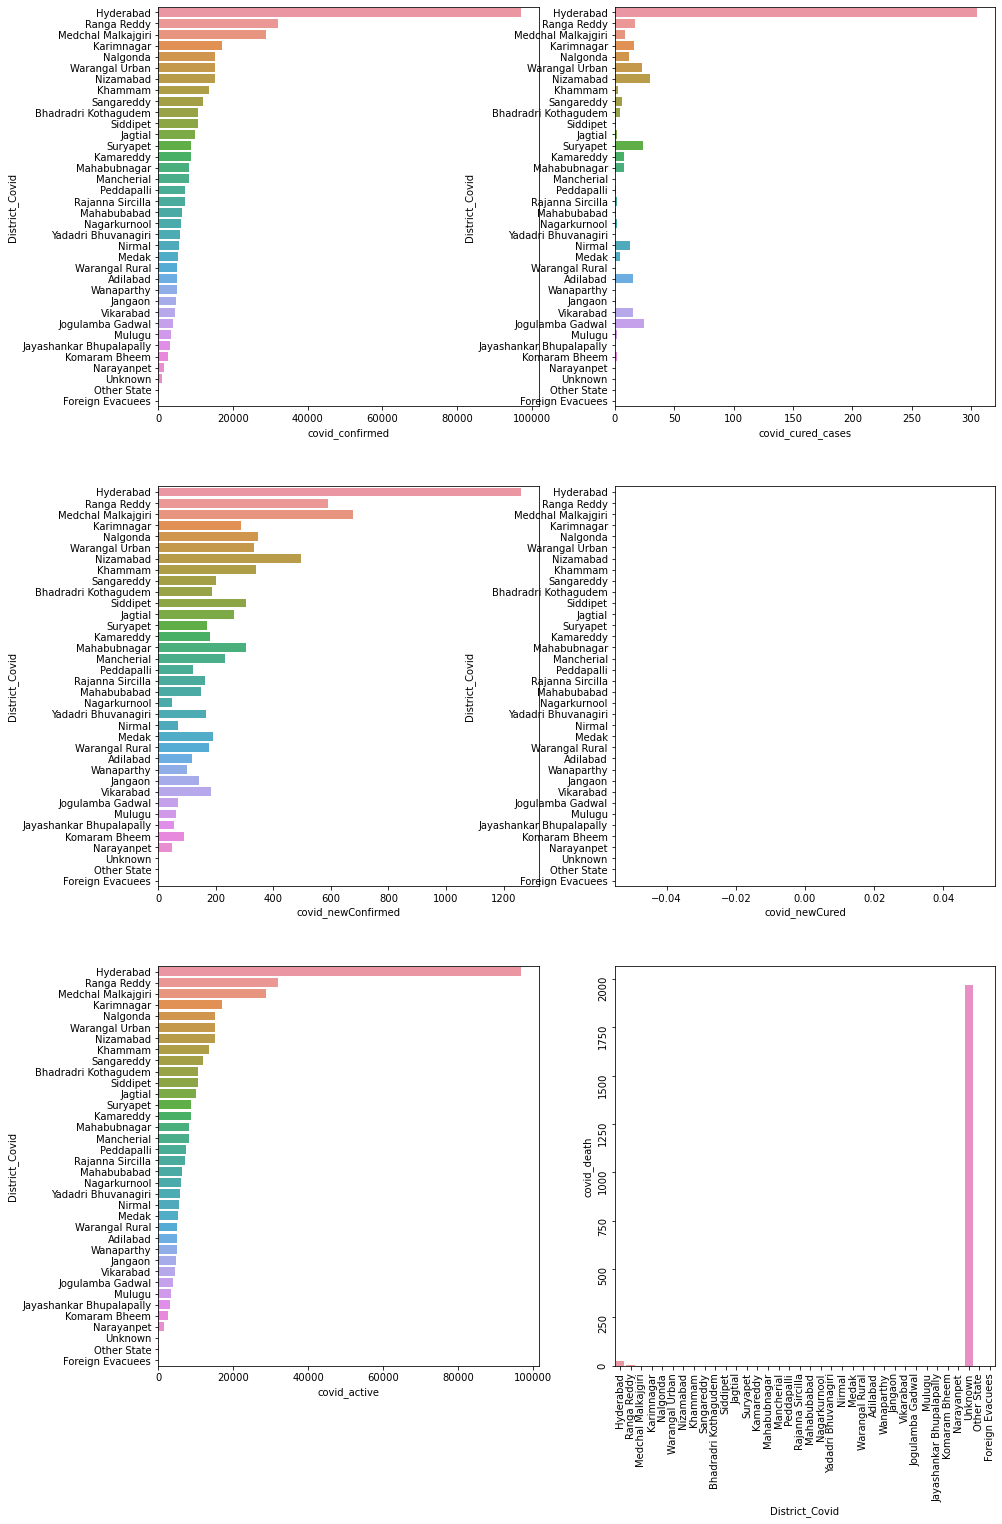

In [122]:
fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Telangana,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Telangana,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Telangana,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Telangana,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Telangana,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Telangana,ax=ax6)
plt.xticks(rotation=90)

plt.show()


# Tripura Covid19 Data


In [123]:
Tripura=df.iloc[652:660]
Tripura

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
652      Tripura   West Tripura            12534                  77   
653      Tripura  South Tripura             4116                   4   
654      Tripura         Gomati             3966                   2   
655      Tripura         Dhalai             3517                   2   
656      Tripura     Sipahijala             2915                   3   
657      Tripura  North Tripura             2812                   4   
658      Tripura        Unokoti             2796                   1   
659      Tripura         Khowai             1870                   7   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
652              11776              13           551          196   
653               4046               2            44           23   
654               3892               0            29           44   
655               3466               2            32           18   
656               2855               0            20           40   
657               2747               1            42           16   
658               2750               0            23           23   
659               1819               0            20           31   

     covid_newDeaths  
652                0  
653                0  
654                0  
655                0  
656                0  
657                0  
658                0  
659                0

# Data  Visualization of Tripura

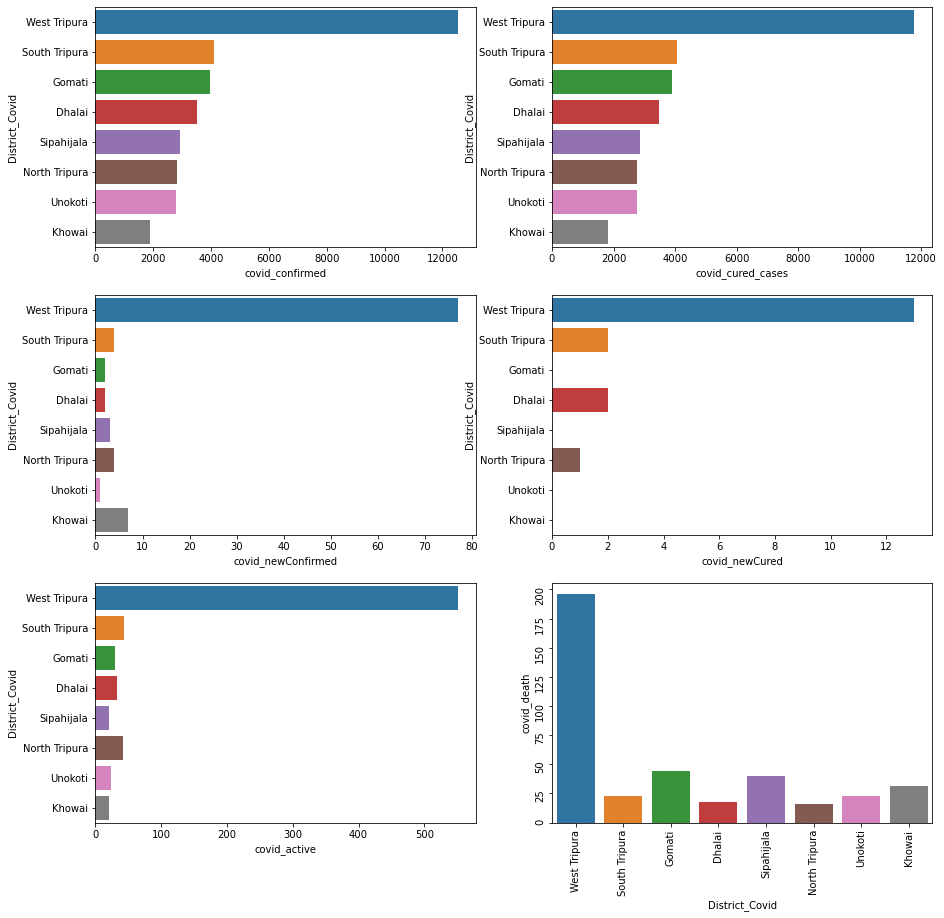

In [124]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Tripura,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Tripura,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Tripura,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Tripura,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Tripura,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Tripura,ax=ax6)
plt.xticks(rotation=90)

plt.show()


# UttarPradesh Covid19 Data

In [125]:
UttarPradesh=df.iloc[660:735]
UttarPradesh

Covid_States District_Covid  covid_confirmed  covid_newConfirmed  \
660  Uttar Pradesh        Lucknow           183859                5186   
661  Uttar Pradesh      Prayagraj            63020                1394   
662  Uttar Pradesh   Kanpur Nagar            59697                2149   
663  Uttar Pradesh       Varanasi            58837                2057   
664  Uttar Pradesh         Meerut            37892                1538   
..             ...            ...              ...                 ...   
730  Uttar Pradesh       Hamirpur             2859                 150   
731  Uttar Pradesh         Mahoba             2517                 112   
732  Uttar Pradesh        Kasganj             2486                  48   
733  Uttar Pradesh      Shrawasti             2425                  90   
734  Uttar Pradesh        Hathras             1683                  53   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
660             130137            6247         52068         1654   
661              46097            1771         16333          590   
662              41719            1532         16916         1062   
663              40927            1870         17321          589   
664              25963             788         11455          474   
..                 ...             ...           ...          ...   
730               1916              61           914           29   
731               1714              26           787           16   
732               2069              16           410            7   
733               1671              90           732           22   
734               1367               9           308            8   

     covid_newDeaths  
660               14  
661               10  
662               19  
663               15  
664                5  
..               ...  
730                4  
731                0  
732                1  
733                0  
734                0  

[75 rows x 9 columns]

# Data Visualization of  UttarPradesh

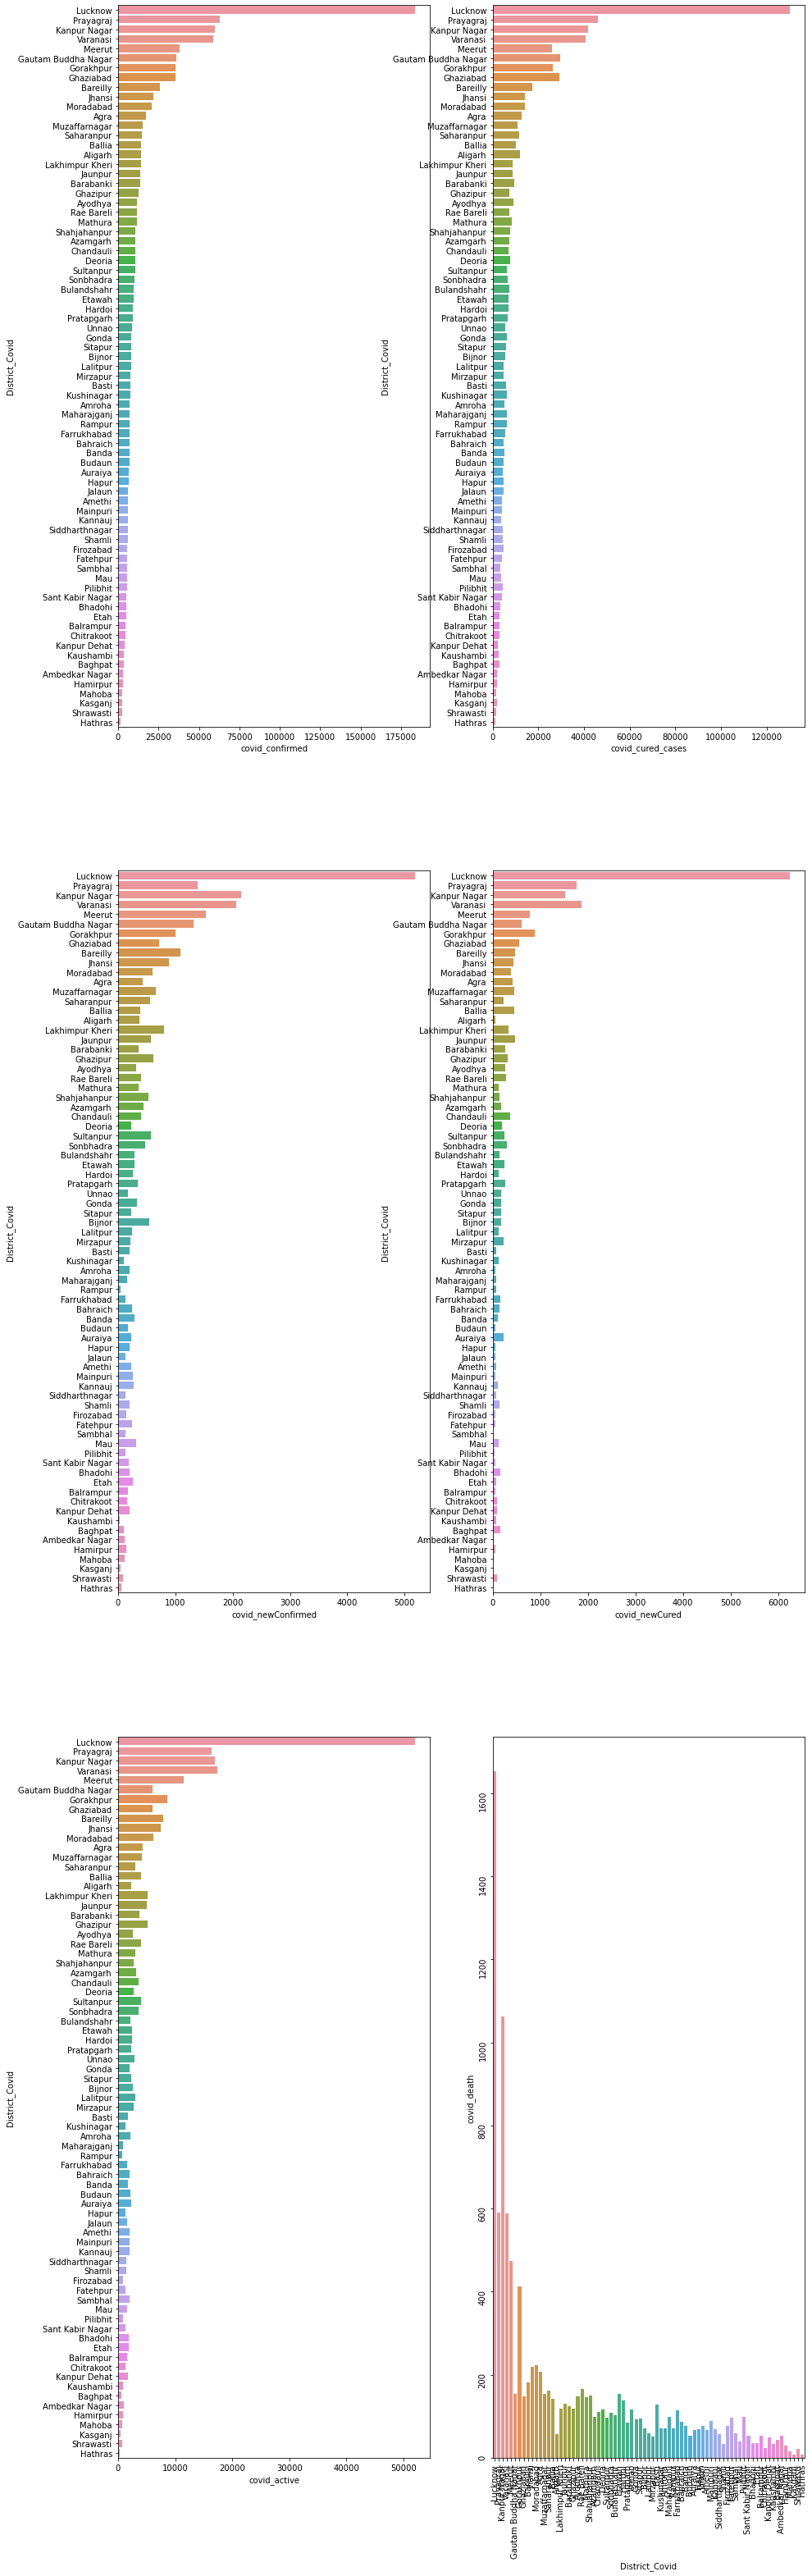

In [126]:
fig = plt.figure(figsize=(15,55))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=UttarPradesh,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=UttarPradesh,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=UttarPradesh,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=UttarPradesh,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=UttarPradesh,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=UttarPradesh,ax=ax6)
plt.xticks(rotation=90)

plt.show()


# Uttarkand Covid19 Data

In [127]:
Uttarkand=df.iloc[735:748]
Uttarkand

Covid_States     District_Covid  covid_confirmed  covid_newConfirmed  \
735    Uttarkand           Dehradun            51353                1670   
736    Uttarkand           Haridwar            27229                1144   
737    Uttarkand           Nainital            18588                 438   
738    Uttarkand  Udham Singh Nagar            16343                 200   
739    Uttarkand      Pauri Garhwal             7707                 390   
740    Uttarkand      Tehri Garhwal             6123                 110   
741    Uttarkand         Uttarkashi             4529                  49   
742    Uttarkand             Almora             4344                  42   
743    Uttarkand            Chamoli             4185                  43   
744    Uttarkand        Pithoragarh             3871                  72   
745    Uttarkand        Rudraprayag             2877                  64   
746    Uttarkand          Champawat             2793                 100   
747    Uttarkand          Bageshwar             1859                  46   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
735              37607            1106         12084         1209   
736              16250             307         10218          216   
737              14114             135          4025          323   
738              13272             127          2502          147   
739               5413               0          1971           71   
740               4326               0          1226           20   
741               3761              11           574           18   
742               3300               3           634           30   
743               3466               7           570           21   
744               3437               0           373           49   
745               2377              47           479           14   
746               1807               5           925           11   
747               1534               0           283           17   

     covid_newDeaths  
735               15  
736                2  
737               14  
738                8  
739                0  
740                0  
741                0  
742                1  
743                0  
744                1  
745                3  
746                0  
747                0

# Data Visualization of Uttarkand

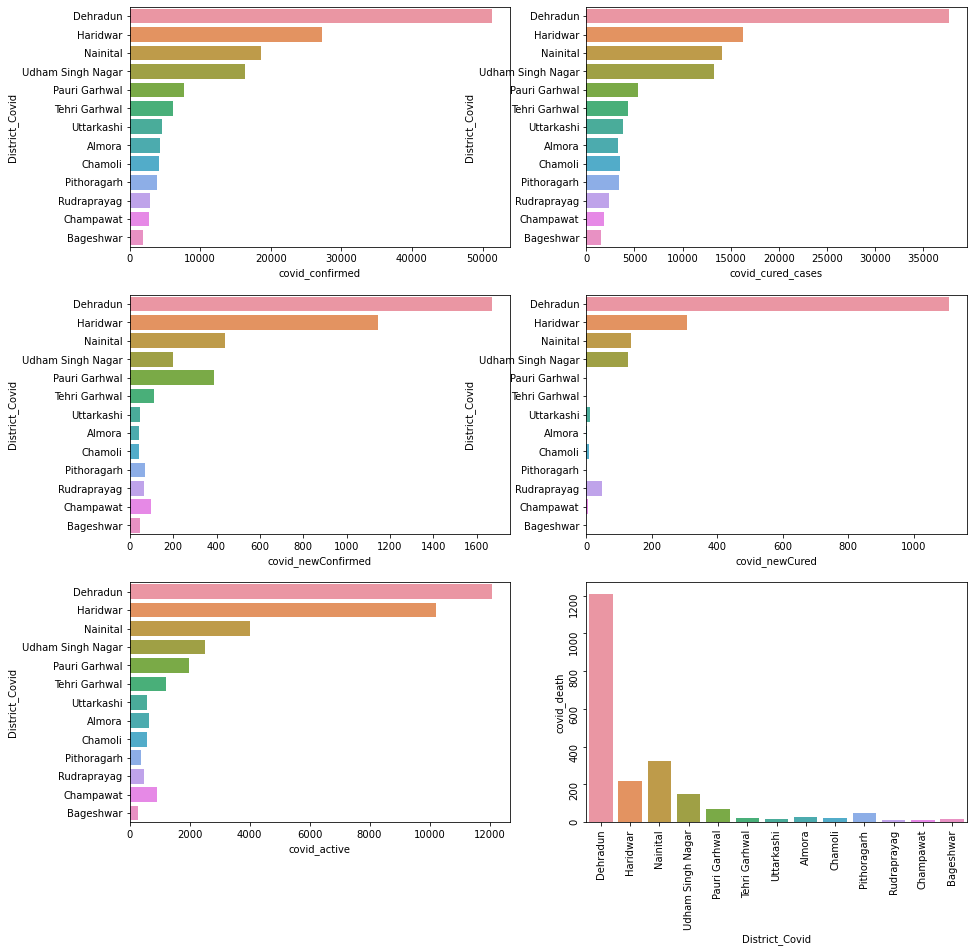

In [128]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Uttarkand,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Uttarkand,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Uttarkand,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Uttarkand,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Uttarkand,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Uttarkand,ax=ax6)
plt.xticks(rotation=90)

plt.show()


# WestBengal Covid19 Data

In [129]:
WestBengal=df.iloc[748:]
WestBengal

Covid_States     District_Covid  covid_confirmed  covid_newConfirmed  \
748  West Bengal            Kolkata           172230                3774   
749  West Bengal  North 24 Parganas           159205                3143   
750  West Bengal  South 24 Parganas            47519                 988   
751  West Bengal             Howrah            46464                 889   
752  West Bengal            Hooghly            37510                 751   
753  West Bengal              Nadia            28177                 674   
754  West Bengal  Paschim Bardhaman            24855                 745   
755  West Bengal    Purba Medinipur            24528                 507   
756  West Bengal  Paschim Medinipur            21909                 160   
757  West Bengal         Darjeeling            21874                 348   
758  West Bengal              Malda            19152                 644   
759  West Bengal            Birbhum            18636                 656   
760  West Bengal        Murshidabad            18165                 640   
761  West Bengal    Purba Bardhaman            16790                 419   
762  West Bengal         Jalpaiguri            16675                 151   
763  West Bengal            Bankura            13968                 172   
764  West Bengal        Cooch Behar            12827                 140   
765  West Bengal            Purulia            11639                 592   
766  West Bengal   Dakshin Dinajpur             9084                 151   
767  West Bengal     Uttar Dinajpur             8836                 203   
768  West Bengal         Alipurduar             8039                  27   
769  West Bengal           Jhargram             3345                  76   
770  West Bengal          Kalimpong             2457                  39   
771  West Bengal        Other State               66                   0   

     covid_cured_cases  covid_newCured  covid_active  covid_death  \
748             147392            2104         21525         3313   
749             139177            1879         17346         2682   
750              41104             378          5662          753   
751              40253             455          5113         1098   
752              33094             388          3893          523   
753              24695             324          3146          336   
754              19617             254          5051          187   
755              21959             204          2278          291   
756              20704              63           885          320   
757              19726             185          1934          214   
758              15183             406          3828          141   
759              14055             461          4473          108   
760              14543             360          3451          171   
761              14236             241          2446          108   
762              15448             115          1049          178   
763              12808              97          1066           94   
764              12154              57           601           72   
765               8777             241          2805           57   
766               8499              53           509           76   
767               7521             107          1236           79   
768               7778              16           174           87   
769               3122              11           201           22   
770               2301               8           128           28   
771                 63               0             0            3   

     covid_newDeaths  
748               18  
749               15  
750                3  
751                5  
752                2  
753                2  
754                0  
755                0  
756                2  
757                2  
758                2  
759                2  
760                0  
761                1  
762                3  
763      

# Data Visualization of West Bengal

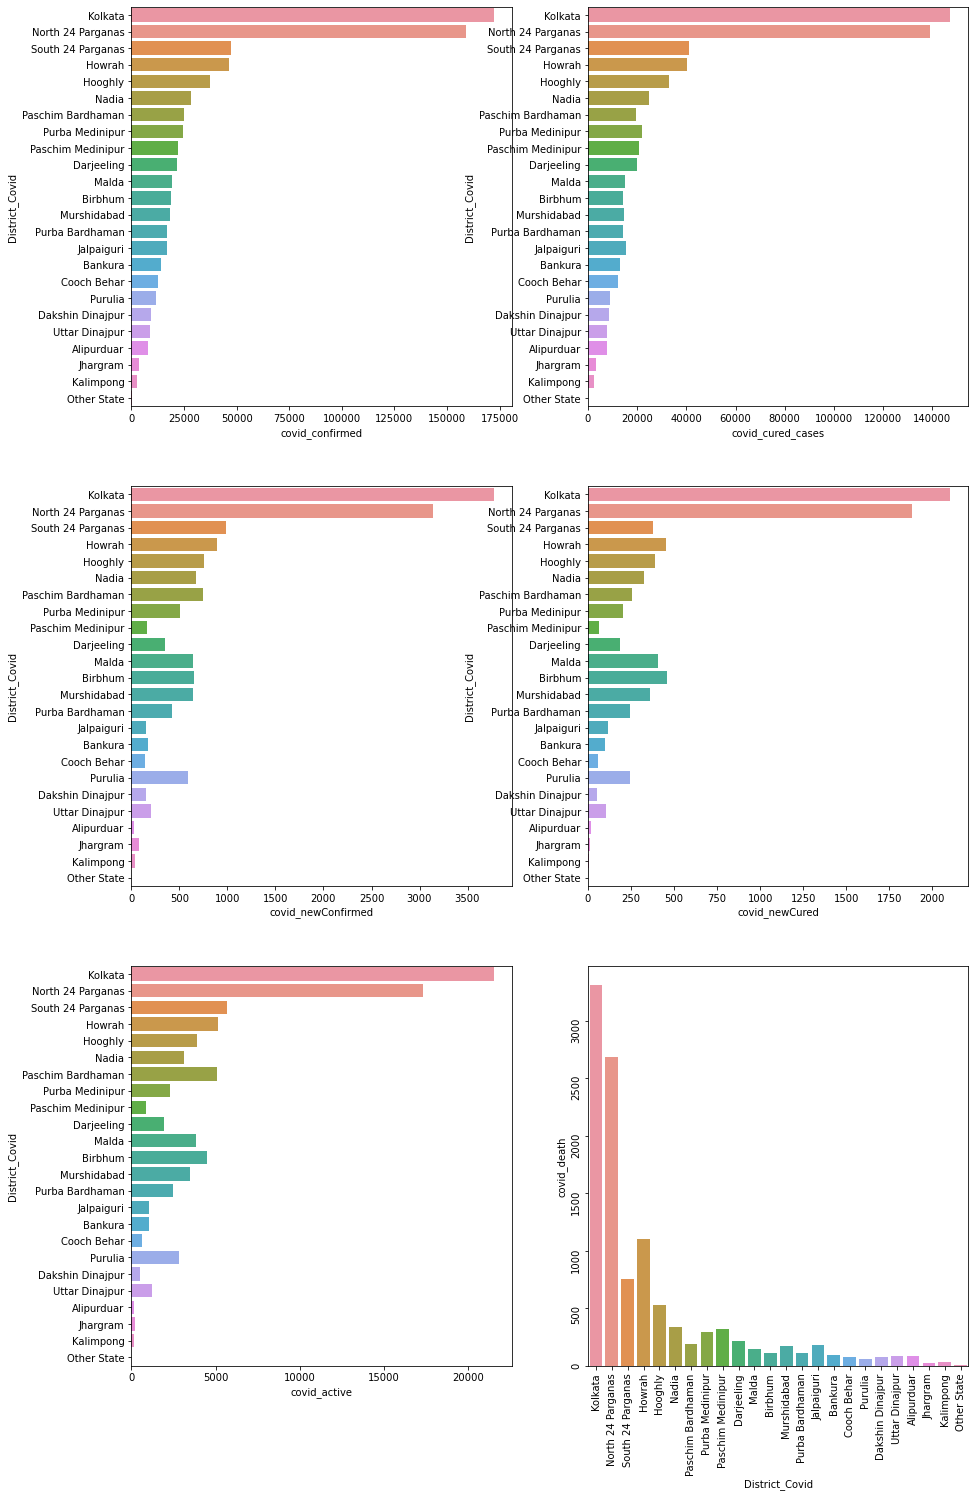

In [130]:
fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=WestBengal,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=WestBengal,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=WestBengal,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=WestBengal,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=WestBengal,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=WestBengal,ax=ax6)
plt.xticks(rotation=90)

plt.show()


# low number of cases of district in Different states

In [131]:
Andaman_and_Nicobar_Islands_min=pd.DataFrame(Andaman_and_Nicobar_Islands.min()).T
Andhra_Pradesh_min=pd.DataFrame(Andhra_Pradesh.min()).T
Arunachal_Pradesh_min=pd.DataFrame(Arunachal_Pradesh.min()).T
Assam_min=pd.DataFrame(Assam.min()).T
Bihar_min=pd.DataFrame(Bihar.min()).T
#Chandigarh_min=pd.DataFrame(Chandigarh.min()).T
Chhattisgarh_min=pd.DataFrame(Chhattisgarh.min()).T
Dadra_and_Nagar_Haveli_min=pd.DataFrame(Dadra_and_Nagar_Haveli.min()).T
Delhi_min=pd.DataFrame(Delhi.min()).T
Goa_min=pd.DataFrame(Goa.min()).T
Gujarat_min=pd.DataFrame(Gujarat.min()).T
Haryana_min=pd.DataFrame(Haryana.min()).T
Himachal_Pradesh_min=pd.DataFrame(Himachal_Pradesh.min()).T
Jammu_and_Kashmir_min=pd.DataFrame(Jammu_and_Kashmir.min()).T
Jharkand_min=pd.DataFrame(Jharkand.min()).T
Karnataka_min=pd.DataFrame(Karnataka.min()).T
Kerala_min=pd.DataFrame(Kerala.min()).T
Ladakh_min=pd.DataFrame(Ladakh.min()).T
Lakshadweep_min=pd.DataFrame(Lakshadweep.min()).T
MadyaPradesh_min=pd.DataFrame(MadyaPradesh.min()).T
Maharastra_min=pd.DataFrame(Maharastra.min()).T
Manipur_min=pd.DataFrame(Manipur.min()).T
Meghalaya_min=pd.DataFrame(Meghalaya.min()).T
Mizoram_min=pd.DataFrame(Mizoram.min()).T
Nagaland_min=pd.DataFrame(Nagaland.min()).T
Odisha_min=pd.DataFrame(Odisha.min()).T
Puducherry_min=pd.DataFrame(Puducherry.min()).T
Punjab_min=pd.DataFrame(Punjab.min()).T
Rajasthan_min=pd.DataFrame(Rajasthan.min()).T
Sikkim_min=pd.DataFrame(Sikkim.min()).T
TamilNadu_min=pd.DataFrame(TamilNadu.min()).T
Telangana_min=pd.DataFrame(Telangana.min()).T
Tripura_min=pd.DataFrame(Tripura.min()).T
UttarPradesh_min=pd.DataFrame(UttarPradesh.min()).T
Uttarkand_min=pd.DataFrame(Uttarkand.min()).T
WestBengal_min=pd.DataFrame(WestBengal.min()).T

In [132]:
min_covid_cases_state = [Andaman_and_Nicobar_Islands_min,Andhra_Pradesh_min,Arunachal_Pradesh_min,Assam_min,Bihar_min,Chhattisgarh_min,Dadra_and_Nagar_Haveli_min,Delhi_min,Goa_min,Gujarat_min,Haryana_min,Himachal_Pradesh_min,Jammu_and_Kashmir_min,Jharkand_min,Karnataka_min,Kerala_min,Ladakh_min,Lakshadweep_min,MadyaPradesh_min,Maharastra_min,Manipur_min,Meghalaya_min,Mizoram_min,Nagaland_min,Odisha_min,Puducherry_min,Punjab_min,Rajasthan_min,Sikkim_min,TamilNadu_min,Telangana_min,Tripura_min,UttarPradesh_min,Uttarkand_min,WestBengal_min]

# lower cases of Districts in Different States Covid19 Data

In [133]:
Min_covid_cases_state=pd.concat(min_covid_cases_state)
Min_covid_cases_state

Covid_States          District_Covid covid_confirmed  \
0  Andaman and Nicobar Islands                Nicobars               0   
0               Andhra Pradesh               Anantapur             434   
0            Arunachal Pradesh                   Anjaw              23   
0                        Assam      Airport Quarantine              13   
0                        Bihar                  Araria            2063   
0                 Chhattisgarh                   Balod             606   
0       Dadra and Nagar Haveli  Dadra and Nagar Haveli               0   
0                        Delhi           Central Delhi              25   
0                          Goa               North Goa             200   
0                      Gujarat               Ahmedabad             162   
0                      Haryana                  Ambala               0   
0             Himachal Pradesh                Bilaspur            1604   
0            Jammu and Kashmir                Anantnag               0   
0                     Jharkand                  Bokaro            1319   
0                    Karnataka               Bagalkote              36   
0                       Kerala               Alappuzha               0   
0                       Ladakh                  Kargil            2315   
0                  Lakshadweep             Lakshadweep            2126   
0                 MadyaPradesh              Agar Malwa               0   
0                   Maharastra              Ahmednagar               0   
0                      Manipur               Bishnupur              37   
0                    Meghalaya         East Garo Hills              72   
0                      Mizoram                  Aizawl              23   
0                     Nagaland                 Dimapur               0   
0                       Odisha                   Angul               0   
0                   Puducherry                Karaikal            2706   
0                       Punjab                Amritsar            3440   
0                    Rajasthan                   Ajmer               2   
0                       Sikkim             East Sikkim              41   
0                   Tamil Nadu      Airport Quarantine               0   
0                    Telangana                Adilabad              33   
0                      Tripura                  Dhalai            1870   
0                Uttar Pradesh                    Agra            1683   
0                    Uttarkand                  Almora            1859   
0                  West Bengal              Alipurduar              66   

  covid_newConfirmed covid_cured_cases covid_newCured covid_active  \
0                  0                 0              0            0   
0                  0               434              0            0   
0                  0                23              0            0   
0                  0                 1              0            0   
0                 35              1641             11          420   
0                  9               436              0           90   
0                  0                 0              0            0   
0                  0                 0              0           25   
0                  0               190              0            9   
0                  0               159              0            0   
0                  0                 0              0            0   
0                  3              1464             35          123   
0                  0                 0              0            0   
0                  4              1189              0          126   
0                  0                33              0            0   
0                  0                 0              0            0   
0                  0              2166              0          105   
0                164               941             29         1178   
0                  0   

In [134]:
Min_covid_cases_state.to_csv("E:\\innomatics\\min_covid_cases_state.csv")

# Data Visualization of districts in different states

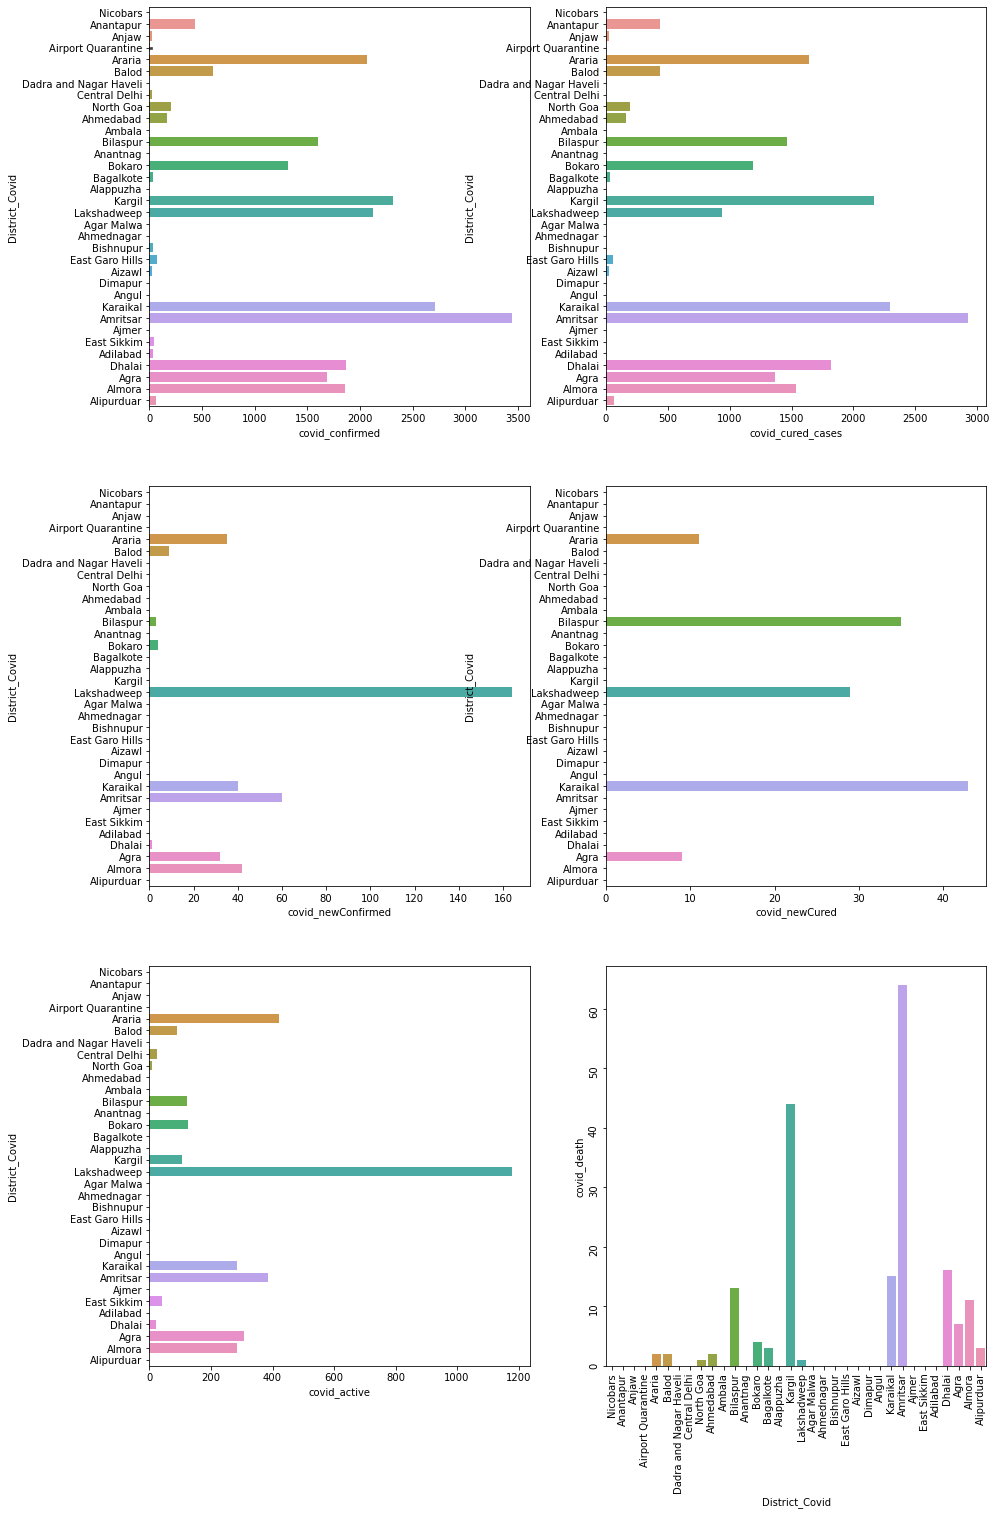

In [135]:
fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Min_covid_cases_state,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Min_covid_cases_state,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Min_covid_cases_state,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Min_covid_cases_state,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Min_covid_cases_state,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Min_covid_cases_state,ax=ax6)
plt.xticks(rotation=90)

plt.show()


# High number of cases of district in Different states

In [136]:
Andaman_and_Nicobar_Islands_max=pd.DataFrame(Andaman_and_Nicobar_Islands.max()).T
Andhra_Pradesh_max=pd.DataFrame(Andhra_Pradesh.max()).T
Arunachal_Pradesh_max=pd.DataFrame(Arunachal_Pradesh.max()).T
Assam_max=pd.DataFrame(Assam.max()).T
Bihar_max=pd.DataFrame(Bihar.max()).T
#Chandigarh_max=pd.DataFrame(Chandigarh.max()).T
Chhattisgarh_max=pd.DataFrame(Chhattisgarh.max()).T
Dadra_and_Nagar_Haveli_max=pd.DataFrame(Dadra_and_Nagar_Haveli.max()).T
Delhi_max=pd.DataFrame(Delhi.max()).T
Goa_max=pd.DataFrame(Goa.max()).T
Gujarat_max=pd.DataFrame(Gujarat.max()).T
Haryana_max=pd.DataFrame(Haryana.max()).T
Himachal_Pradesh_max=pd.DataFrame(Himachal_Pradesh.max()).T
Jammu_and_Kashmir_max=pd.DataFrame(Jammu_and_Kashmir.max()).T
Jharkand_max=pd.DataFrame(Jharkand.max()).T
Karnataka_max=pd.DataFrame(Karnataka.max()).T
Kerala_max=pd.DataFrame(Kerala.max()).T
Ladakh_max=pd.DataFrame(Ladakh.max()).T
Lakshadweep_max=pd.DataFrame(Lakshadweep.max()).T
MadyaPradesh_max=pd.DataFrame(MadyaPradesh.max()).T
Maharastra_max=pd.DataFrame(Maharastra.max()).T
Manipur_max=pd.DataFrame(Manipur.max()).T
Meghalaya_max=pd.DataFrame(Meghalaya.max()).T
Mizoram_max=pd.DataFrame(Mizoram.max()).T
Nagaland_max=pd.DataFrame(Nagaland.max()).T
Odisha_max=pd.DataFrame(Odisha.max()).T
Puducherry_max=pd.DataFrame(Puducherry.max()).T
Punjab_max=pd.DataFrame(Punjab.max()).T
Rajasthan_max=pd.DataFrame(Rajasthan.max()).T
Sikkim_max=pd.DataFrame(Sikkim.max()).T
TamilNadu_max=pd.DataFrame(TamilNadu.max()).T
Telangana_max=pd.DataFrame(Telangana.max()).T
Tripura_max=pd.DataFrame(Tripura.max()).T
UttarPradesh_max=pd.DataFrame(UttarPradesh.max()).T
Uttarkand_max=pd.DataFrame(Uttarkand.max()).T
WestBengal_max=pd.DataFrame(WestBengal.max()).T

# Higher cases of Districts in Different States Covid19 Data

In [137]:
max_covid_cases_state = [Andaman_and_Nicobar_Islands_max,Andhra_Pradesh_max,Arunachal_Pradesh_max,Assam_max,Bihar_max,Chhattisgarh_max,Dadra_and_Nagar_Haveli_max,Delhi_max,Goa_max,Gujarat_max,Haryana_max,Himachal_Pradesh_max,Jammu_and_Kashmir_max,Jharkand_max,Karnataka_max,Kerala_min,Ladakh_max,Lakshadweep_max,MadyaPradesh_max,Maharastra_max,Manipur_max,Meghalaya_max,Mizoram_max,Nagaland_max,Odisha_max,Puducherry_max,Punjab_max,Rajasthan_max,Sikkim_max,TamilNadu_max,Telangana_max,Tripura_max,UttarPradesh_max,Uttarkand_max,WestBengal_max]

In [138]:
Max_covid_cases_state=pd.concat(max_covid_cases_state)
Max_covid_cases_state

Covid_States       District_Covid covid_confirmed  \
0  Andaman and Nicobar Islands              Unknown            5613   
0               Andhra Pradesh        Y.S.R. Kadapa          135268   
0            Arunachal Pradesh           West Siang            7074   
0                        Assam   West Karbi Anglong          109341   
0                        Bihar       West Champaran           90207   
0                 Chhattisgarh  Uttar Bastar Kanker          133970   
0       Dadra and Nagar Haveli          Other State            3902   
0                        Delhi           West Delhi         1026927   
0                          Goa              Unknown           71098   
0                      Gujarat               Valsad          138305   
0                      Haryana          Yamunanagar          103298   
0             Himachal Pradesh                  Una           14848   
0            Jammu and Kashmir             Udhampur           38762   
0                     Jharkand       West Singhbhum           61146   
0                    Karnataka               Yadgir          653656   
0                       Kerala            Alappuzha               0   
0                       Ladakh                  Leh           10922   
0                  Lakshadweep          Lakshadweep            2126   
0                 MadyaPradesh              Vidisha          101751   
0                   Maharastra             Yavatmal          796645   
0                      Manipur              Unknown            9317   
0                    Meghalaya     West Khasi Hills           10184   
0                      Mizoram             Serchhip            3653   
0                     Nagaland            Zunheboto            6966   
0                       Odisha           Sundargarh           64186   
0                   Puducherry                Yanam           41504   
0                       Punjab           Tarn Taran           49603   
0                    Rajasthan              Udaipur           94484   
0                       Sikkim          West Sikkim            4878   
0                   Tamil Nadu         Virudhunagar          309899   
0                    Telangana  Yadadri Bhuvanagiri           97067   
0                      Tripura         West Tripura           12534   
0                Uttar Pradesh             Varanasi          183859   
0                    Uttarkand           Uttarkashi           51353   
0                  West Bengal       Uttar Dinajpur          172230   

  covid_newConfirmed covid_cured_cases covid_newCured covid_active  \
0                  0              5434              0          113   
0               1680            125213            884        12960   
0                 20              6847             14          198   
0                  0            109341              0        40655   
0               1866             73149           2305        16441   
0               1639            116693           2538        15209   
0                156              2321             74         1573   
0                  0            918875              0        93805   
0                  0             60210              0        10063   
0               5864             86959           1644        48555   
0               3410             77784           1359        25085   
0                423             11685            325         3162   
0                748             32404            379         5850   
0               1494             45100            723        15457   
0              20733            467313           2285       180542   
0                  0                 0              0            0   
0                  0              8963              0         1867   
0                164               941             29         1178   
0               1826             88168           1956        12484   
0              10174            680067          10833       1

In [139]:
Max_covid_cases_state.to_csv("E:\\innomatics\\max_covid_cases_state.csv")

# Data Visualization of districts in different states

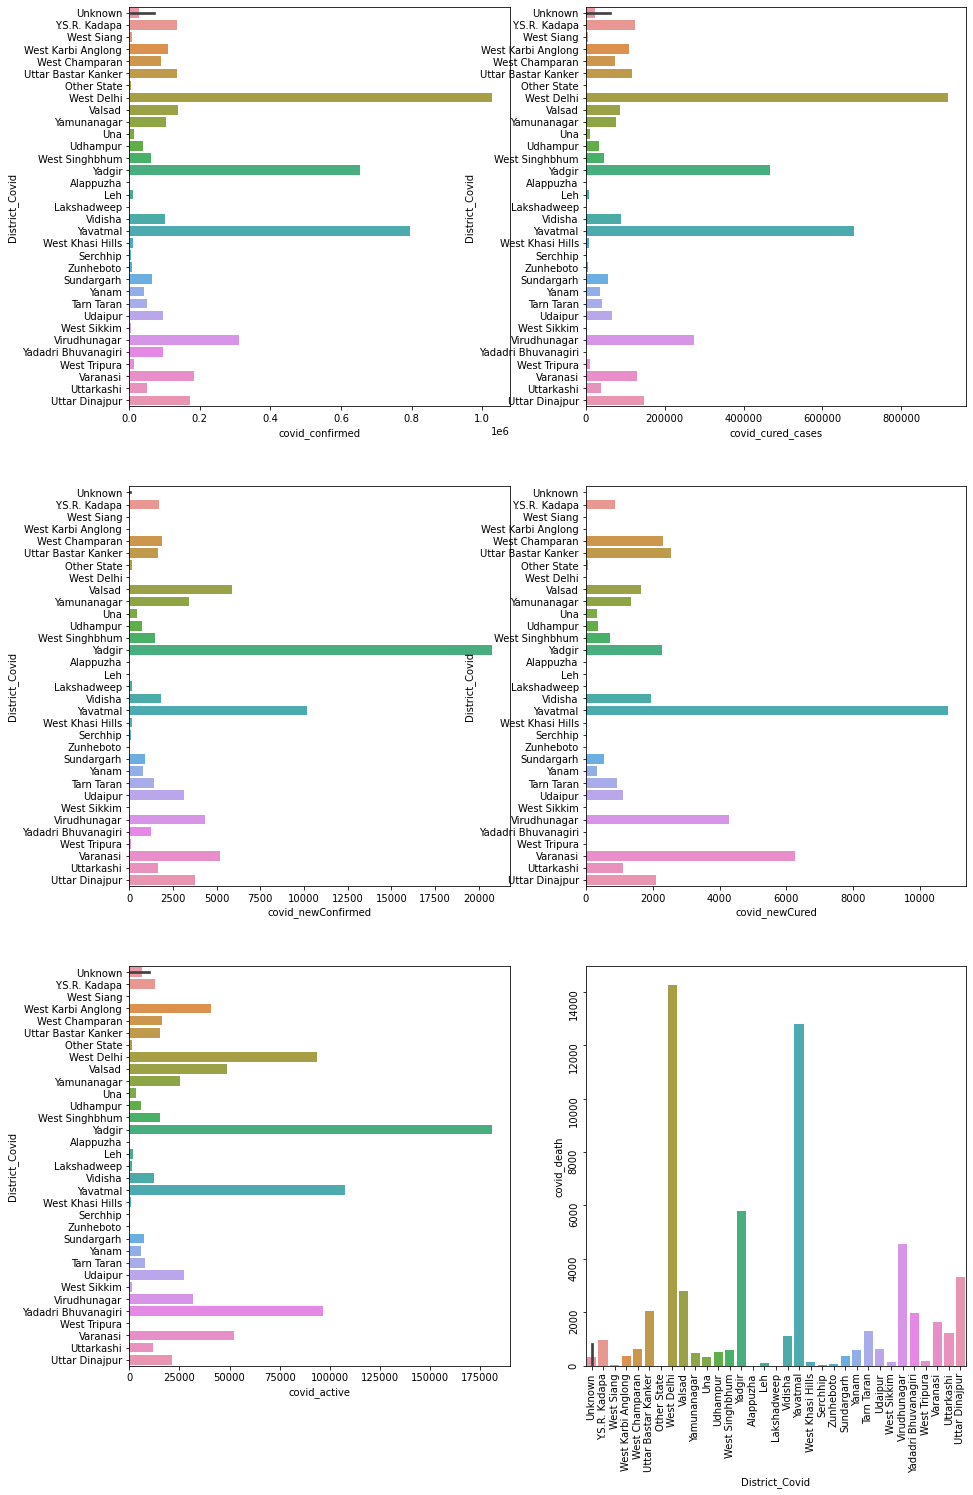

In [140]:
fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.barplot(x='covid_confirmed',y='District_Covid',data=Max_covid_cases_state,ax=ax1)
plt.yticks(rotation=90)

sns.barplot(x='covid_cured_cases',y='District_Covid',data=Max_covid_cases_state,ax=ax2)
plt.yticks(rotation=90)

sns.barplot(x='covid_newConfirmed',y='District_Covid',data=Max_covid_cases_state,ax=ax3)
plt.yticks(rotation=90)

sns.barplot(x='covid_newCured',y='District_Covid',data=Max_covid_cases_state,ax=ax4)
plt.yticks(rotation=90)

sns.barplot(x='covid_active',y='District_Covid',data=Max_covid_cases_state,ax=ax5)
plt.yticks(rotation=90)

sns.barplot(x='District_Covid',y='covid_death',data=Max_covid_cases_state,ax=ax6)
plt.xticks(rotation=90)

plt.show()
